# Associations between molecular and environmental changes along the proximal-to-distal axis of the colon
### Abstract
Colorectal cancer is a heterogeneous disease and tumours in the left or right sections of the colon are molecularly and biologically disparate. The development of the two-colon paradigm, which differentiates colorectal cancers according to their location relative to the splenic flexure, contributed to an improvement in prognosis and treatment. However, recent studies challenged this division by proposing a continuum model by which molecular properties follow a continuous trend along the colon. To date, there is no clear answer on whether a continuous model would describe CRC properties along the colon better than the two-colon paradigm. In this study, we answer this question by systematically comparing the performance between continuous and left-right colon models in describing the molecular properties of colorectal tumours. We provide evidence that no model clearly outperforms the other but alterations affecting genes associated with differentiation and growth are better described by the two-colon paradigm while the continuum colon model better approximates alterations affecting genes related to metabolic and environmental factors. To understand better the environmental impact in changes on selective constraints along the colon, we chart the localised metabolome in a cohort of 27 colon cancer patients with lesions covering almost all major segments of the colon. We find that all metabolites, which can be approximated with one of the two models, follow a continuous trend, while none show a two-colon behaviour. We show that genes with continuous transcriptional profiles along the colon closely interact with metabolites associated with colon carcinogenesis, suggesting that gradients of metabolism-mediated selective constraints along the proximal-distal axis along the colon might contribute to gradual changes in tumours along the colon. Our results show that an increase in the resolution of tumour localisation in the colon might hold a robust diagnostic and prognostic potential and, hence, that treatment might benefit from taking into account the position of the tumour more precisely than left vs right.
### About this notebook
This notebook allow to reproduce all the results and figures presented in [CITAZIONE] 

# LOADING LIBRARIES

In [2]:
import sys
sys.path.append("../../../git/lib") # Path to the profile_analysis_class.py file
from profile_analysis_class import ProfileAnalysis # Import the profile workflow class
import pandas as pd
import matplotlib.pyplot as plt
from supervenn import supervenn
import mygene

mg = mygene.MyGeneInfo()
plt.style.use('../../assets/styles/plotting_style.mplstyle') # Path to the matplotlib style sheet

/home/ieo5417/.local/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# TRANSCRIPTOME PROFILING

In [ ]:
# Create workflow class, specifying the path to the SETTINGS.ini file
pa_transcriptome = ProfileAnalysis('../../../docker/analysis/transcriptome')

## Assign each sample in clinical data file to a colon section

In [2]:
pa_transcriptome.create_samples_to_sections_table()

In [3]:
pa_transcriptome.data_table.head()

TCGA-3L-AA1B-01A  TCGA-4N-A93T-01A  TCGA-4T-AA8H-01A  \
ensmbl_id                                                               
ENSG00000000003        111.521997         87.819242         53.472814   
ENSG00000000005          0.992449          2.313451          4.579855   
ENSG00000000419        118.855487        121.224392         58.207131   
ENSG00000000457          8.770987          7.398252          4.453604   
ENSG00000000460          5.425457          2.478204          2.971292   

                 TCGA-5M-AAT4-01A  TCGA-5M-AAT5-01A  TCGA-5M-AAT6-01A  \
ensmbl_id                                                               
ENSG00000000003        136.567069         80.503587         25.376071   
ENSG00000000005          3.491783          8.580343          0.234741   
ENSG00000000419        132.121686        240.463004         96.988095   
ENSG00000000457          7.423455          7.229283          5.833988   
ENSG00000000460          8.385077          8.742189          5.795347   

                 TCGA-5M-AATA-01A  TCGA-5M-AATE-01A  TCGA-A6-2671-01A  \
ensmbl_id                                                               
ENSG00000000003         87.758080        111.715639         68.559570   
ENSG00000000005          0.670812          0.167322          0.810485   
ENSG00000000419        156.811413        207.788662        131.795283   
ENSG00000000457          7.013853          7.540641          3.670965   
ENSG00000000460          5.746648          8.547724          6.580370   

                 TCGA-A6-2671-11A  ...  TCGA-QG-A5YV-01A  TCGA-QG-A5YW-01A  \
ensmbl_id                          ...                                       
ENSG00000000003         61.700267  ...        122.026482         94.325635   
ENSG00000000005          0.827035  ...          8.140444          3.173229   
ENSG00000000419         53.385547  ...        208.791935         85.188361   
ENSG00000000457          6.183537  ...         10.227889          3.771427   
ENSG00000000460          1.211377  ...         11.557421          5.098586   

                 TCGA-QG-A5YX-01A  TCGA-QG-A5Z1-01A  TCGA-QG-A5Z2-01A  \
ensmbl_id                                                               
ENSG00000000003        146.209859        138.843267         44.253162   
ENSG00000000005          1.861843          3.014002          1.047781   
ENSG00000000419        123.478879        195.940514         88.795443   
ENSG00000000457          8.265845          6.515947         10.971684   
ENSG00000000460          5.867534          5.084741          5.305513   

                 TCGA-QL-A97D-01A  TCGA-RU-A8FL-01A  TCGA-SS-A7HO-01A  \
ensmbl_id                                                               
ENSG00000000003         74.177221        144.275333        130.907759   
ENSG00000000005          7.156551          0.954313          0.088394   
ENSG00000000419        184.746640        146.927140        191.187774   
ENSG00000000457          6.959780          7.512311          8.105107   
ENSG00000000460          6.842320          4.575402          8.860398   

                 TCGA-T9-A92H-01A  TCGA-WS-AB45-01A  
ensmbl_id                                            
ENSG00000000003        113.238423         21.011305  
ENSG00000000005          1.780693          0.042671  
ENSG00000000419        234.357085         65.398323  
ENSG00000000457          5.892040          7.116486  
ENSG00000000460          5.835609          5.342146  

[5 rows x 689 columns]

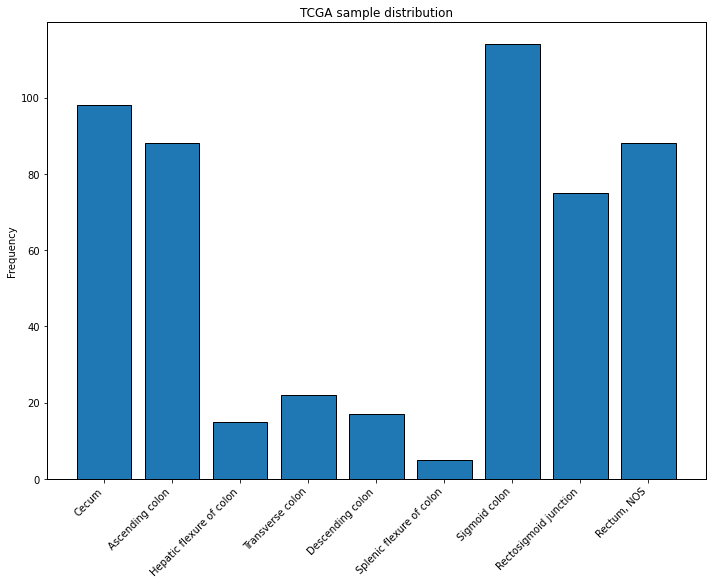

In [4]:
pa_transcriptome.plot_sample_distribution(title='TCGA sample distribution')

## Calculate median value and median average variation for each colon section

In [5]:
medians_tr, mad_tr = pa_transcriptome.median_by_section()

This step has already been executed...loading results...
This step has already been executed...loading results...


In [6]:
medians_tr.head()

Cecum  Ascending colon  Hepatic flexure of colon  \
ensmbl_id                                                               
ENSG00000000003  73.907526        78.403451                103.124233   
ENSG00000000005   1.008409         0.735658                  1.336772   
ENSG00000000419  99.851076       104.284560                117.657759   
ENSG00000000457   6.921388         6.640371                  7.004861   
ENSG00000000460   5.263295         4.969358                  5.424937   

                 Transverse colon  Descending colon  Sigmoid colon  \
ensmbl_id                                                            
ENSG00000000003         75.913878         82.543993     132.823036   
ENSG00000000005          0.798797          1.680453       1.657560   
ENSG00000000419         97.626225        154.401872     170.663164   
ENSG00000000457          7.278464          7.113812       7.131714   
ENSG00000000460          4.844178          6.057782       5.991615   

                 Rectosigmoid junction  Rectum, NOS  
ensmbl_id                                            
ENSG00000000003             133.446046   100.606220  
ENSG00000000005               1.893015     1.379483  
ENSG00000000419             139.689173   144.105845  
ENSG00000000457               7.116130     6.885216  
ENSG00000000460               5.782876     6.181672

In [7]:
mad_tr.head()

Unnamed: 0      Cecum  Ascending colon  Hepatic flexure of colon  \
0  ENSG00000000003  33.045419        38.799498                 58.271199   
1  ENSG00000000005   0.861570         0.636900                  1.336772   
2  ENSG00000000419  32.520453        33.029376                 27.774534   
3  ENSG00000000457   1.570295         1.206098                  1.909975   
4  ENSG00000000460   1.378870         1.584756                  1.463548   

   Transverse colon  Descending colon  Sigmoid colon  Rectosigmoid junction  \
0         30.181981         50.004580      46.806473              40.212477   
1          0.705742          1.163834       1.457359               1.642586   
2         24.913604         76.060263      50.032742              48.295106   
3          1.633780          1.147258       1.676726               1.764332   
4          1.399207          1.997586       1.643072               1.592896   

   Rectum, NOS  
0    34.390195  
1     0.869259  
2    45.392903  
3     1.417251  
4     1.930137

## Fit Observables

In [8]:
scores_tr, poly_obs_scores_tr, sig_obs_scores_tr, poly_models_tr, sig_models_tr = pa_transcriptome.fit_data(medians_tr, guess_bounds = True)

This step has already been executed...loading results...
This step has already been executed...loading results...
This step has already been executed...loading results...
This step has already been executed...loading results...


## Fit Random permutated data

In [9]:
poly_perm_scores_tr, sig_perm_scores_tr, sig_perm_models_tr = pa_transcriptome.fit_random_data(medians_tr, guess_bounds = True)

This step has already been executed...loading results...
This step has already been executed...loading results...
This step has already been executed...loading results...


## Compare obrservable vs permutated data

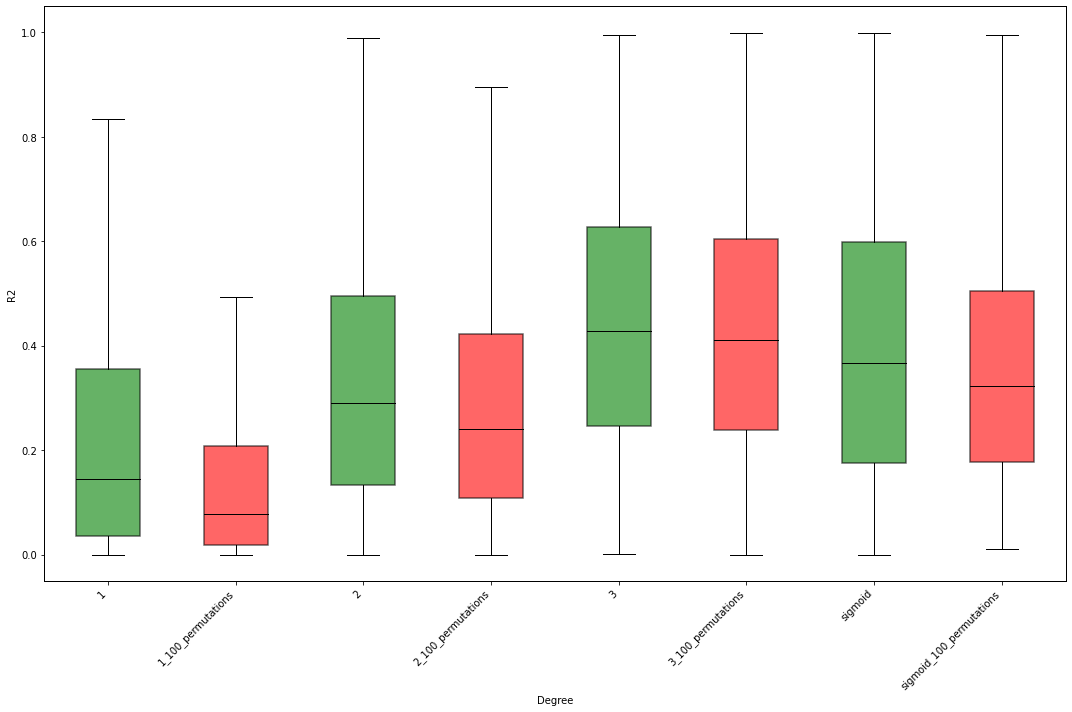

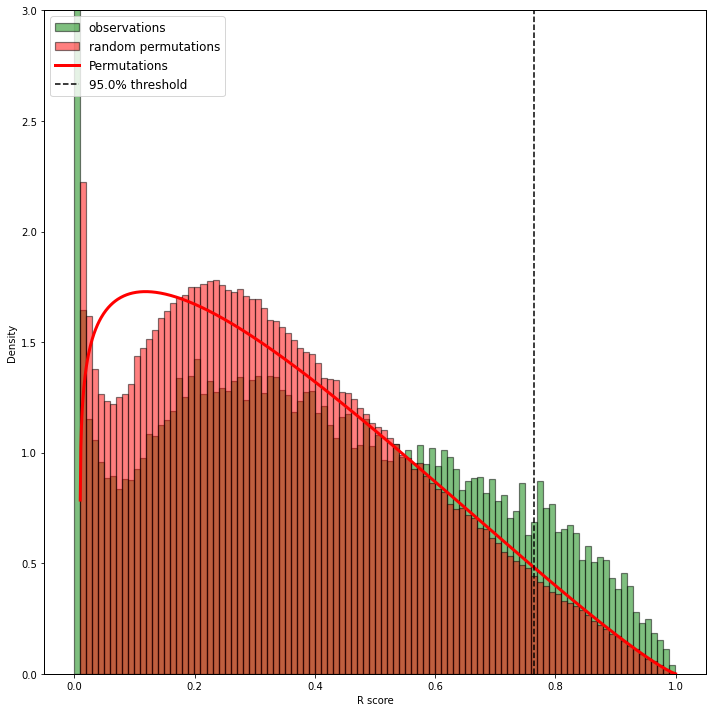

/home/ieo5417/.local/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:639: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


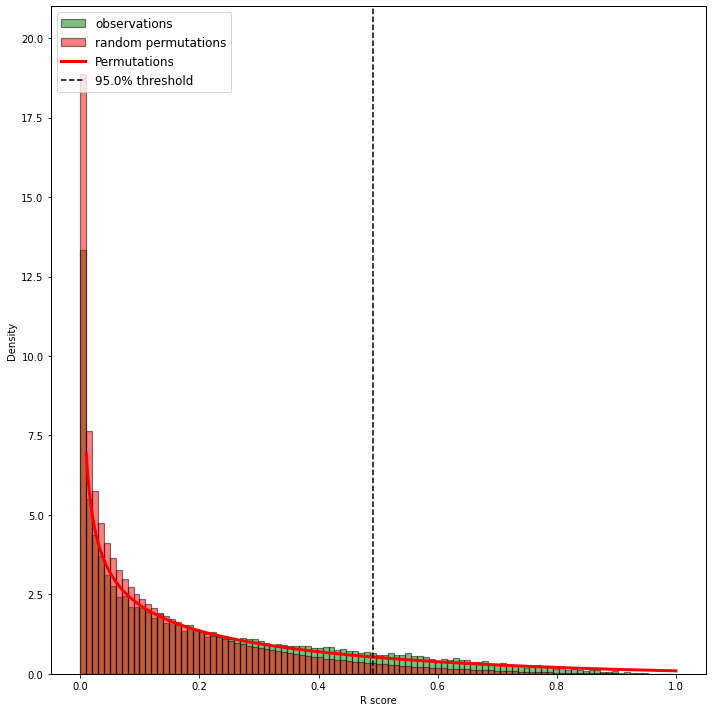

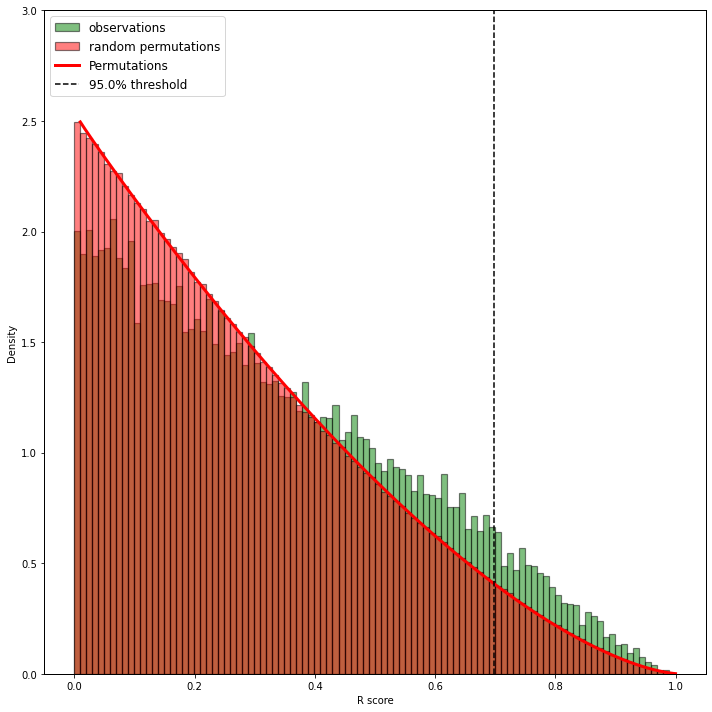

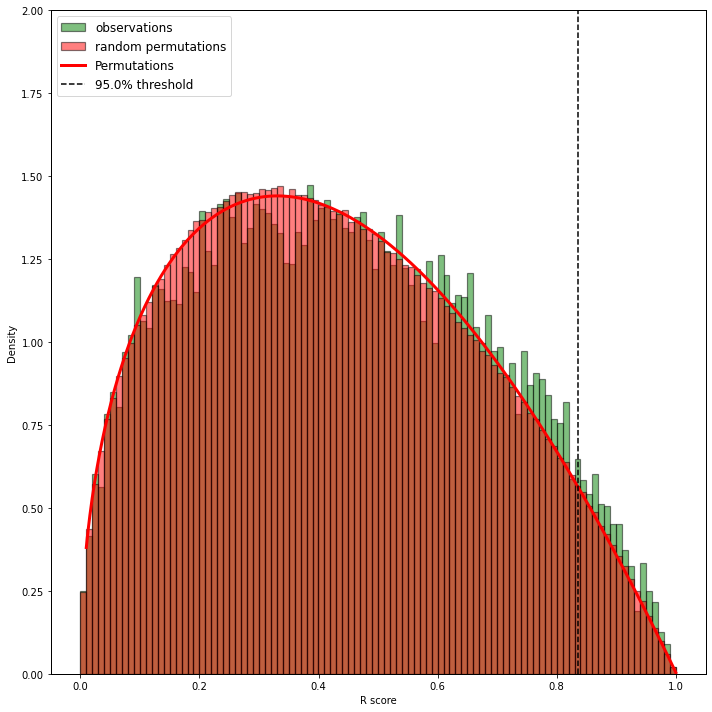

In [10]:
models_pvalue_tr=pa_transcriptome.plot_gof(poly_obs_scores_tr, sig_obs_scores_tr, poly_perm_scores_tr, sig_perm_scores_tr, dist_perm=True)

In [11]:
models_pvalue_tr

{'sigmoidal': [27991544945.0, 5.645448405547989e-81, 0.7638648097697223],
 1: [37236394548.0, 0.0, 0.49100631201580486],
 2: [34297705216.0, 1.4070971370627024e-197, 0.6981166202806701],
 3: [31924314722.0, 5.0130851237199393e-20, 0.8349099588242126]}

## Cluster genes

In [12]:
genes_clusters_tr=pa_transcriptome.cluster_genes(scores_tr)

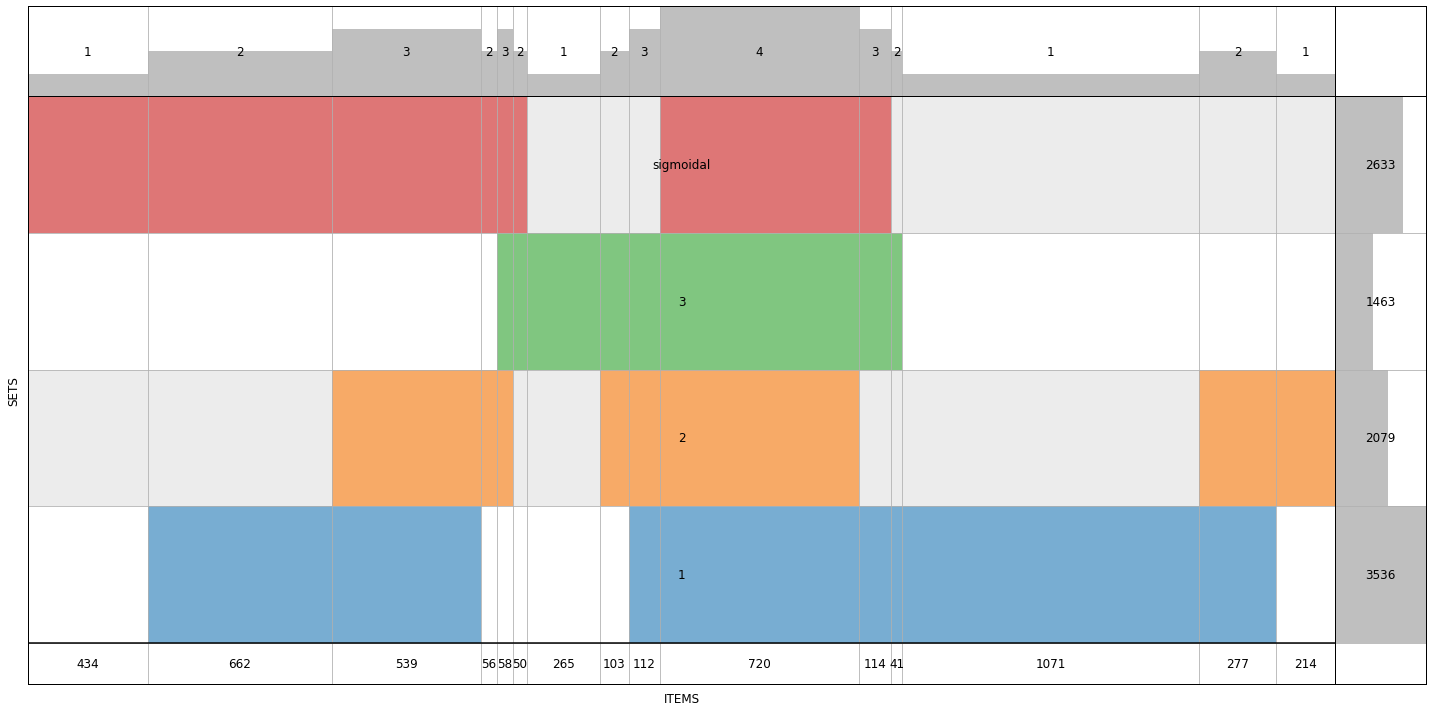

In [13]:
pa_transcriptome.plot_clusters(genes_clusters_tr)

In [14]:
summary_tr=pa_transcriptome.get_summary_table(genes_clusters_tr, scores_tr)

In [15]:
continuum_tr, sigmoid_tr, discarded_tr = pa_transcriptome.classify_genes(summary_tr)

## PLOT PROFILE OF GENES FOUND IN CLOSE PROXIMITY TO CRC METABOLITES O LINKED GLYCOSILATION AND EXTRACELLULA MATRIX ORGANIZATION

## Plot distribution of inflexion points for sigmoid genes

<lambdifygenerated-1>:3: RuntimeWarning: overflow encountered in double_scalars
  return (c*k*exp(-k*(x - x0))/(1 + exp(-k*(x - x0)))**2)
<lambdifygenerated-1>:3: RuntimeWarning: invalid value encountered in double_scalars
  return (c*k*exp(-k*(x - x0))/(1 + exp(-k*(x - x0)))**2)
<lambdifygenerated-1>:3: RuntimeWarning: overflow encountered in exp
  return (c*k*exp(-k*(x - x0))/(1 + exp(-k*(x - x0)))**2)


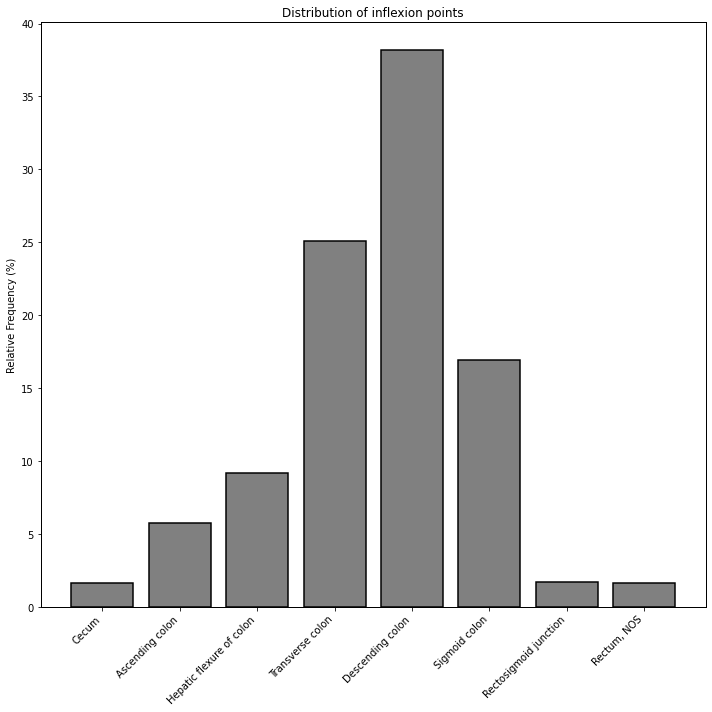

In [16]:
gene_list_tr, section_l_tr = pa_transcriptome.strict_sig_list(sigmoid_tr, sig_models_tr, plot_dist = True)

## Plot distribution of inflexion points for random permutation

<lambdifygenerated-2>:3: RuntimeWarning: overflow encountered in double_scalars
  return (c*k*exp(-k*(x - x0))/(1 + exp(-k*(x - x0)))**2)
<lambdifygenerated-2>:3: RuntimeWarning: invalid value encountered in double_scalars
  return (c*k*exp(-k*(x - x0))/(1 + exp(-k*(x - x0)))**2)
<lambdifygenerated-2>:3: RuntimeWarning: overflow encountered in exp
  return (c*k*exp(-k*(x - x0))/(1 + exp(-k*(x - x0)))**2)


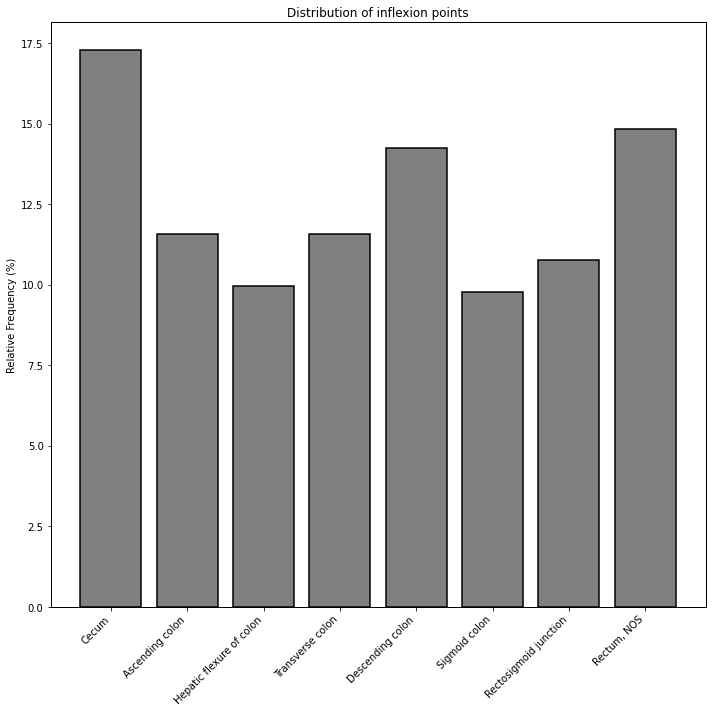

In [17]:
pa_transcriptome.random_model_inflexion(sig_perm_models_tr)

In [18]:
mad_tr.set_index('Unnamed: 0', inplace=True)

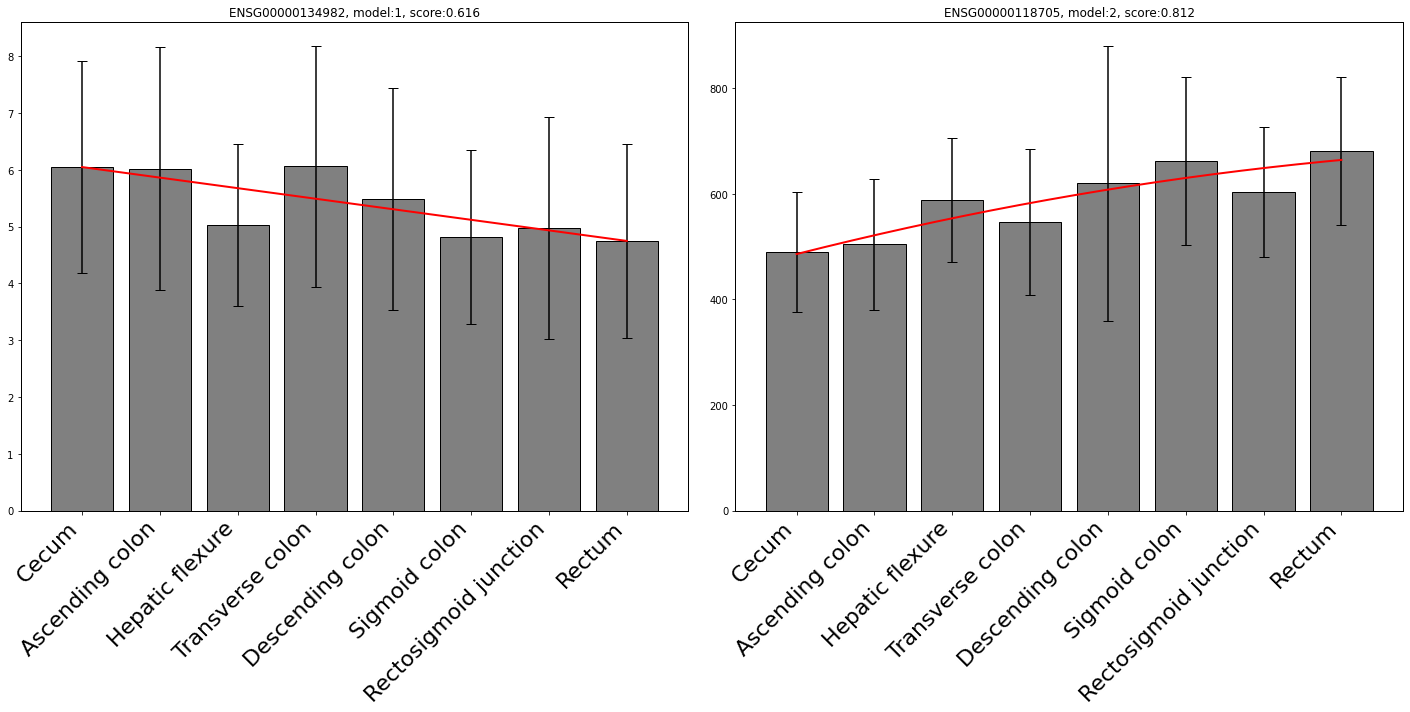

In [19]:
pa_transcriptome.plot_fitting_bars(continuum_tr, ['ENSG00000134982','ENSG00000118705'], medians_tr, mad_tr, poly_models_tr, sig_models_tr, 'continuum', save_as='APC_RPN2.svg')

# METHYLOME PROFILING

In [20]:
# Create workflow class, specifying the path to the SETTINGS.ini file
pa_methylome = ProfileAnalysis('../../../docker/analysis/methylome')

Project has been created!


/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:153: UserWarning: Folder input_data already exist...skipping
  warnings.warn("Folder input_data already exist...skipping",
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:159: UserWarning: Folder data_raw already exist...skipping
  warnings.warn("Folder data_raw already exist...skipping",
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:165: UserWarning: Folder data_clinical already exist...skipping
  warnings.warn("Folder data_clinical already exist...skipping",
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:171: UserWarning: Folder sample_by_section already exist...skipping
  warnings.warn("Folder sample_by_section already exist...skipping",
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_anal

## Assign each sample in clinical data file to a colon section

In [21]:
pa_methylome.create_samples_to_sections_table()

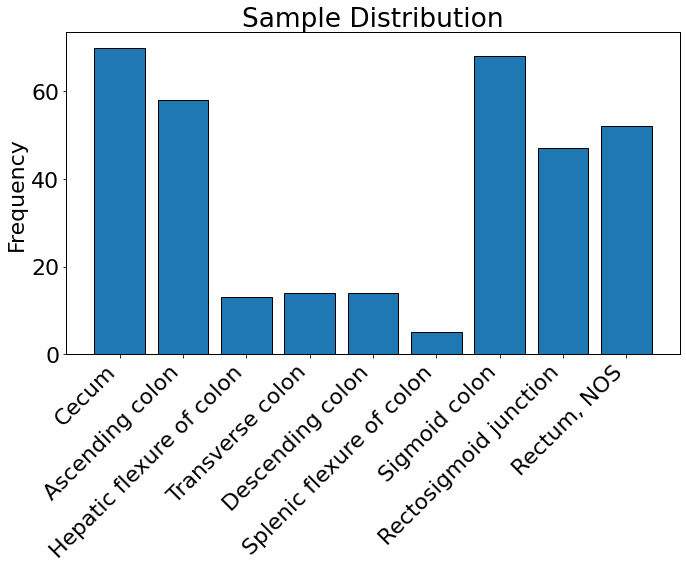

In [22]:
pa_methylome.plot_sample_distribution()

## Calculate median value for each colon section

In [23]:
medians_meth, mad_meth = pa_methylome.median_by_section()

This step has already been executed...loading results...
This step has already been executed...loading results...


In [24]:
medians_meth.head()

Cecum  Ascending colon  Hepatic flexure of colon  \
promoter                                                         
KLHL17_1   0.227268         0.229887                  0.228077   
PLEKHN1_1  0.354695         0.358179                  0.342328   
HES4_1     0.039598         0.040711                  0.036758   
ISG15_2    0.025848         0.026511                  0.025510   
ISG15_1    0.084128         0.082775                  0.083751   

           Transverse colon  Descending colon  Sigmoid colon  \
promoter                                                       
KLHL17_1           0.224473          0.227173       0.228156   
PLEKHN1_1          0.336968          0.356766       0.350886   
HES4_1             0.040229          0.037136       0.038784   
ISG15_2            0.027070          0.024012       0.025857   
ISG15_1            0.080576          0.087346       0.084165   

           Rectosigmoid junction  Rectum, NOS  
promoter                                       
KLHL17_1                0.214519     0.214837  
PLEKHN1_1               0.342066     0.343440  
HES4_1                  0.035776     0.037375  
ISG15_2                 0.023808     0.024014  
ISG15_1                 0.094417     0.091571

In [25]:
mad_meth.head()

Unnamed: 0     Cecum  Ascending colon  Hepatic flexure of colon  \
0   KLHL17_1  0.010512         0.011420                  0.007939   
1  PLEKHN1_1  0.027562         0.026303                  0.007369   
2     HES4_1  0.004728         0.004637                  0.005384   
3    ISG15_2  0.003025         0.002983                  0.001596   
4    ISG15_1  0.010670         0.009670                  0.009623   

   Transverse colon  Descending colon  Sigmoid colon  Rectosigmoid junction  \
0          0.009176          0.009888       0.011703               0.012690   
1          0.019482          0.015834       0.022642               0.029912   
2          0.003854          0.003585       0.003875               0.003460   
3          0.002552          0.002358       0.001914               0.002103   
4          0.007821          0.012154       0.008664               0.012094   

   Rectum, NOS  
0     0.012109  
1     0.025078  
2     0.004259  
3     0.002495  
4     0.010132

## Fit Observables

In [26]:
scores_meth, poly_obs_scores_meth, sig_obs_scores_meth, poly_models_meth, sig_models_meth = pa_methylome.fit_data(medians_meth, guess_bounds = True)

This step has already been executed...loading results...
This step has already been executed...loading results...
This step has already been executed...loading results...
This step has already been executed...loading results...


## Fit Random permutated data

In [27]:
poly_perm_scores_meth, sig_perm_scores_meth, sig_perm_models_meth=pa_methylome.fit_random_data(medians_meth, guess_bounds = True)

This step has already been executed...loading results...
This step has already been executed...loading results...
This step has already been executed...loading results...


## Compare obrservable vs permutated data

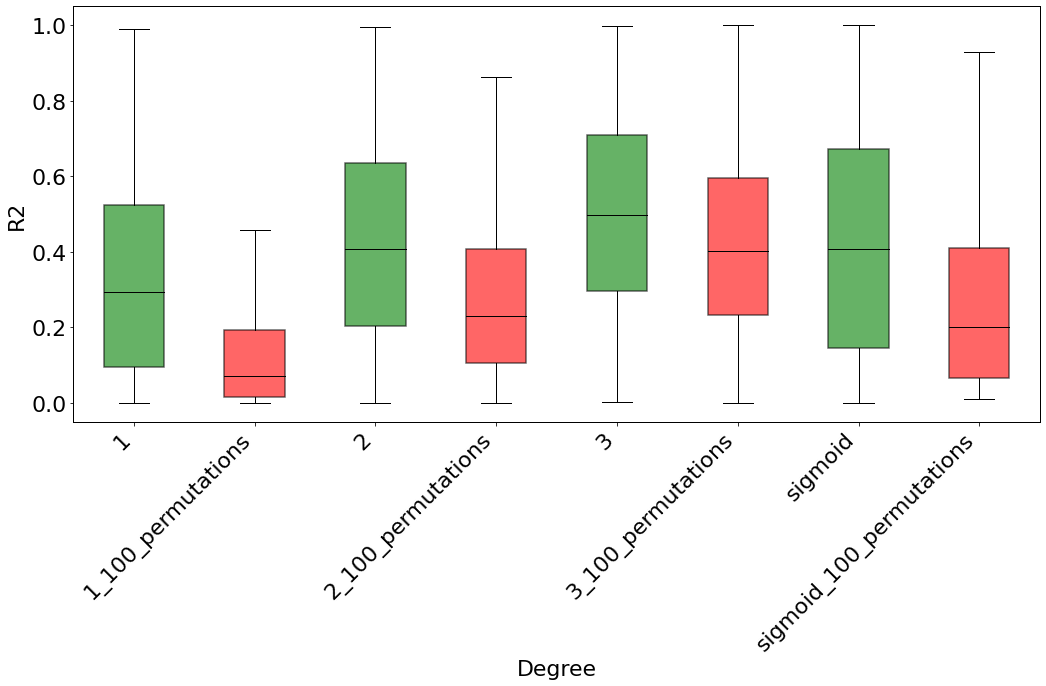

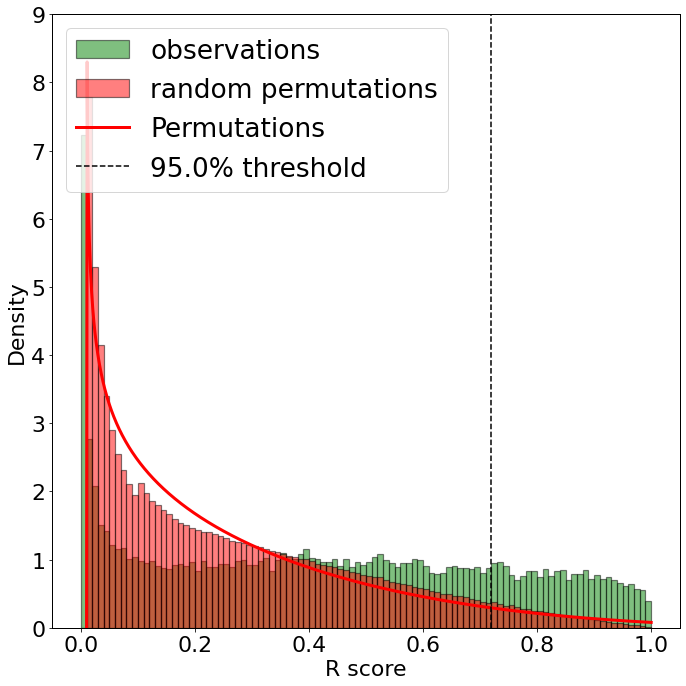

/home/ieo5417/.local/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:639: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


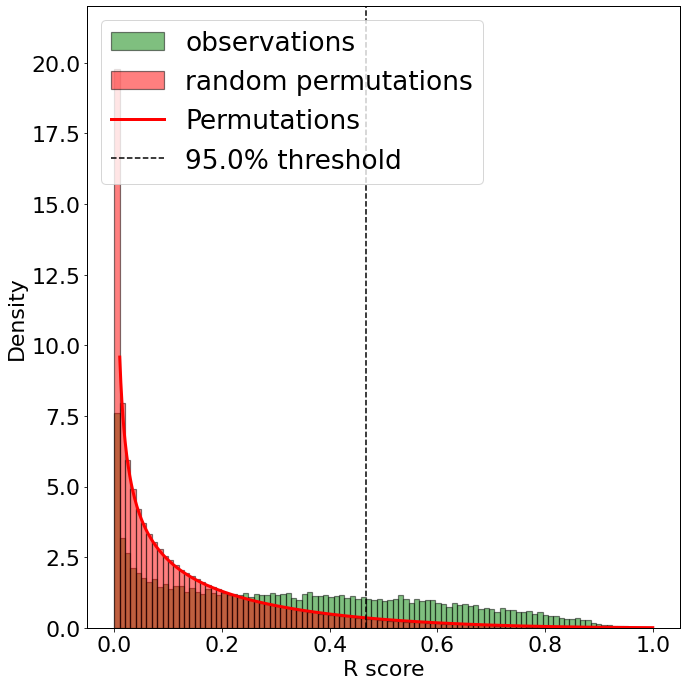

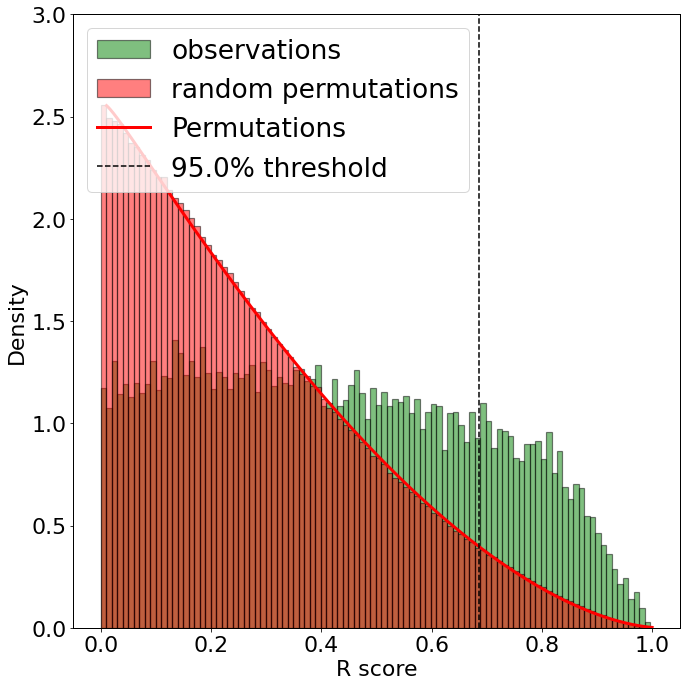

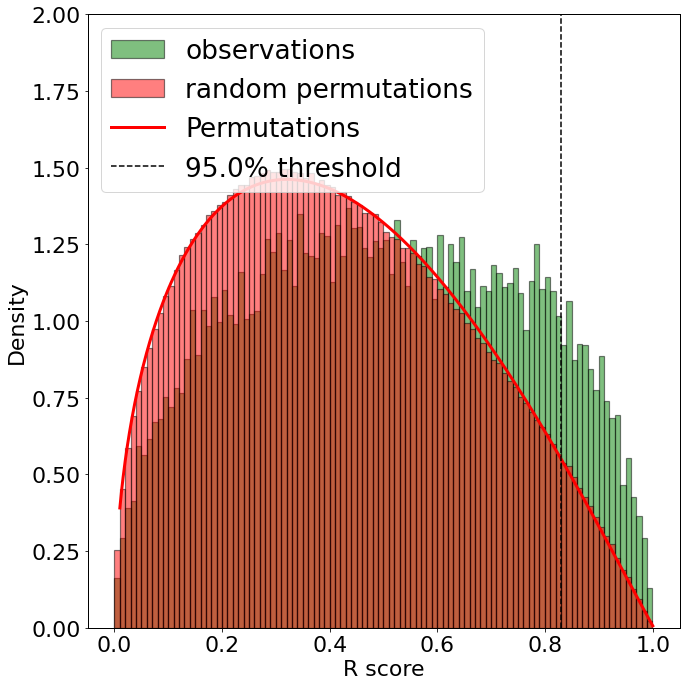

In [28]:
models_pvalue_meth=pa_methylome.plot_gof(poly_obs_scores_meth, sig_obs_scores_meth, poly_perm_scores_meth, sig_perm_scores_meth, dist_perm=True)

In [29]:
models_pvalue_meth

{'sigmoidal': [26877847553.0, 0.0, 0.7183041559513804],
 1: [39896006196.0, 0.0, 0.46775889423870853],
 2: [36207071470.0, 0.0, 0.6853576253043737],
 3: [31986043983.0, 0.0, 0.829048055760033]}

## Cluster genes

In [30]:
genes_clusters_meth=pa_methylome.cluster_genes(scores_meth)

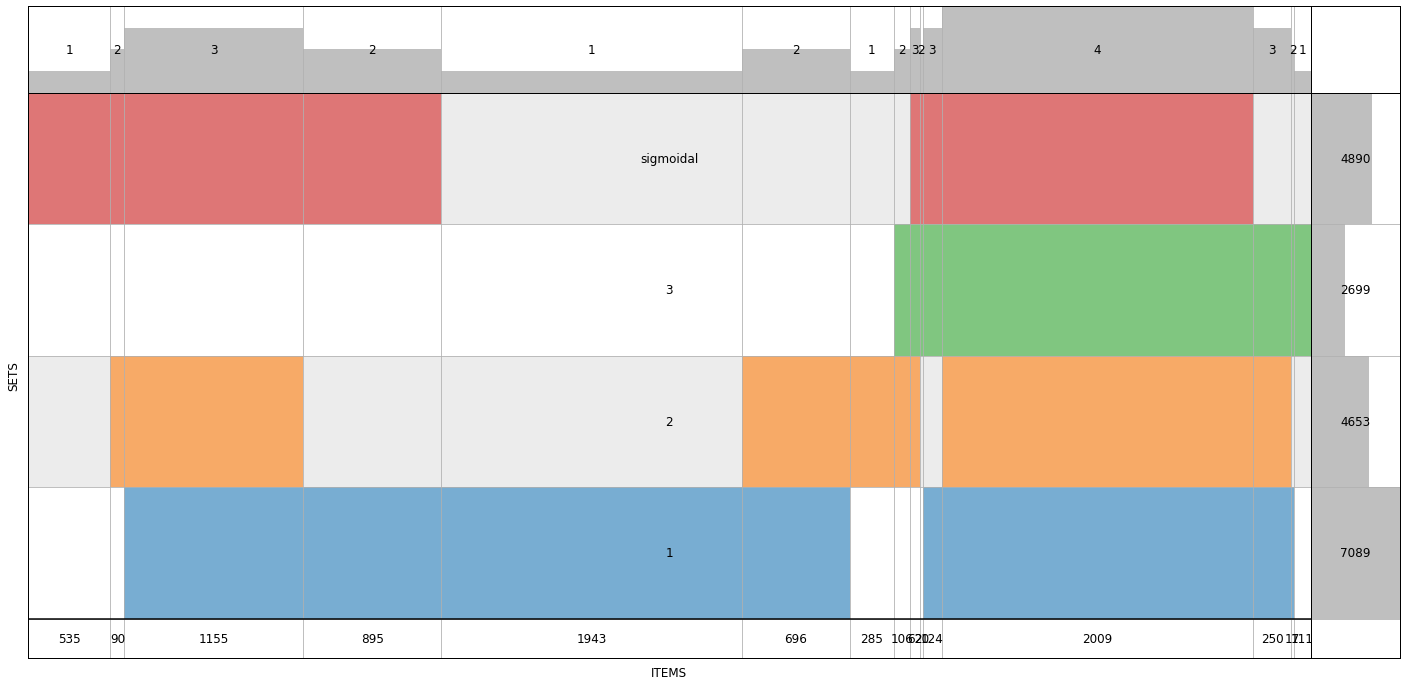

In [31]:
pa_methylome.plot_clusters(genes_clusters_meth)

In [32]:
summary_meth=pa_methylome.get_summary_table(genes_clusters_meth, scores_meth)

In [33]:
continuum_meth, sigmoid_meth, discarded_meth = pa_methylome.classify_genes(summary_meth)

/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:799: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cont.loc[index] = row
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:799: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cont.loc[index] = row
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:799: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata

## Plot distribution of inflexion points for sigmoid genes

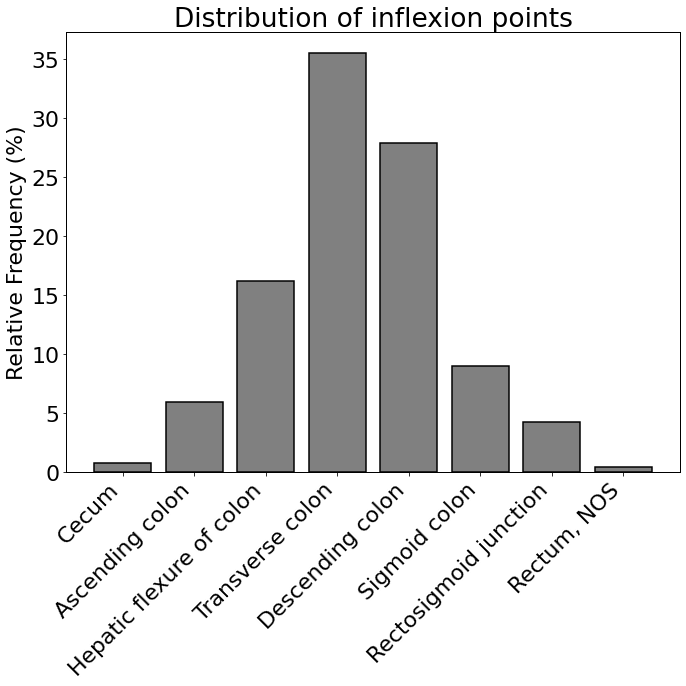

In [34]:
gene_list_meth, section_l_meth = pa_methylome.strict_sig_list(sigmoid_meth, sig_models_meth, plot_dist = True)

## Plot distribution of inflexion points for random permutation

<lambdifygenerated-4>:3: RuntimeWarning: overflow encountered in double_scalars
  return (c*k*exp(-k*(x - x0))/(1 + exp(-k*(x - x0)))**2)
<lambdifygenerated-4>:3: RuntimeWarning: invalid value encountered in double_scalars
  return (c*k*exp(-k*(x - x0))/(1 + exp(-k*(x - x0)))**2)
<lambdifygenerated-4>:3: RuntimeWarning: overflow encountered in exp
  return (c*k*exp(-k*(x - x0))/(1 + exp(-k*(x - x0)))**2)


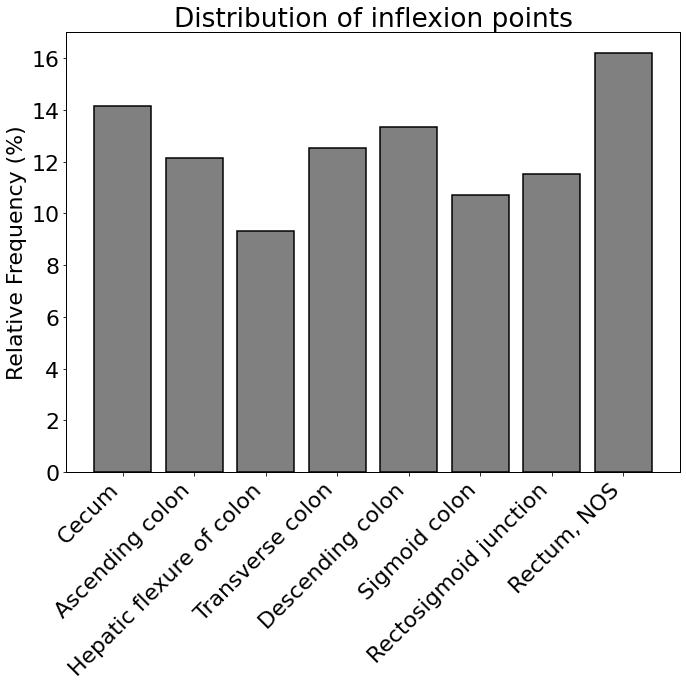

In [35]:
pa_methylome.random_model_inflexion(sig_perm_models_meth)

# OVERLAP BETWEEN TRANSCRIPTOMIC AND METHYLATION DATA

## continuum

In [36]:
gene_list = set([i.split('_')[0] for i in list(continuum_meth.index)])
query = mg.querymany(gene_list,
                      scopes='symbol',
                      species=9606,
                      fields='ensembl',
                      returnall=True)
meth_ensmbl = []
for element in query['out']:
    if 'ensembl' in element:
        entry = element['ensembl']
        if type(entry) is list:
            for sub_element in entry:
                meth_ensmbl.append(sub_element['gene'])
        else:
            meth_ensmbl.append(entry['gene'])

querying 1-1000...done.
querying 1001-2000...done.
querying 2001-2951...done.
Finished.
116 input query terms found no hit:
	['KIAA0141', 'FAM126A', 'GATS', 'C7orf43', 'ZCCHC6', 'WDR78', 'FAM63A', 'HMHA1', 'VARS', 'CCDC130', 


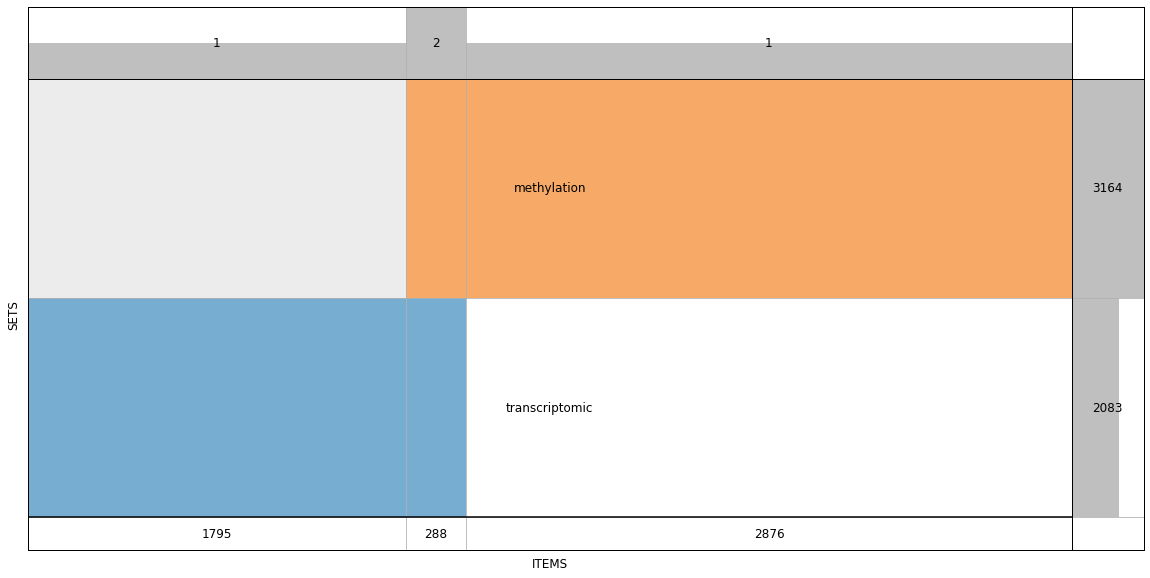

In [37]:
clusters = [set(continuum_tr.index), meth_ensmbl]
labels = ['transcriptomic', 'methylation']
plt.figure(figsize=(20, 10))
supervenn(clusters, labels)

## sigmoid

In [38]:
gene_list = set([i.split('_')[0] for i in list(sigmoid_meth.index)])
query = mg.querymany(gene_list,
                      scopes='symbol',
                      species=9606,
                      fields='ensembl',
                      returnall=True)
meth_ensmbl = []
for element in query['out']:
    if 'ensembl' in element:
        entry = element['ensembl']
        if type(entry) is list:
            for sub_element in entry:
                meth_ensmbl.append(sub_element['gene'])
        else:
            meth_ensmbl.append(entry['gene'])

querying 1-1000...done.
querying 1001-1107...done.
Finished.
1 input query terms found dup hits:
	[('SFTA3', 2)]
33 input query terms found no hit:
	['CCDC41', 'UHRF1BP1', 'ORAOV1', 'FAM19A5', 'C7orf60', 'SEPT8', 'FAM134B', 'C19orf76', 'C16orf45', '


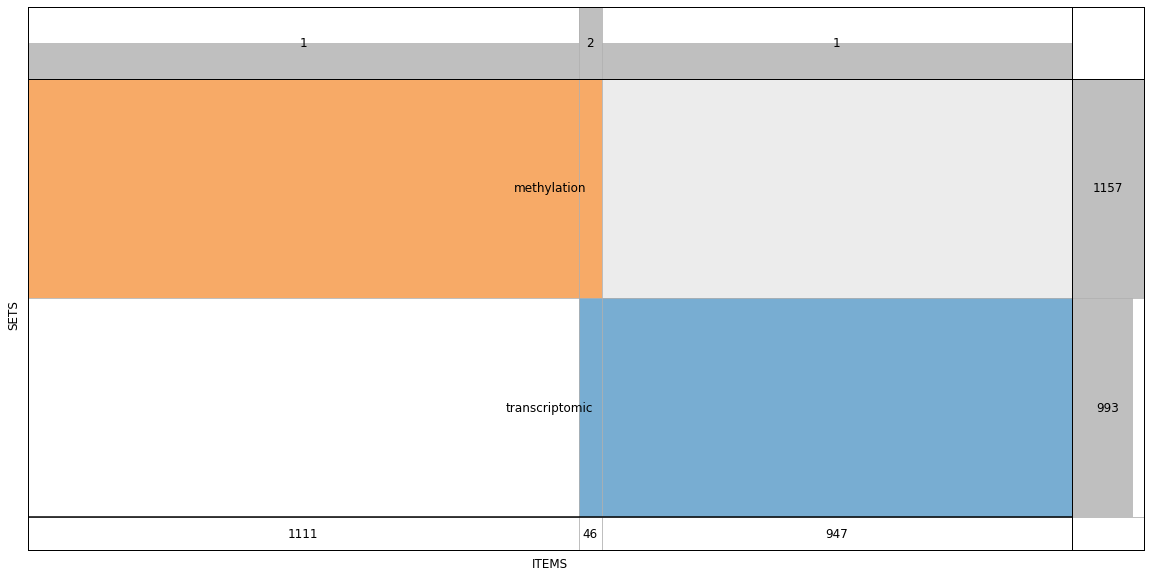

In [39]:
clusters = [set(sigmoid_tr.index), meth_ensmbl]
labels = ['transcriptomic', 'methylation']
plt.figure(figsize=(20, 10))
supervenn(clusters, labels)

# OVERLAP WITH METHYLDRIVER

In [229]:
import os
trend = list(set([i.split('_')[0] for i in list(continuum_meth.index)]))
trend= trend +list(set([i.split('_')[0] for i in list(sigmoid_meth.index)]))
diff_methylated = pd.read_csv('../../../docker/analysis/methyldriver/COAD_hyper_hypo_methylated_genes.csv')
diff_methylated.set_index('gene_symbol', inplace=True)


In [230]:
no_hypo=pd.DataFrame(columns=['genes'])
all_r_genes=pd.read_csv('../../../docker/analysis/methyldriver/methyldriver_all_genes.csv')
for index,row in all_r_genes.iterrows():
    if row['genes'] not in diff_methylated.index:
          no_hypo.loc[index]=row
no_hypo.set_index('genes', inplace=True)

In [42]:
for index, row in medians_meth.iterrows():
    medians_meth.loc[index, 'gene'] = index.split('_')[0]
medians_meth.set_index('gene', inplace=True)

In [43]:
medians_meth = medians_meth[~medians_meth.index.duplicated(keep='first')]

In [44]:
trend_df=pd.DataFrame(trend, columns=['genes'])
trend_df.set_index('genes', inplace=True)
no_trend=medians_meth.merge(trend_df, left_index=True, right_index=True, how='outer', indicator=True)
no_trend=no_trend[no_trend['_merge']=='left_only']

In [45]:
no_trend.merge(no_hypo, left_index=True, right_index=True, how='inner')

Cecum  Ascending colon  Hepatic flexure of colon  Transverse colon  \
A1BG    0.051682         0.055935                  0.042325          0.037469   
A1CF    0.473695         0.501855                  0.403518          0.479909   
A2M     0.115668         0.135327                  0.098105          0.130804   
A2ML1   0.431462         0.447097                  0.368159          0.485279   
A4GNT   0.338886         0.365925                  0.296978          0.398168   
...          ...              ...                       ...               ...   
ZWILCH  0.048879         0.049308                  0.054272          0.049511   
ZWINT   0.041230         0.042453                  0.039273          0.042470   
ZXDC    0.103585         0.107682                  0.101338          0.113822   
ZYG11B  0.045168         0.045260                  0.056247          0.049798   
ZZZ3    0.040225         0.041362                  0.040713          0.039524   

        Descending colon  Sigmoid colon  Rectosigmoid junction  Rectum, NOS  \
A1BG            0.045788       0.048893               0.053876     0.049203   
A1CF            0.400775       0.467102               0.444876     0.422339   
A2M             0.103928       0.133955               0.107996     0.128271   
A2ML1           0.465167       0.424371               0.400420     0.424255   
A4GNT           0.337555       0.345984               0.337827     0.336771   
...                  ...            ...                    ...          ...   
ZWILCH          0.047406       0.051804               0.045610     0.049430   
ZWINT           0.038812       0.041995               0.039607     0.037112   
ZXDC            0.099669       0.097111               0.094077     0.094604   
ZYG11B          0.041466       0.043542               0.046767     0.046016   
ZZZ3            0.039367       0.041640               0.040306     0.041556   

           _merge  
A1BG    left_only  
A1CF    left_only  
A2M     left_only  
A2ML1   left_only  
A4GNT   left_only  
...           ...  
ZWILCH  left_only  
ZWINT   left_only  
ZXDC    left_only  
ZYG11B  left_only  
ZZZ3    left_only  

[10431 rows x 9 columns]

In [46]:
trend_df.merge(no_hypo, left_index=True, right_index=True, how='inner')

Empty DataFrame
Columns: []
Index: [AAAS, AACS, AAED1, AAK1, AASDHPPT, ABCA3, ABCA9, ABCB1, ABCB10, ABCB11, ABCB5, ABCB6, ABCF3, ABCG1, ABCG4, ABHD13, ABHD14A, ABHD14B, ABHD16A, ABHD18, ABLIM2, ABRA, ABTB2, ACAA2, ACACB, ACAD11, ACAD8, ACAD9, ACAP2, ACAT1, ACBD4, ACBD5, ACCS, ACE, ACE, ACHE, ACKR2, ACOT7, ACOXL, ACP1, ACP5, ACPP, ACRBP, ACSF2, ACSL5, ACSM1, ACSM6, ACTB, ACTN3, ACTR1B, ACTR3, ACTR3B, ACTR3C, ACTRT3, ACVR1C, ACVRL1, ADAM15, ADAM22, ADAM23, ADAMTS13, ADAMTS15, ADAMTS5, ADAMTS6, ADAMTS9, ADAMTSL1, ADARB1, ADCK4, ADCY1, ADCY5, ADD3, ADGRB2, ADGRF3, ADGRF5, ADGRG1, ADGRG1, ADGRV1, ADIPOQ, ADORA1, ADORA2A, ADPRH, ADPRM, ADRA1A, ADRBK2, ADRM1, AEN, AFF1, AFF4, AGBL4, AGFG2, AGL, AGMAT, AGO1, AGO2, AGO3, AGO4, AGPAT6, AGRN, AGTR1, AHNAK, AHRR, ...]

[3873 rows x 0 columns]

In [47]:
cont_df = pd.DataFrame(list(set([i.split('_')[0] for i in list(continuum_meth.index)])), columns=['gene'])
cont_df.set_index('gene', inplace=True)

In [48]:
cont_df.merge(diff_methylated, how='inner', left_index=True, right_index=True)

Empty DataFrame
Columns: []
Index: [ACOX1, ADAP1, ADIPOR1, AHI1, ARF5, ARL4A, ARPC1B, BEND5, BSCL2, BST2, BTG1, C17orf107, CACNB1, CCDC106, CCNH, CD200, CDC42SE1, CDIPT, CIPC, CLEC2D, CROT, CTNNB1, DCAF5, DCBLD2, DCPS, DDX6, DLD, DLG4, EFCAB6, EPC1, EPM2A, FAIM2, FAM126A, FAM184A, FBXL19, FCRLB, FDFT1, FGFR1, FIGN, FOXO3, FSCN3, GDPD5, GNB2, GPCPD1, GPN1, GRWD1, GTDC1, HNRNPU, HSPA1A, HSPA1L, IGFLR1, IQUB, ITPKB, KCNQ5, KLF7, LRRC8C, MAP3K7, MMAB, MRPL28, MRPL36, MRPS7, MSI2, MTMR9, MTPN, MYH10, NCOA1, NDUFS6, NFYA, NSL1, ODF2, OSGIN2, PARD6B, PCDH9, PDE1B, PLEKHO1, PRPF31, PRRT3, PTMA, RC3H2, RCCD1, SDK1, SLC16A7, SMAD2, SMAP2, SSH2, STX16, SUCLA2, TCF4, THBS4, TM4SF19, TOMM70, TOX, TRDMT1, TSC22D2, UBE2E2, ZEB1, ZEB2, ZFP69B, ZFP91, ZMYM2, ...]

[106 rows x 0 columns]

In [49]:
sig_df = pd.DataFrame(list(set([i.split('_')[0] for i in list(sigmoid_meth.index)])), columns=['gene'])
sig_df.set_index('gene', inplace=True)
sig_df.merge(diff_methylated, how='inner', left_index=True, right_index=True)

Empty DataFrame
Columns: []
Index: [AKR1B1, AMOTL1, ARL4A, ATG5, C1QTNF1, CCT6B, CDC25B, CNNM1, COG5, DCAF5, EHD3, ELMO1, ENTPD5, EVC, FDFT1, FGFR1, FLI1, GAMT, GAS7, GFPT1, GNAS, GNB4, GPER1, GPN1, GRM2, ITIH5, KHDC1, KLHL21, LMBRD1, LTB4R, MAMDC4, MAP3K2, MAP3K7, MFN2, MRPL36, NCKAP1L, NDUFS6, PFN4, PIGB, PIGR, PLEKHA3, POLD3, PRPF31, PTPRM, RASSF2, RC3H2, RHEB, RNF126, RPS25, SFMBT2, SLFN12, SMAD2, STX16, SUCLA2, TDRP, WASL, YTHDF2, ZBTB40, ZBTB43, ZEB2, ZFP91, ZNF132, ZNF354C, ZNF532, ZSCAN12]

[65 rows x 0 columns]

In [50]:
import numpy as np
table = np.array([[106, 3873], [65, 10431]])
from scipy.stats import fisher_exact
oddsr, p = fisher_exact(table, alternative='two-sided')
p

4.8184314400159626e-21

# MUTATIONS PROFILING

In [51]:
# Create workflow class, specifying the path to the SETTINGS.ini file
pa_mutations = ProfileAnalysis('../../../docker/analysis/mutations')

Project has been created!


/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:153: UserWarning: Folder input_data already exist...skipping
  warnings.warn("Folder input_data already exist...skipping",
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:159: UserWarning: Folder data_raw already exist...skipping
  warnings.warn("Folder data_raw already exist...skipping",
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:165: UserWarning: Folder data_clinical already exist...skipping
  warnings.warn("Folder data_clinical already exist...skipping",
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:171: UserWarning: Folder sample_by_section already exist...skipping
  warnings.warn("Folder sample_by_section already exist...skipping",
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_anal

## Assign each sample in clinical data file to a colon section

## Calculate median value for each colon section

In [52]:
medians_mut, mad_mut = pa_mutations.median_by_section()

This step has already been executed...loading results...
This step has already been executed...loading results...


In [53]:
medians_mut.head()

Cecum  Ascending_Colon  Hepatic_Flexure  Transverse_Colon  \
ensmbl_id                                                                  
A2M         6.024096         8.000000         5.555556         12.903226   
A2ML1       9.638554        12.000000         5.555556         25.806452   
AASS        7.228916         4.000000        11.111111          6.451613   
ABCA1      13.253012        10.666667        11.111111         12.903226   
ABCA10      8.433735         9.333333         5.555556          9.677419   

           Descending_Colon  Sigmoid_Colon  Rectosigmoid_Junction    Rectum  
ensmbl_id                                                                    
A2M               11.111111       2.752294               6.976744  6.849315  
A2ML1              0.000000       3.669725               2.325581  4.109589  
AASS              11.111111       0.917431               2.325581  6.849315  
ABCA1              5.555556       6.422018               0.000000  5.479452  
ABCA10             0.000000       4.587156               0.000000  8.219178

In [54]:
pa_mutations.print_settings()

Settings file path: ../../../docker/analysis/mutations/SETTINGS.ini
Defined sections: {'Cecum': ['Cecum'], 'Ascending colon': ['Ascending colon'], 'Hepatic flexure of colon': ['Hepatic flexure of colon'], 'Transverse colon': ['Transverse colon'], 'Descending colon': ['Descending colon', 'Splenic flexure of colon'], 'Sigmoid colon': ['Sigmoid colon'], 'Rectosigmoid junction': ['Rectosigmoid junction'], 'Rectum, NOS': ['Rectum, NOS']}
Section names for plotting: ['Cecum', 'Ascending colon', 'Hepatic flexure', 'Transverse colon', 'Sigmoid colon', 'Rectosigmoid junction', 'Rectum']
Section distance from reference point: [1, 2, 3, 4, 5, 6, 7, 8]
Index colon name: ensmbl_id
Maximum percentage of 0s to drop a sample: 0.3
Is random seed set?: True 
random seed: 53 
Random distribution area threshold: 0.95
Maximum polynomial degree to test: 3
Number of random permutations: 100
Type of data analysed: numeric
Median NaN data: keep
Input data folder: ../../../docker/analysis/mutations/input_data
R

## Fit Observables

In [55]:
scores_mut, poly_obs_scores_mut, sig_obs_scores_mut, poly_models_mut, sig_models_mut = pa_mutations.fit_data(medians_mut, guess_bounds = True)

This step has already been executed...loading results...
This step has already been executed...loading results...
This step has already been executed...loading results...
This step has already been executed...loading results...


## Fit Random permutated data

In [56]:
poly_perm_scores_mut, sig_perm_scores_mut, sig_perm_models_mut=pa_mutations.fit_random_data(medians_mut, guess_bounds = False)

This step has already been executed...loading results...
This step has already been executed...loading results...
This step has already been executed...loading results...


## Compare obrservable vs permutated data

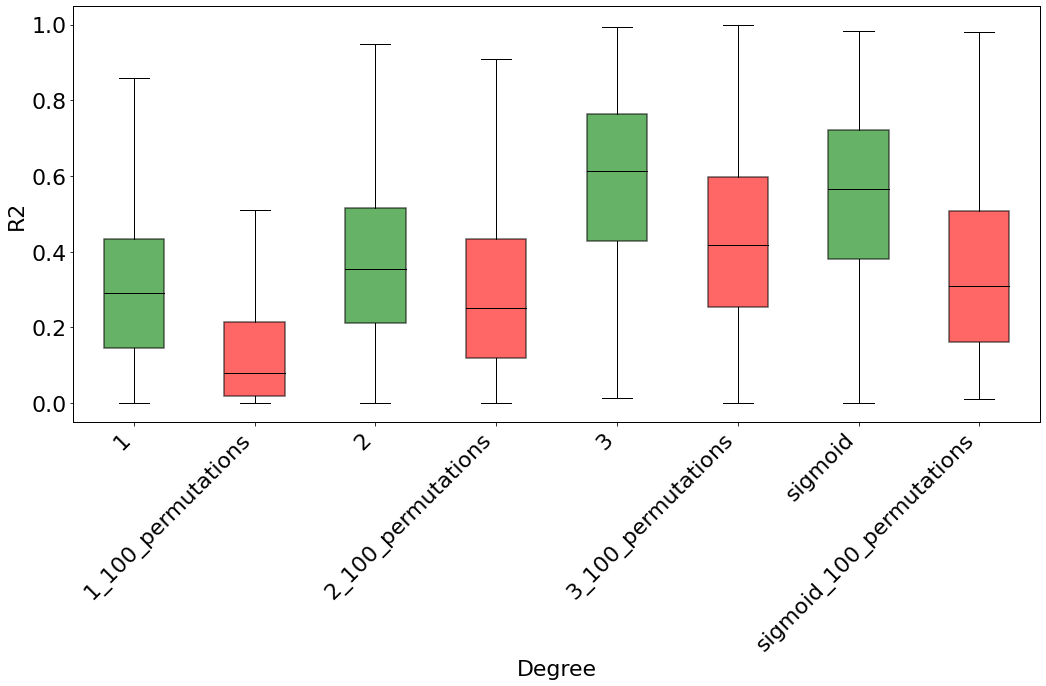

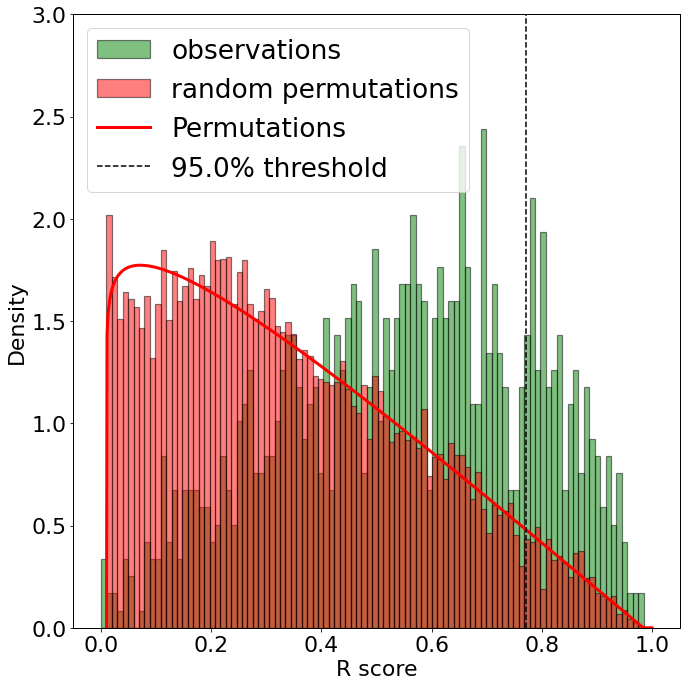

/home/ieo5417/.local/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:639: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


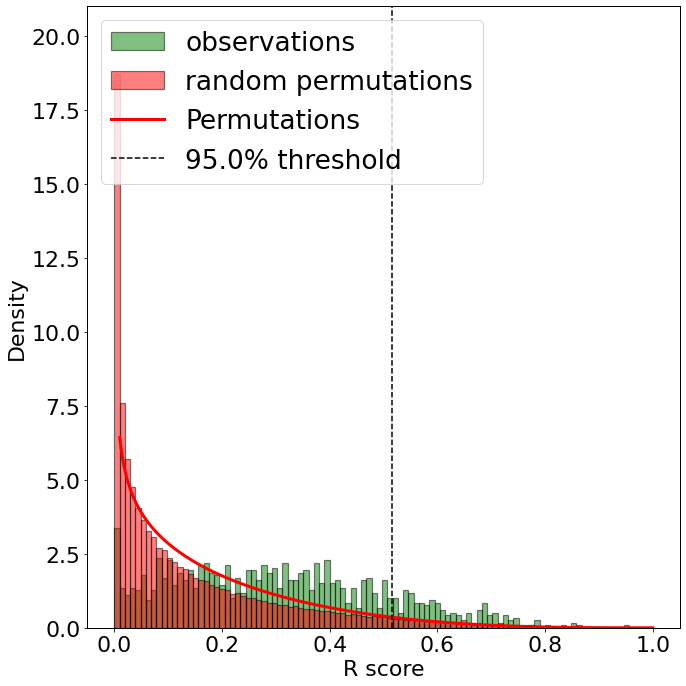

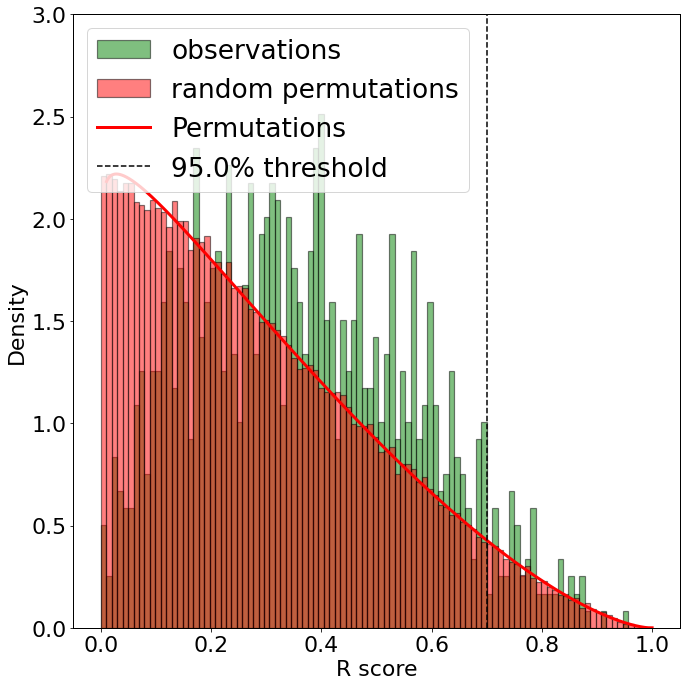

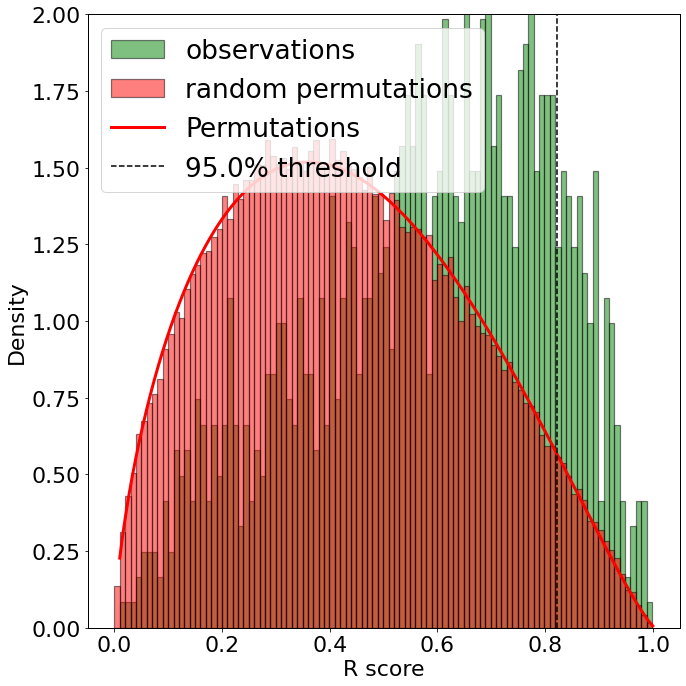

In [57]:
models_pvalue_mut=pa_mutations.plot_gof(poly_obs_scores_mut, sig_obs_scores_mut, poly_perm_scores_mut, sig_perm_scores_mut, dist_perm=True)

In [58]:
models_pvalue_mut

{'sigmoidal': [12299880.0, 3.660696705729165e-163, 0.7719861737520106],
 1: [110699491.0, 1.6022984665364532e-205, 0.5151958560603309],
 2: [90239233.0, 7.983572969412103e-44, 0.6996391999979434],
 3: [100500307.0, 9.536620693832115e-110, 0.8226322904075013]}

## Cluster genes

In [59]:
genes_clusters_mut=pa_mutations.cluster_genes(scores_mut)

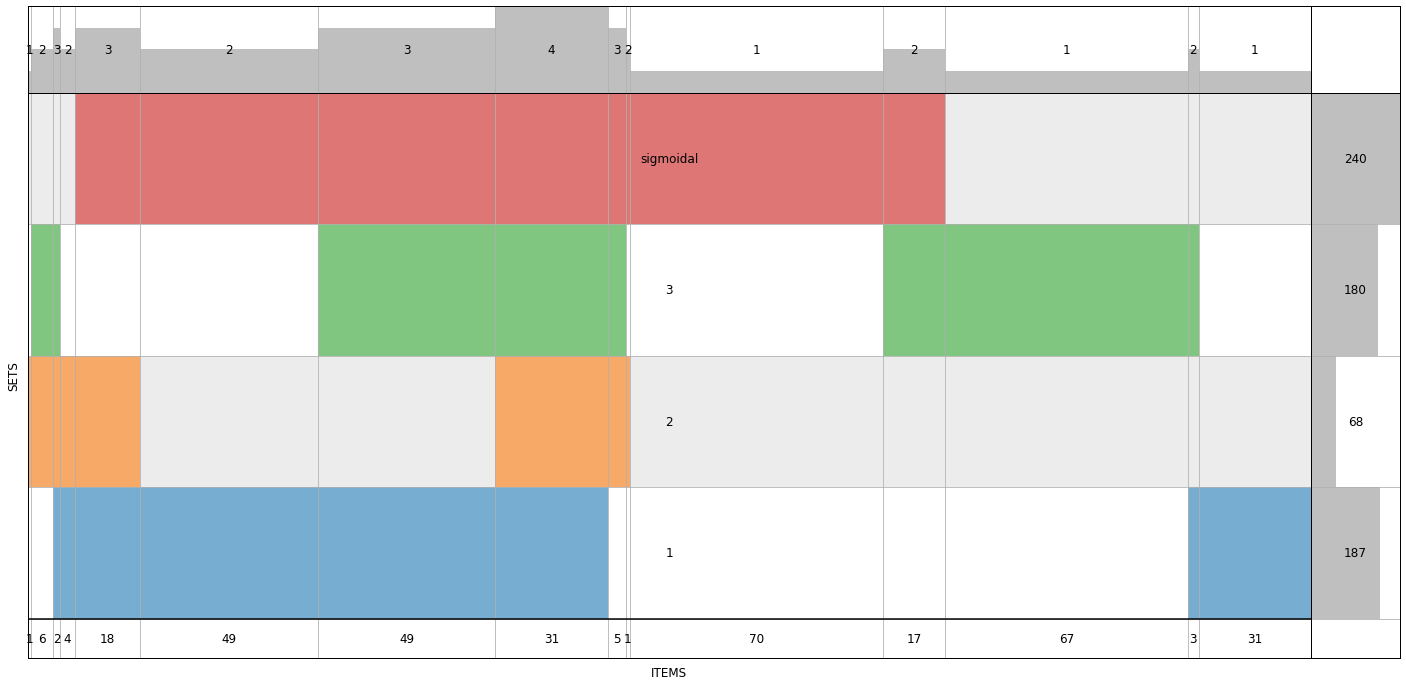

In [60]:
pa_mutations.plot_clusters(genes_clusters_mut)

In [61]:
summary_mut=pa_mutations.get_summary_table(genes_clusters_mut, scores_mut)

In [62]:
continuum_mut, sigmoid_mut, discarded_mut = pa_mutations.classify_genes(summary_mut)

/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:799: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cont.loc[index] = row


## Plot distribution of inflexion points for sigmoid genes

<lambdifygenerated-5>:3: RuntimeWarning: overflow encountered in double_scalars
  return (c*k*exp(-k*(x - x0))/(1 + exp(-k*(x - x0)))**2)
<lambdifygenerated-5>:3: RuntimeWarning: invalid value encountered in double_scalars
  return (c*k*exp(-k*(x - x0))/(1 + exp(-k*(x - x0)))**2)
<lambdifygenerated-5>:3: RuntimeWarning: overflow encountered in exp
  return (c*k*exp(-k*(x - x0))/(1 + exp(-k*(x - x0)))**2)


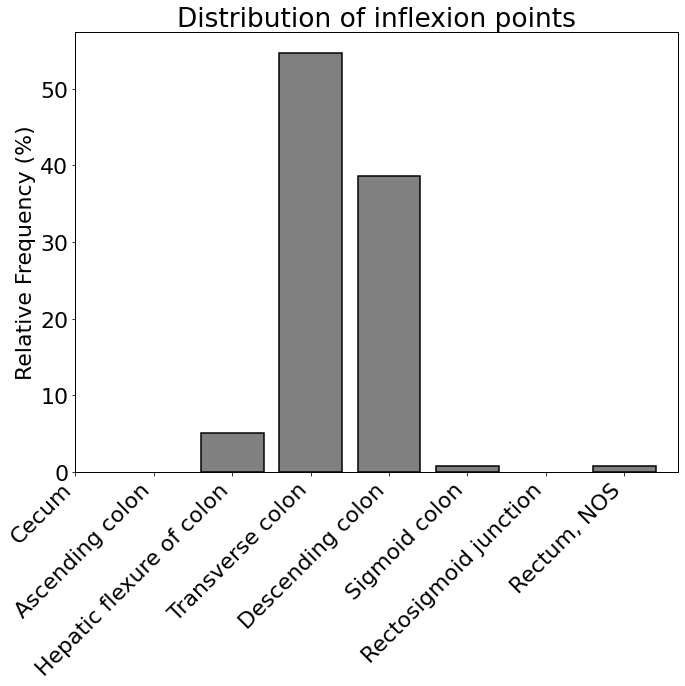

In [63]:
gene_list_mut, section_l_mut = pa_mutations.strict_sig_list(sigmoid_mut, sig_models_mut, plot_dist = True)

## Plot distribution of inflexion points for random permutation

<lambdifygenerated-6>:3: RuntimeWarning: overflow encountered in double_scalars
  return (c*k*exp(-k*(x - x0))/(1 + exp(-k*(x - x0)))**2)


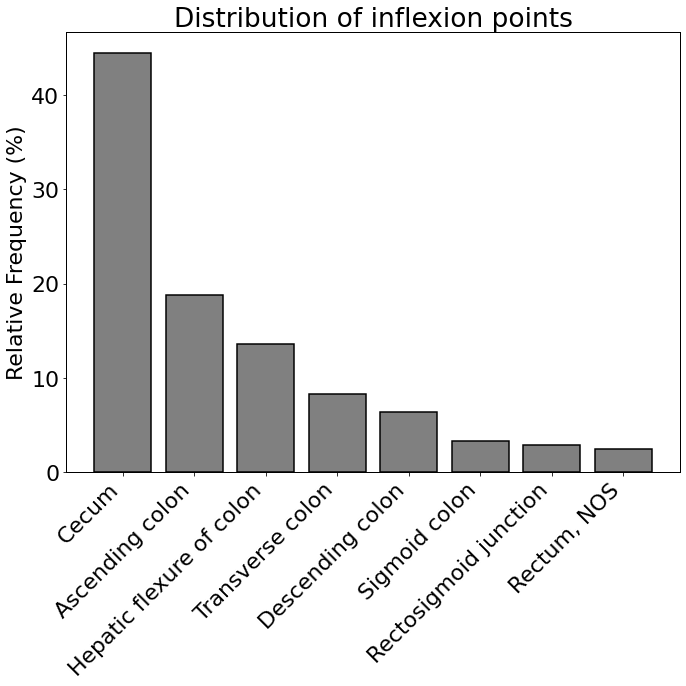

In [64]:
import random
pa_mutations.random_model_inflexion(sig_perm_models_mut)

# ANEUPLOIDY PROFILING

## Duplication

In [65]:
# Create workflow class, specifying the path to the SETTINGS.ini file
pa_duplication = ProfileAnalysis('../../../docker/analysis/aneuploidy/duplication')

Project has been created!


/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:153: UserWarning: Folder input_data already exist...skipping
  warnings.warn("Folder input_data already exist...skipping",
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:159: UserWarning: Folder data_raw already exist...skipping
  warnings.warn("Folder data_raw already exist...skipping",
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:165: UserWarning: Folder data_clinical already exist...skipping
  warnings.warn("Folder data_clinical already exist...skipping",
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:171: UserWarning: Folder sample_by_section already exist...skipping
  warnings.warn("Folder sample_by_section already exist...skipping",
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_anal

## Assign each sample in clinical data file to a colon section

In [66]:
pa_duplication.create_samples_to_sections_table()

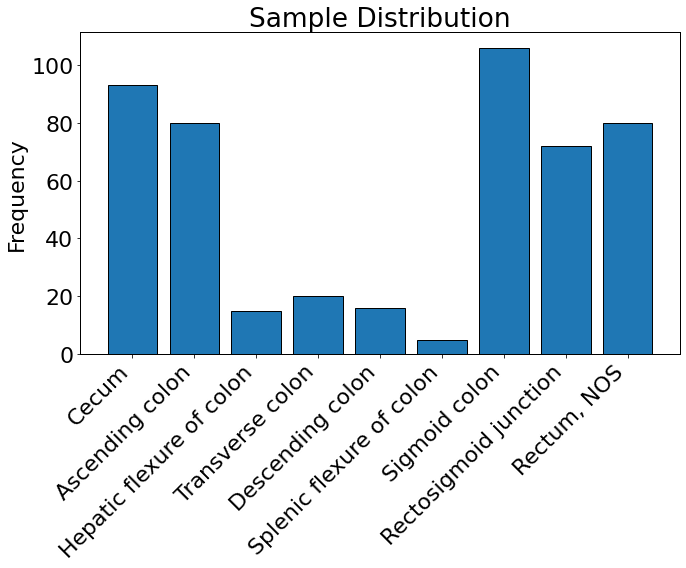

In [67]:
pa_duplication.plot_sample_distribution()

## Calculate median value for each colon section

In [68]:
medians_dup, mad_dup = pa_duplication.median_by_section()

This step has already been executed...loading results...
This step has already been executed...loading results...


/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:386: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  medians = medians.append(res[0])
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:387: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mad = mad.append(res[1])
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:386: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  medians = medians.append(res[0])
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:387: FutureWarning: The frame.append method is deprecated

In [69]:
medians_dup=medians_dup[(medians_dup==0).sum(axis=1)<4]

## Fit Observables

In [70]:
scores_dup, poly_obs_scores_dup, sig_obs_scores_dup, poly_models_dup, sig_models_dup = pa_duplication.fit_data(medians_dup, guess_bounds = True)

This step has already been executed...loading results...
This step has already been executed...loading results...
This step has already been executed...loading results...
This step has already been executed...loading results...


In [71]:
scores_dup.head()

1         2         3  sigmoidal
1q  0.034458  0.119433  0.119806   0.213968
2p  0.163104  0.386431  0.631928   0.511266
2q  0.302429  0.445258  0.742929   0.613250
3p  0.485325  0.589933  0.783456   0.822843
3q  0.439867  0.440998  0.811643   0.676527

## Fit Random permutated data

In [72]:
poly_perm_scores_dup, sig_perm_scores_dup, sig_perm_models_dup=pa_duplication.fit_random_data(medians_dup, guess_bounds = True)

This step has already been executed...loading results...
This step has already been executed...loading results...


## Compare obrservable vs permutated data

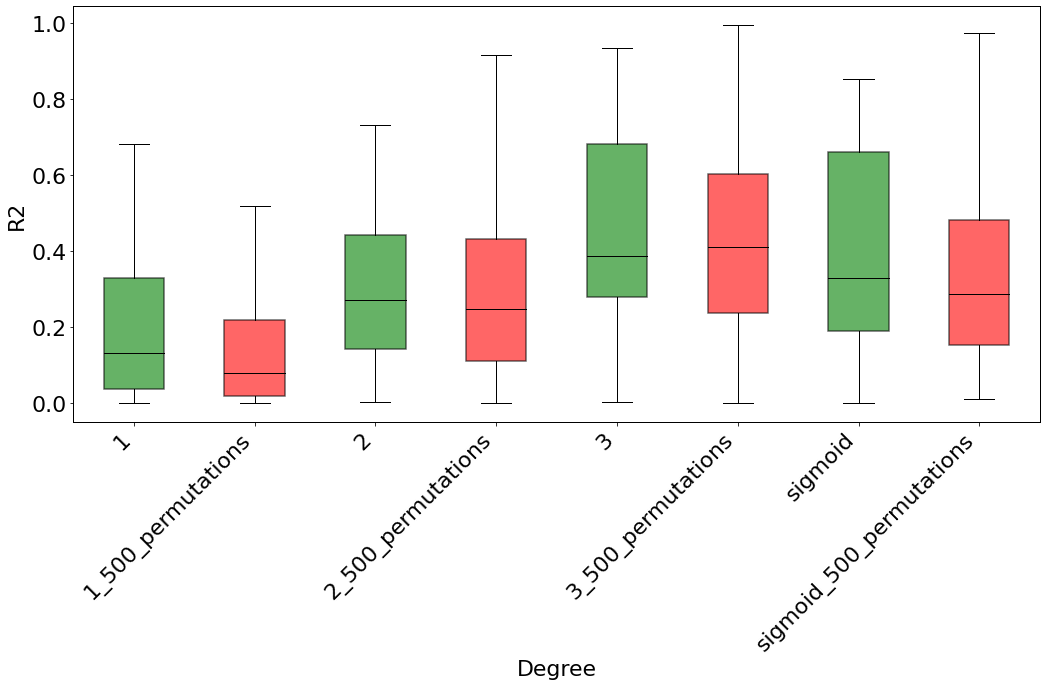

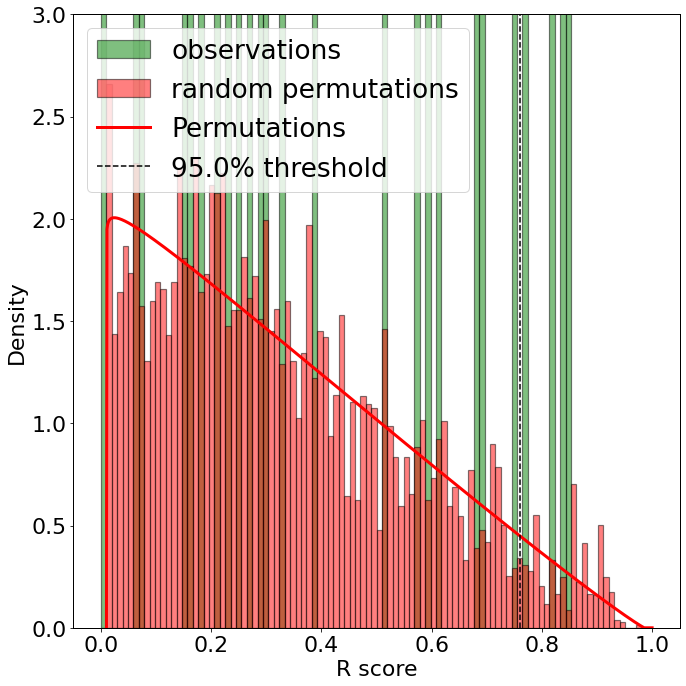

/home/ieo5417/.local/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:639: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


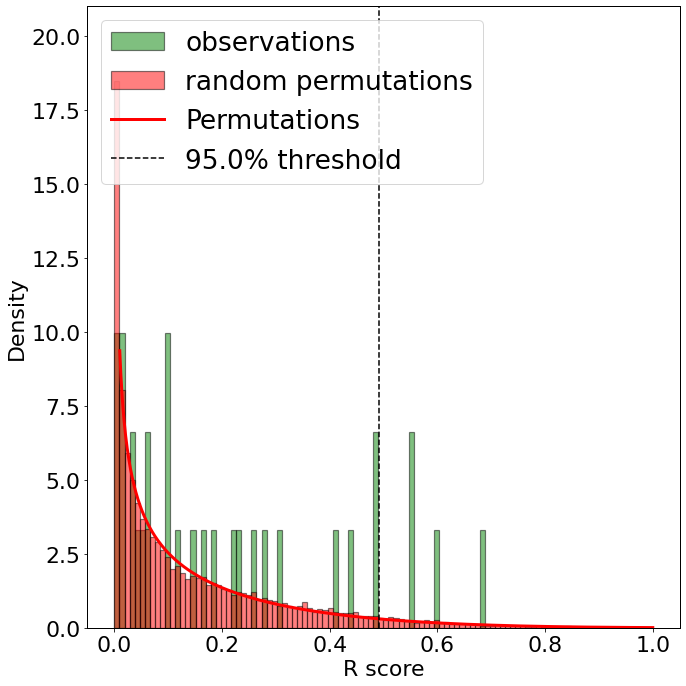

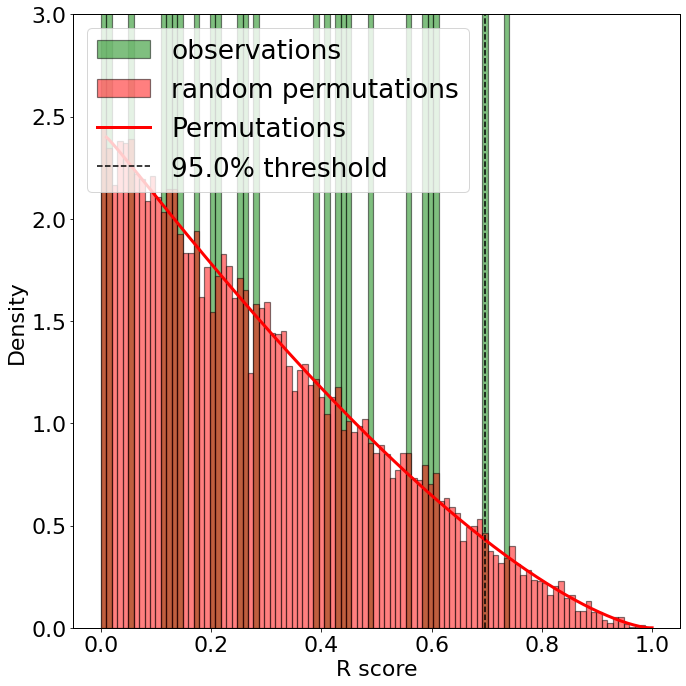

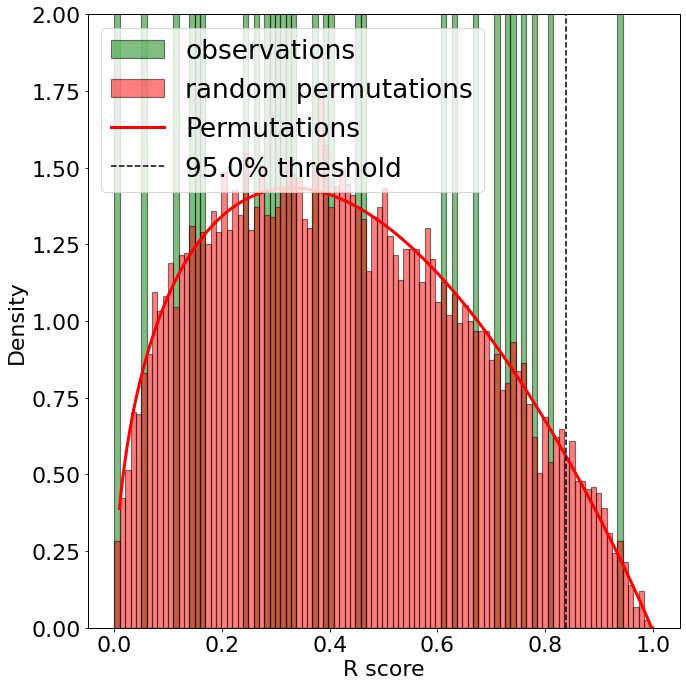

In [73]:
models_pvalue_dup=pa_duplication.plot_gof(poly_obs_scores_dup, sig_obs_scores_dup, poly_perm_scores_dup, sig_perm_scores_dup, dist_perm=True)

In [74]:
models_pvalue_dup

{'sigmoidal': [238814.0, 0.10377183028996045, 0.7599096877653357],
 1: [304110.0, 0.03292728212893891, 0.4918106539579493],
 2: [282390.0, 0.1564938677472315, 0.6973981362585313],
 3: [264577.0, 0.3714888066400217, 0.8390480220630643]}

## Cluster genes

In [75]:
genes_clusters_dup=pa_duplication.cluster_genes(scores_dup)

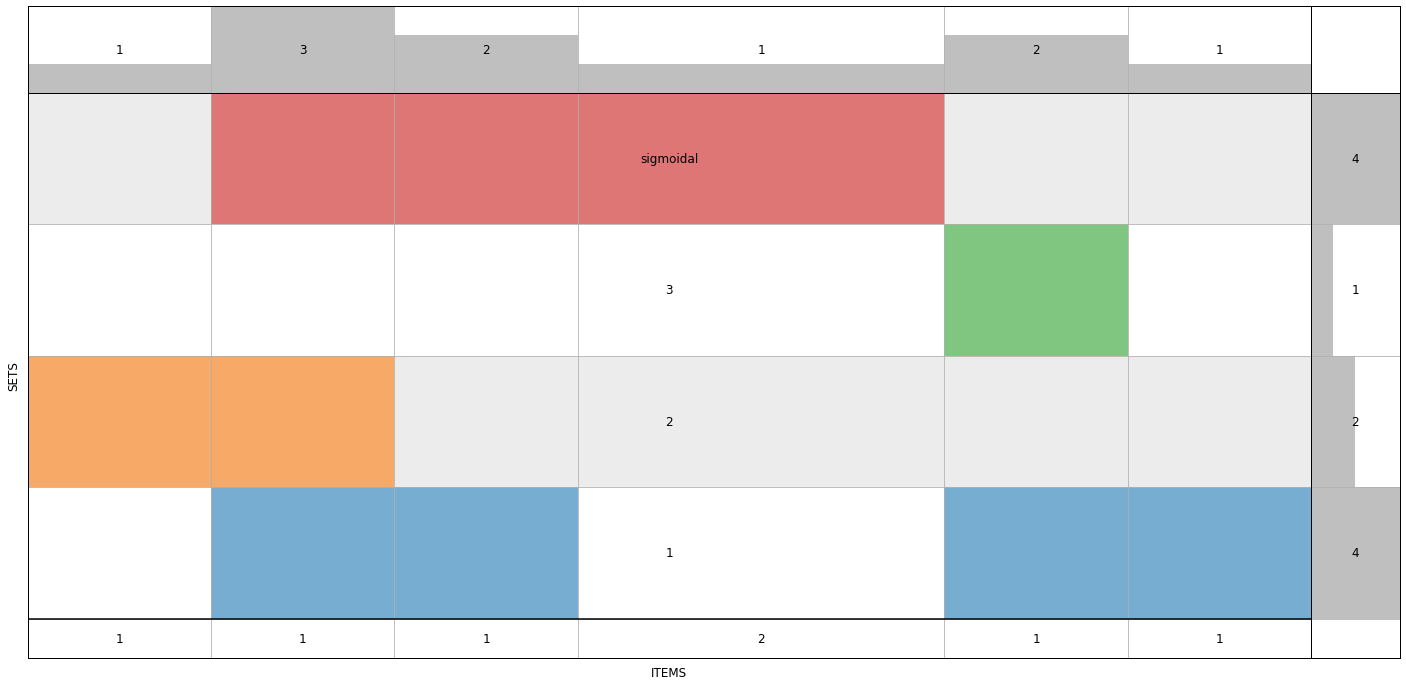

In [76]:
pa_duplication.plot_clusters(genes_clusters_dup)

In [77]:
summary_dup=pa_duplication.get_summary_table(genes_clusters_dup, scores_dup)

In [78]:
continuum_dup, sigmoid_dup, discarded_dup = pa_duplication.classify_genes(summary_dup)

In [79]:
continuum_dup

model     score
12q     1  0.548308
13q     1  0.550598
20q     1  0.602197
8p      1  0.681389

In [80]:
sigmoid_dup

Empty DataFrame
Columns: []
Index: []

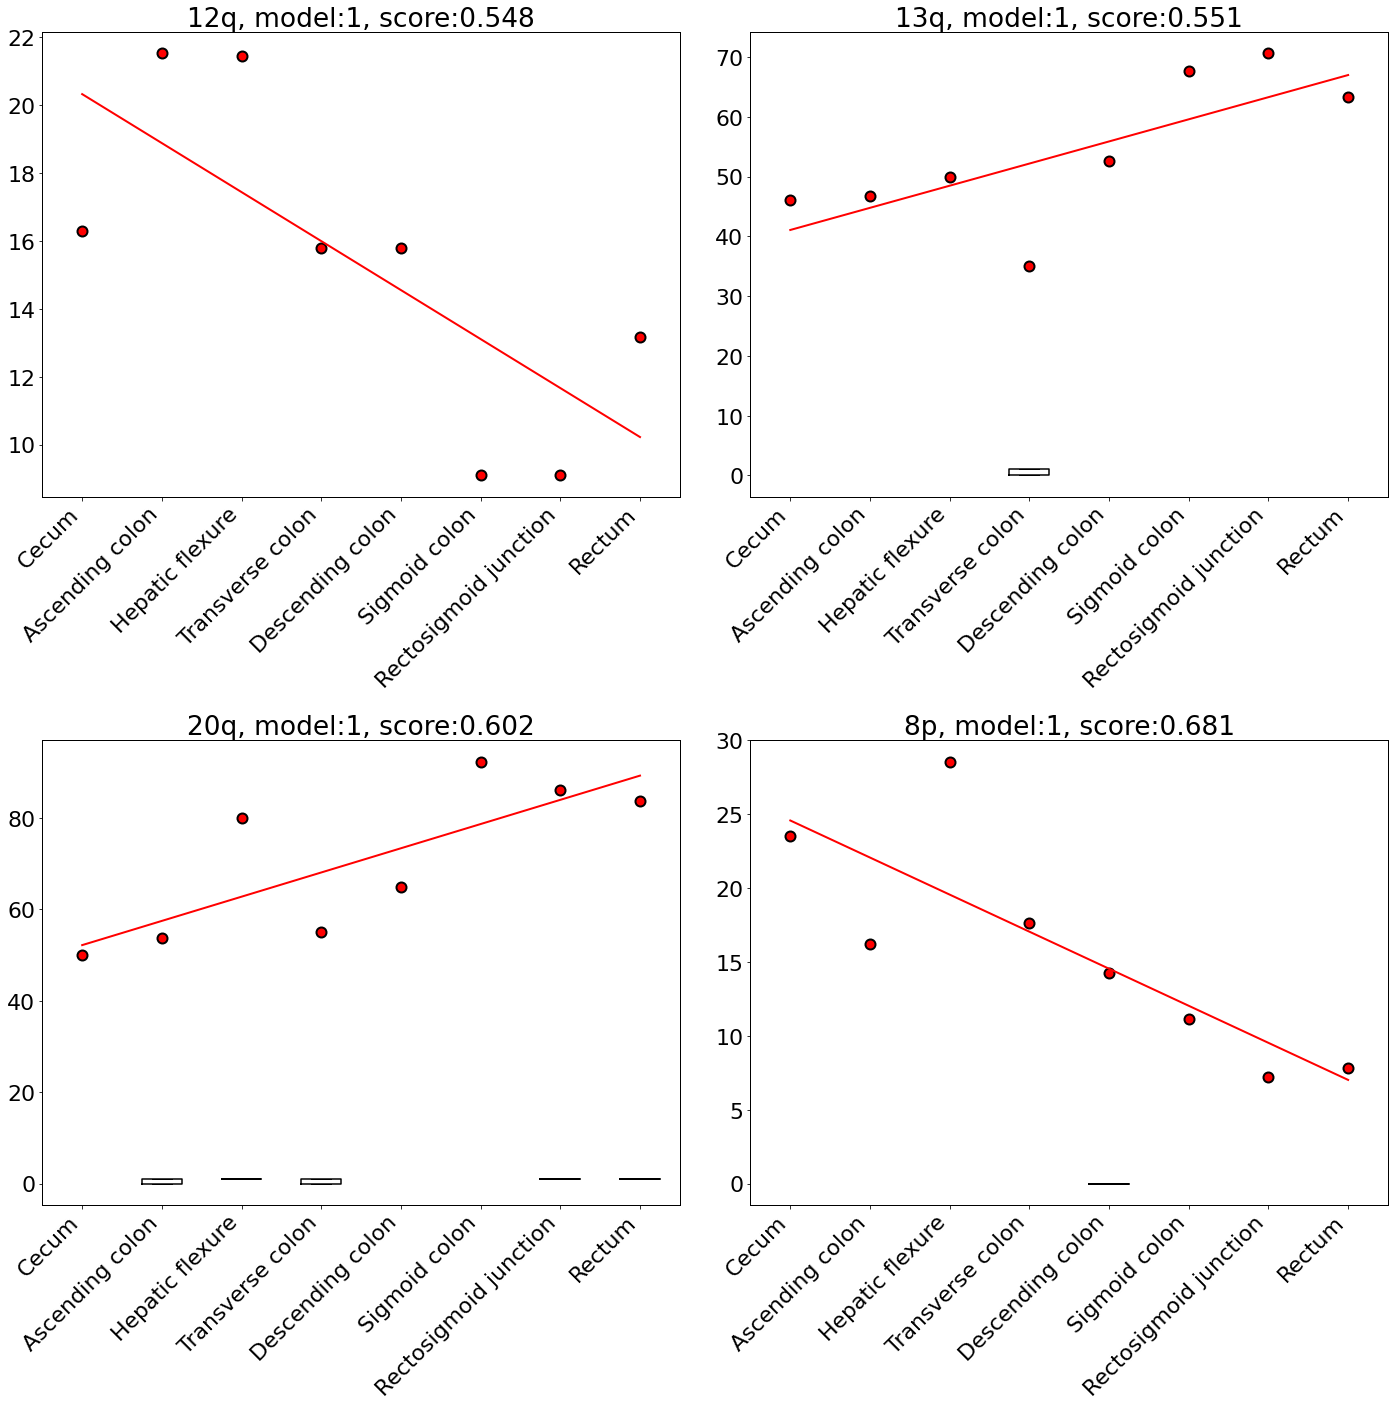

In [81]:
pa_duplication.plot_fitting(continuum_dup, continuum_dup.index, medians_dup, poly_models_dup, sig_models_dup, 'continuum')

## Deletion

In [82]:
# Create workflow class, specifying the path to the SETTINGS.ini file
pa_deletion = ProfileAnalysis('../../../docker/analysis/aneuploidy/deletion')

Project has been created!


/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:153: UserWarning: Folder input_data already exist...skipping
  warnings.warn("Folder input_data already exist...skipping",
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:159: UserWarning: Folder data_raw already exist...skipping
  warnings.warn("Folder data_raw already exist...skipping",
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:165: UserWarning: Folder data_clinical already exist...skipping
  warnings.warn("Folder data_clinical already exist...skipping",
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:171: UserWarning: Folder sample_by_section already exist...skipping
  warnings.warn("Folder sample_by_section already exist...skipping",
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_anal

## Assign each sample in clinical data file to a colon section

In [83]:
pa_deletion.create_samples_to_sections_table()

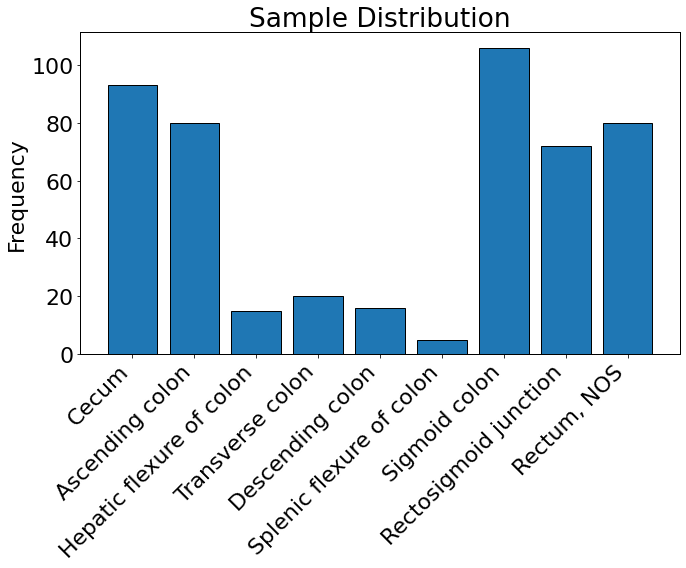

In [84]:
pa_deletion.plot_sample_distribution()

## Calculate median value for each colon section

In [85]:
medians_del, mad_del = pa_deletion.median_by_section()

This step has already been executed...loading results...
This step has already been executed...loading results...


/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:386: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  medians = medians.append(res[0])
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:387: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mad = mad.append(res[1])
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:386: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  medians = medians.append(res[0])
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:387: FutureWarning: The frame.append method is deprecated

In [86]:
medians_del = medians_del[(medians_del==0).sum(axis=1)<4]

In [87]:
medians_del.head()

Cecum  Ascending colon  Hepatic flexure of colon  Transverse colon  \
1p  18.750000        27.027027                 27.272727         11.111111   
1q   6.818182         6.493506                 20.000000          0.000000   
2p   2.272727         6.410256                  6.666667          5.263158   
2q   2.298851         6.250000                  6.666667          5.555556   
3p   6.976744        16.216216                 21.428571          5.263158   

    Descending colon  Sigmoid colon  Rectosigmoid junction  Rectum, NOS  
1p         37.500000      36.363636              44.000000    34.375000  
1q          5.555556      12.500000              11.940299     9.459459  
2p          0.000000       4.950495               9.230769     5.263158  
2q          0.000000       3.030303               5.633803     1.388889  
3p          9.523810      13.592233              15.384615    16.216216

## Fit Observables

In [88]:
scores_del, poly_obs_scores_del, sig_obs_scores_del, poly_models_del, sig_models_del = pa_deletion.fit_data(medians_del, guess_bounds = True)

This step has already been executed...loading results...
This step has already been executed...loading results...
This step has already been executed...loading results...
This step has already been executed...loading results...


In [89]:
scores_del.head()

1         2         3  sigmoidal
1p  0.451669  0.452256  0.517702   0.715306
1q  0.020045  0.021264  0.032566   0.094810
2p  0.065330  0.070955  0.153196   0.154680
2q  0.091392  0.141403  0.271987   0.328281
3p  0.049228  0.055692  0.281929   0.108006

## Fit Random permutated data

In [90]:
poly_perm_scores_del, sig_perm_scores_del, sig_perm_models_del = pa_deletion.fit_random_data(medians_del, guess_bounds = True)

This step has already been executed...loading results...
This step has already been executed...loading results...
This step has already been executed...loading results...


## Compare obrservable vs permutated data

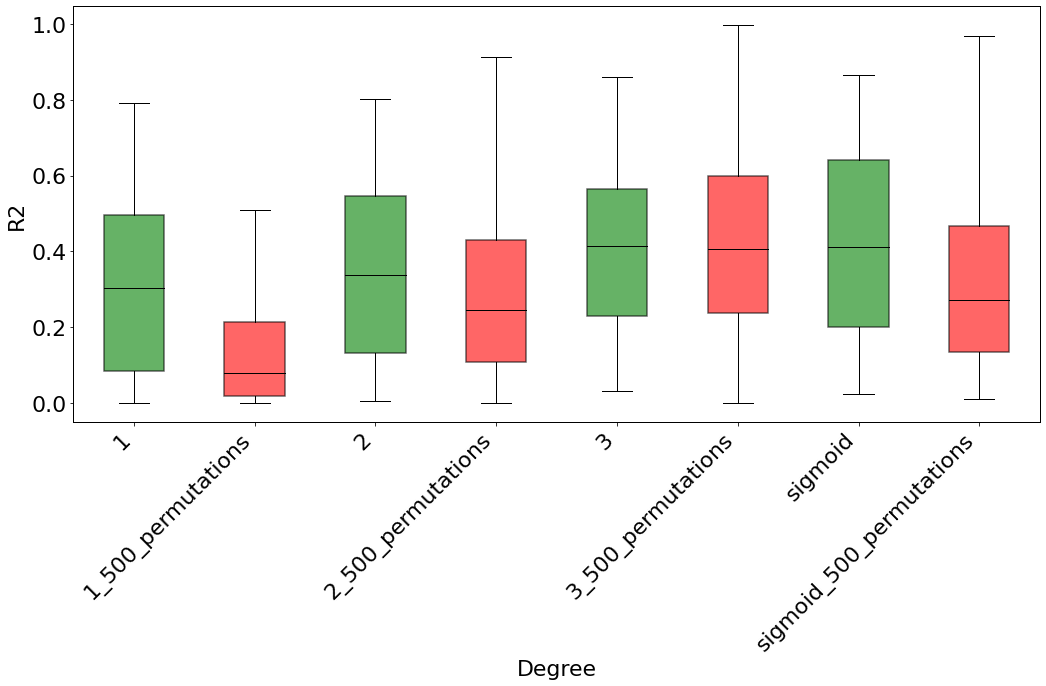

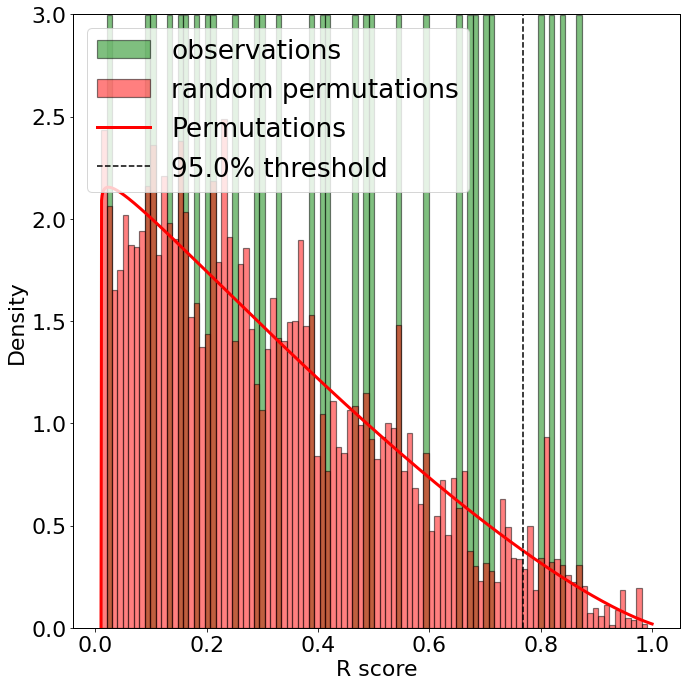

/home/ieo5417/.local/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:639: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


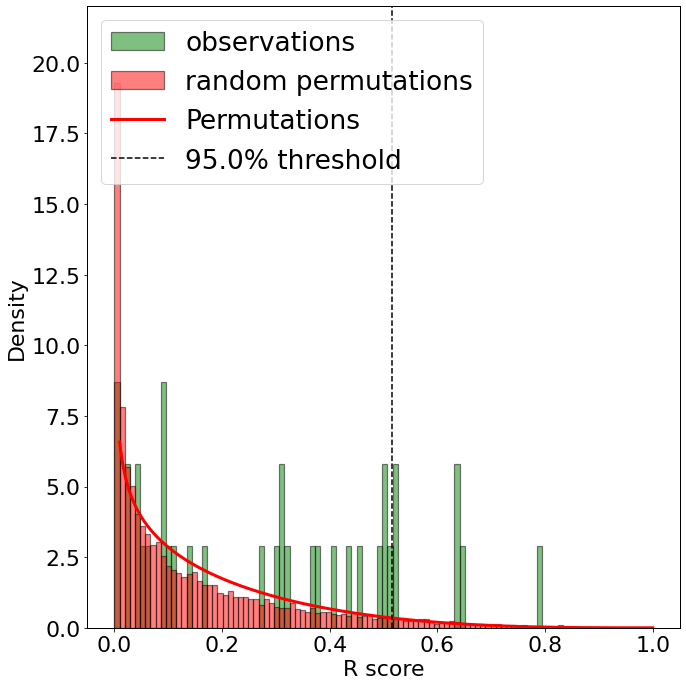

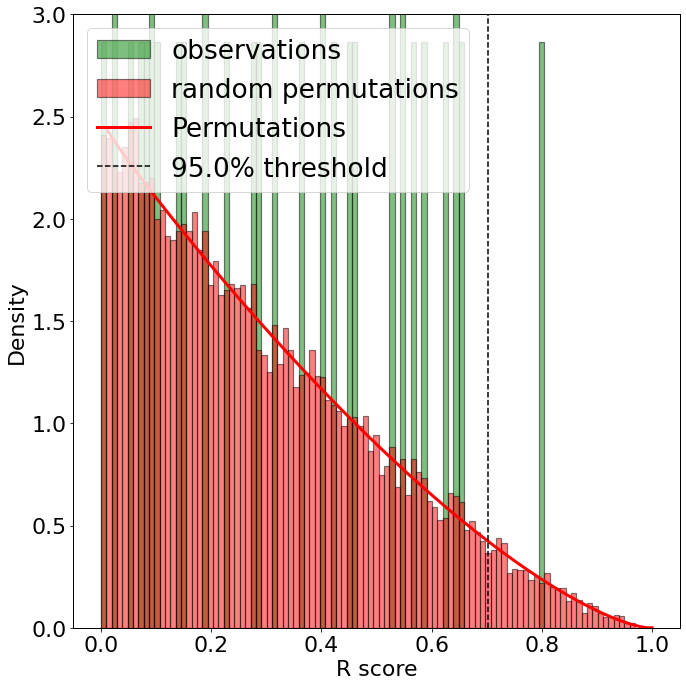

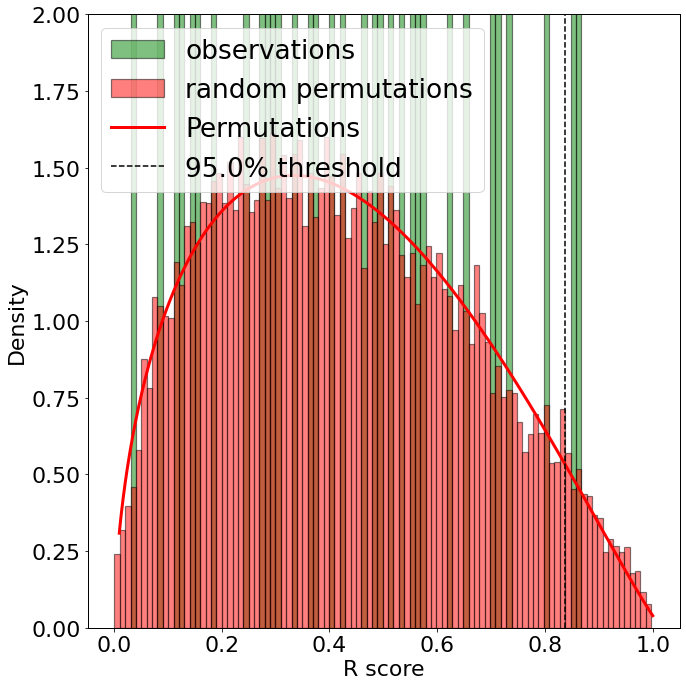

In [91]:
models_pvalue_del = pa_deletion.plot_gof(poly_obs_scores_del, sig_obs_scores_del, poly_perm_scores_del, sig_perm_scores_del, dist_perm=True)

In [92]:
models_pvalue_del

{'sigmoidal': [331090.5, 0.005209865571153239, 0.7687911349814885],
 1: [447565.0, 3.759022809708133e-05, 0.5159093252883007],
 2: [370621.0, 0.06761150503601553, 0.7029154615559993],
 3: [320674.0, 0.5424420982380677, 0.8371783200558296]}

In [93]:
genes_clusters_del=pa_deletion.cluster_genes(scores_del)

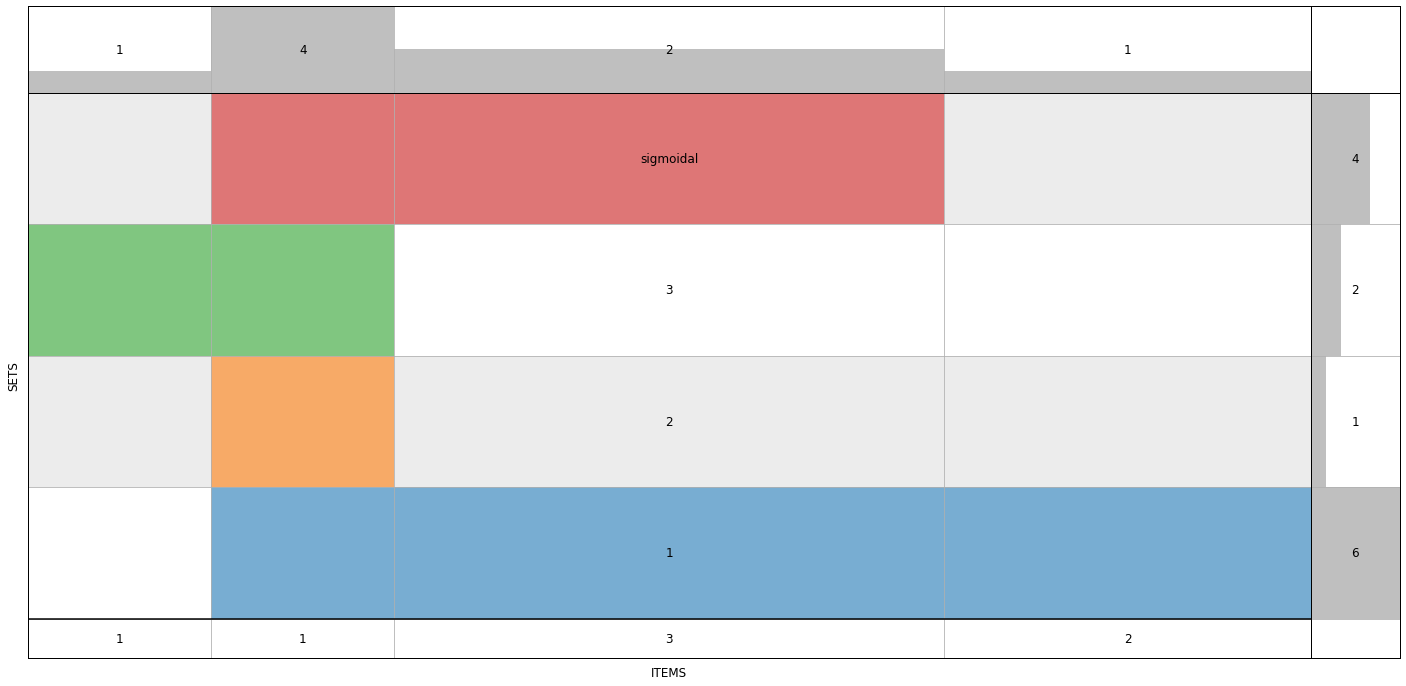

In [94]:
pa_deletion.plot_clusters(genes_clusters_del)

In [95]:
summary_del=pa_deletion.get_summary_table(genes_clusters_del, scores_del)

In [96]:
continuum_del, sigmoid_del, discarded_del = pa_deletion.classify_genes(summary_del)

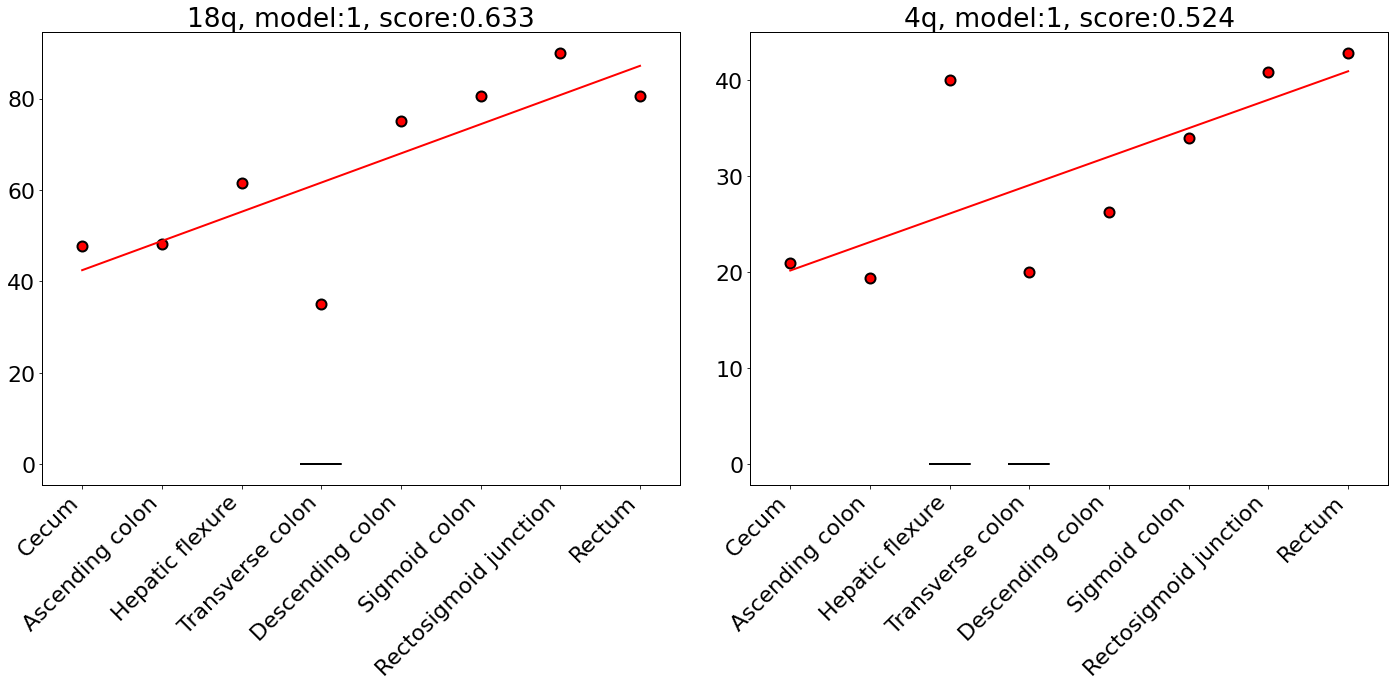

In [97]:
pa_duplication.plot_fitting(continuum_del, continuum_del.index, medians_del, poly_models_del, sig_models_del, 'continuum')

/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:424: RuntimeWarning: overflow encountered in exp
  return c / (1 + np.exp(-k*(x-x0))) + y0


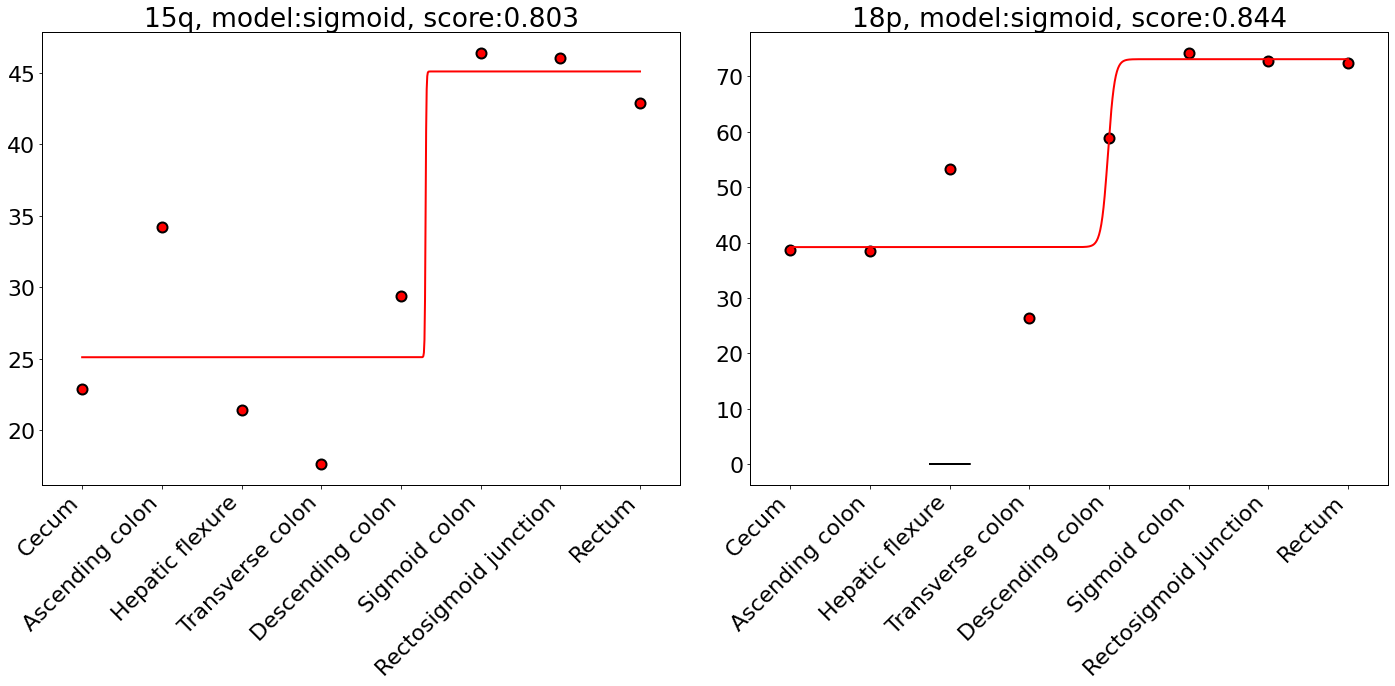

In [98]:
pa_duplication.plot_fitting(sigmoid_del, sigmoid_del.index, medians_del, poly_models_del, sig_models_del, 'sigmoid')

# CMS PROFILING

In [3]:
# Create workflow class, specifying the path to the SETTINGS.ini file
pa_cms = ProfileAnalysis('../../../docker/analysis/cms')

Project has been created!


/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:153: UserWarning: Folder input_data already exist...skipping
  warnings.warn("Folder input_data already exist...skipping",
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:159: UserWarning: Folder data_raw already exist...skipping
  warnings.warn("Folder data_raw already exist...skipping",
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:165: UserWarning: Folder data_clinical already exist...skipping
  warnings.warn("Folder data_clinical already exist...skipping",
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:171: UserWarning: Folder sample_by_section already exist...skipping
  warnings.warn("Folder sample_by_section already exist...skipping",
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_anal

## Assign each sample in clinical data file to a colon section

In [4]:
pa_cms.create_samples_to_sections_table()

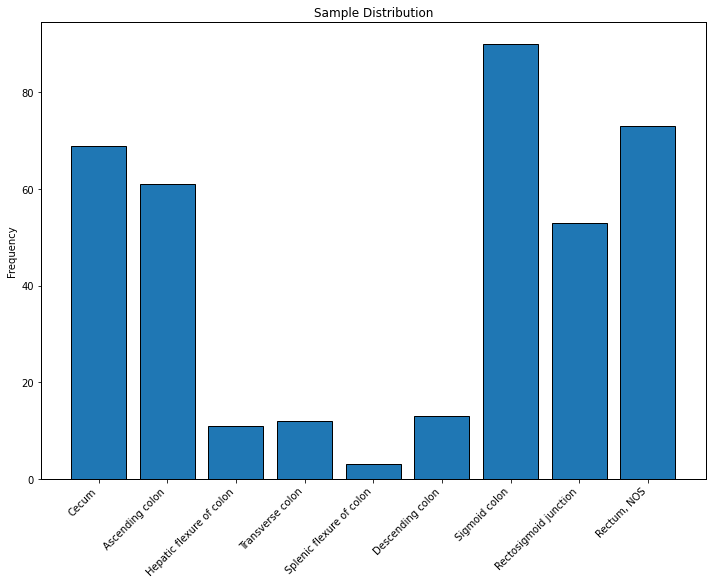

In [5]:
pa_cms.plot_sample_distribution()

## Calculate median value for each colon section

In [6]:
medians_cms, mad_cms = pa_cms.median_by_section()

In [8]:
medians_cms

Cecum  Ascending colon  Hepatic flexure of colon  Transverse colon  \
CMS1  26.086957        45.901639                 27.272727         25.000000   
CMS2  24.637681        24.590164                 54.545455         33.333333   
CMS3  26.086957        11.475410                 18.181818         16.666667   
CMS4  23.188406        18.032787                  0.000000         25.000000   

      Splenic flexure of colon  Descending colon  Sigmoid colon  \
CMS1                  0.000000          0.000000       3.333333   
CMS2                 33.333333         46.153846      58.888889   
CMS3                 33.333333         30.769231       8.888889   
CMS4                 33.333333         23.076923      28.888889   

      Rectosigmoid junction  Rectum, NOS  
CMS1               1.886792     4.109589  
CMS2              56.603774    60.273973  
CMS3              11.320755    12.328767  
CMS4              30.188679    23.287671

## Fit Observables

In [104]:
scores_cms, poly_obs_scores_cms, sig_obs_scores_cms, poly_models_cms, sig_models_cms = pa_cms.fit_data(medians_cms, guess_bounds = True)

This step has already been executed...loading results...
This step has already been executed...loading results...
This step has already been executed...loading results...
This step has already been executed...loading results...


In [105]:
scores_cms.head()

1         2  sigmoidal
CMS1  0.648186  0.690770   0.881549
CMS2  0.648367  0.648454   0.329670
CMS3  0.090546  0.203044   0.428130
CMS4  0.190919  0.193710   0.489689

## Fit Random permutated data

In [106]:
poly_perm_scores_cms, sig_perm_scores_cms, sig_perm_models_cms=pa_cms.fit_random_data(medians_cms, guess_bounds = True)

This step has already been executed...loading results...
This step has already been executed...loading results...


## Compare obrservable vs permutated data

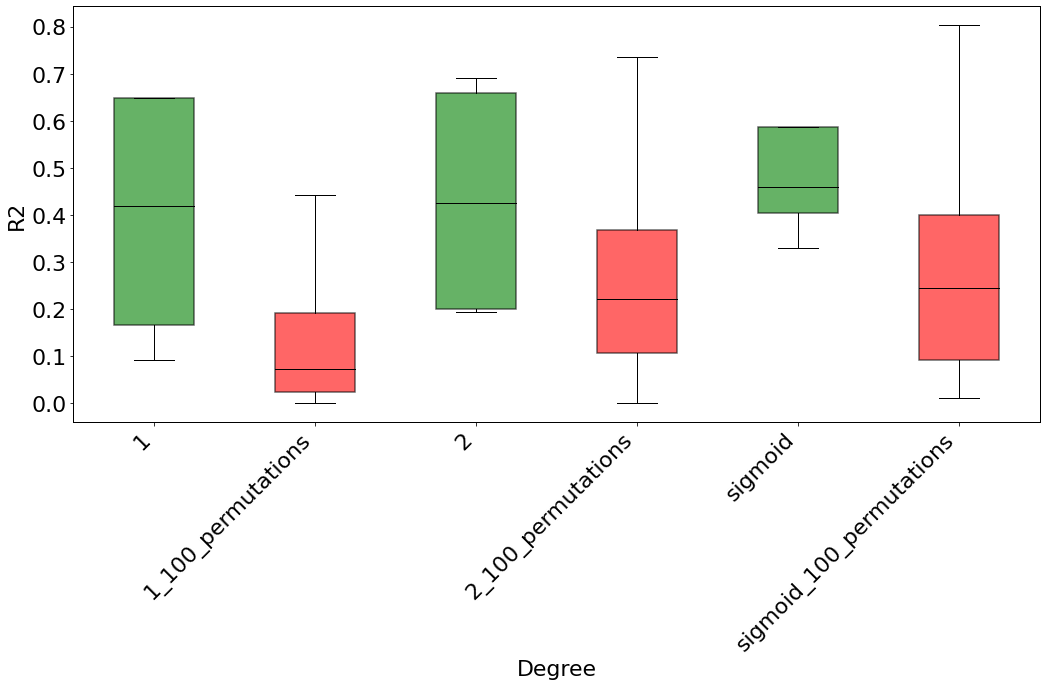

/home/ieo5417/.local/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:639: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


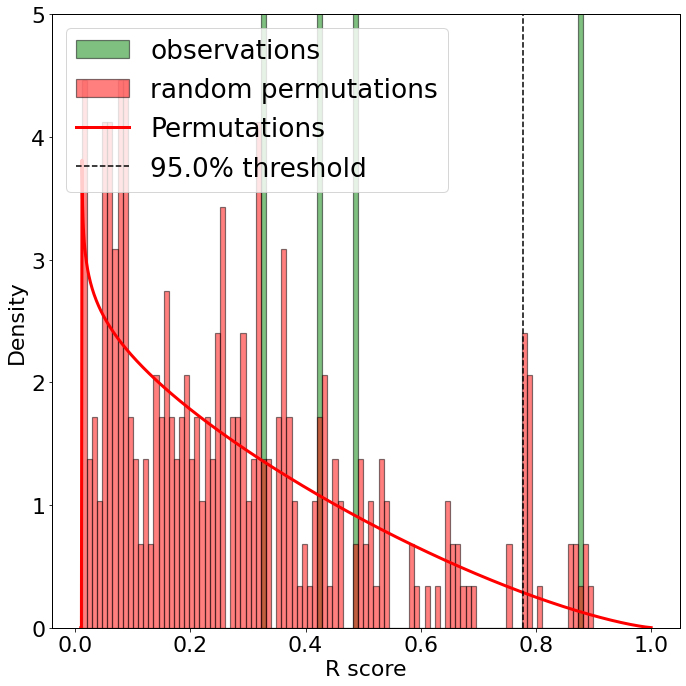

/home/ieo5417/.local/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


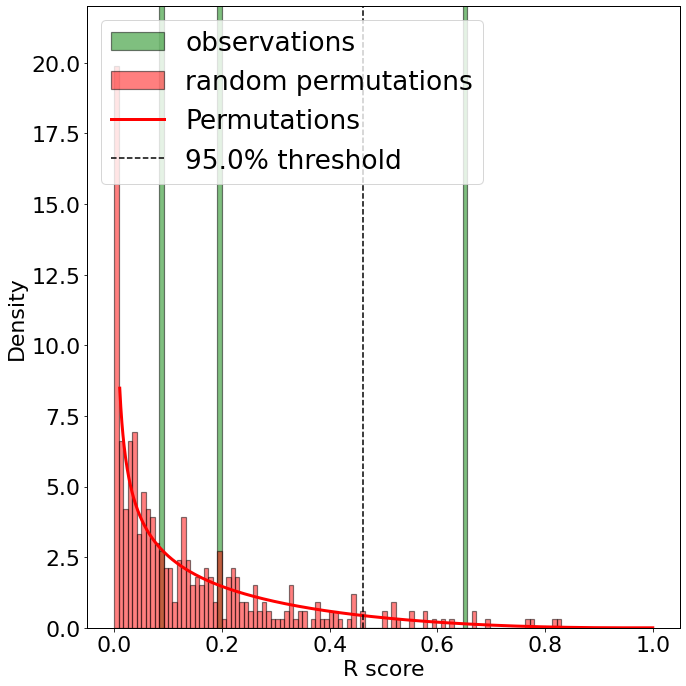

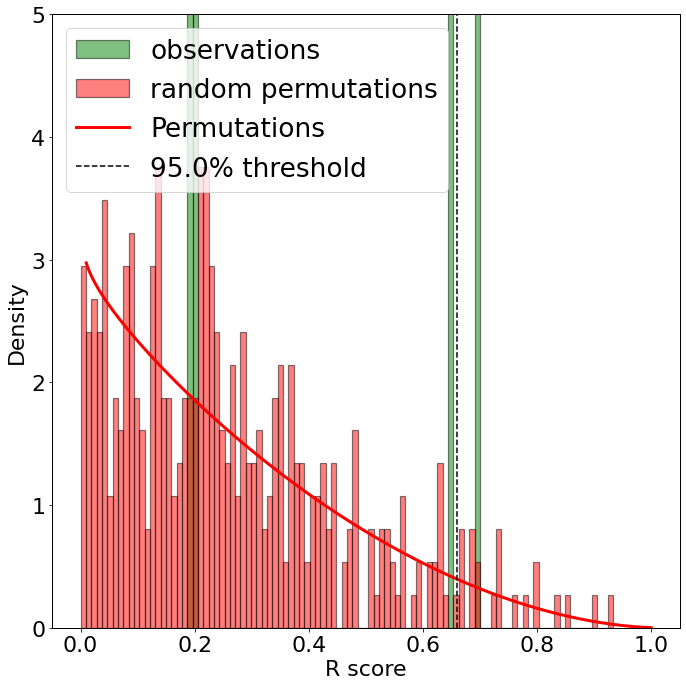

In [107]:
models_pvalue_cms=pa_cms.plot_gof(poly_obs_scores_cms, sig_obs_scores_cms, poly_perm_scores_cms, sig_perm_scores_cms, dist_perm=True)

In [108]:
models_pvalue_cms

{'sigmoidal': [1070.5, 0.015014325255136489, 0.7777123072346805],
 1: [1304.0, 0.013116177087270624, 0.46141789412958667],
 2: [1107.0, 0.09749256621334063, 0.6588870342757943]}

## Cluster genes

In [109]:
genes_clusters_cms=pa_cms.cluster_genes(scores_cms)

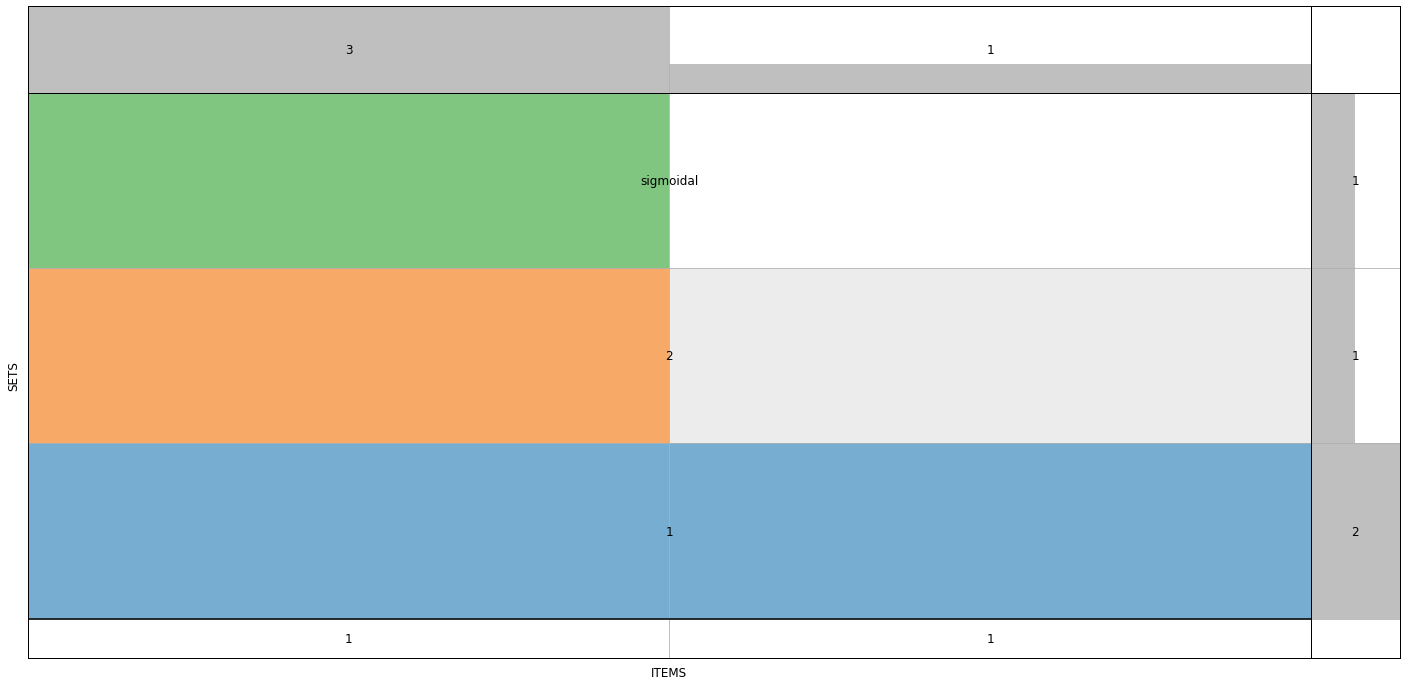

In [110]:
pa_cms.plot_clusters(genes_clusters_cms)

In [111]:
summary_cms=pa_cms.get_summary_table(genes_clusters_cms, scores_cms)

In [112]:
summary_cms

1   1_score  sigmoidal  sigmoidal_score
CMS2  True  0.648367      False         0.000000
CMS1  True  0.648186       True         0.881549

In [113]:
continuum_cms, sigmoid_cms, discarded_cms = pa_cms.classify_genes(summary_cms)

# MOLECULAR FEATURES PROFILING

In [114]:
# Create workflow class, specifying the path to the SETTINGS.ini file
pa_mf = ProfileAnalysis('../../../docker/analysis/molecular_features')

Project has been created!


/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:153: UserWarning: Folder input_data already exist...skipping
  warnings.warn("Folder input_data already exist...skipping",
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:159: UserWarning: Folder data_raw already exist...skipping
  warnings.warn("Folder data_raw already exist...skipping",
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:165: UserWarning: Folder data_clinical already exist...skipping
  warnings.warn("Folder data_clinical already exist...skipping",
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:171: UserWarning: Folder sample_by_section already exist...skipping
  warnings.warn("Folder sample_by_section already exist...skipping",
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_anal

## Calculate median value for each colon section

In [115]:
medians_mf, mad_tr = pa_mf.median_by_section()

This step has already been executed...loading results...
This step has already been executed...loading results...


In [116]:
medians_mf.head()

Cecum  Ascending_Colon  Hepatic_Flexure  Transverse_Colon  \
ensmbl_id                                                                  
MSI        46.987952        38.666667        33.333333         48.387097   
CIN        59.036145        54.666667        66.666667         41.935484   
CIMP       85.542169        80.000000        72.222222         70.967742   

           Splenic_Flexure  Descending_Colon  Sigmoid_Colon  \
ensmbl_id                                                     
MSI                   40.0         23.529412      22.222222   
CIN                   80.0         88.888889      85.321101   
CIMP                  20.0         55.555556      27.522936   

           Rectosigmoid_Junction     Rectum  
ensmbl_id                                    
MSI                    20.930233  12.328767  
CIN                    86.046512  86.301370  
CIMP                   30.232558  43.835616

In [117]:
medians_mf.drop('Splenic_Flexure', axis=1, inplace=True)

## Fit Observables

In [118]:
scores_mf, poly_obs_scores_mf, sig_obs_scores_mf, poly_models_mf, sig_models_mf = pa_mf.fit_data(medians_mf, guess_bounds = True)

This step has already been executed...loading results...
This step has already been executed...loading results...
This step has already been executed...loading results...
This step has already been executed...loading results...


## Fit Random permutated data

In [119]:
poly_perm_scores_mf, sig_perm_scores_mf, sig_perm_models_mf = pa_mf.fit_random_data(medians_mf, guess_bounds = True)

This step has already been executed...loading results...
This step has already been executed...loading results...


## Compare obrservable vs permutated data

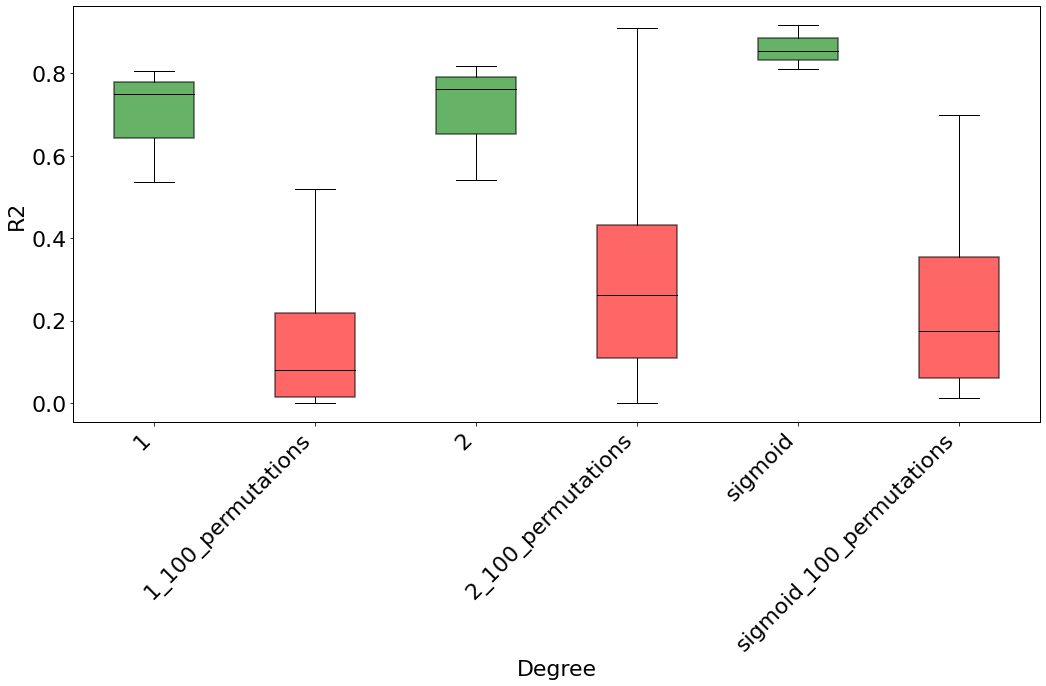

/home/ieo5417/.local/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:639: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


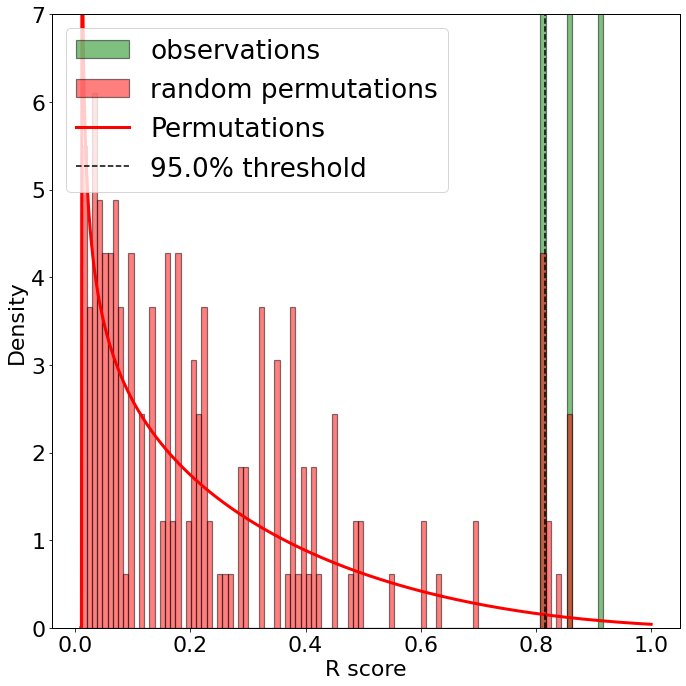

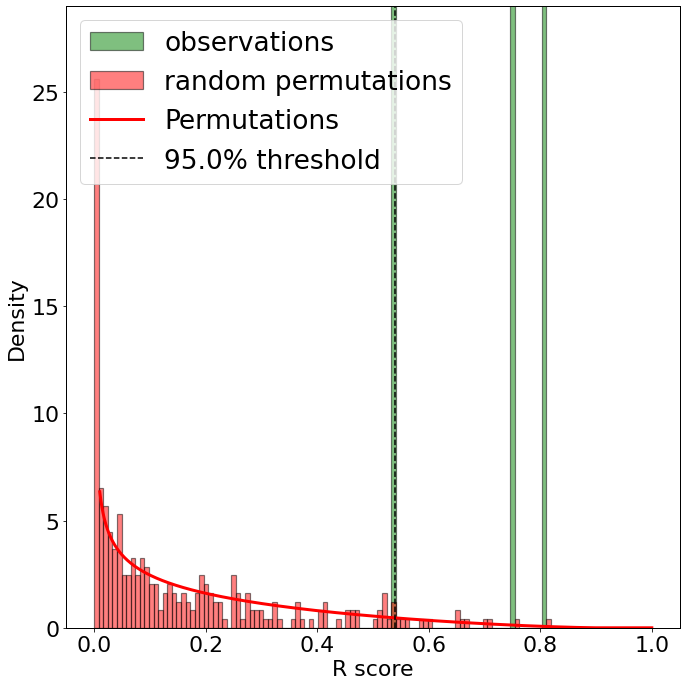

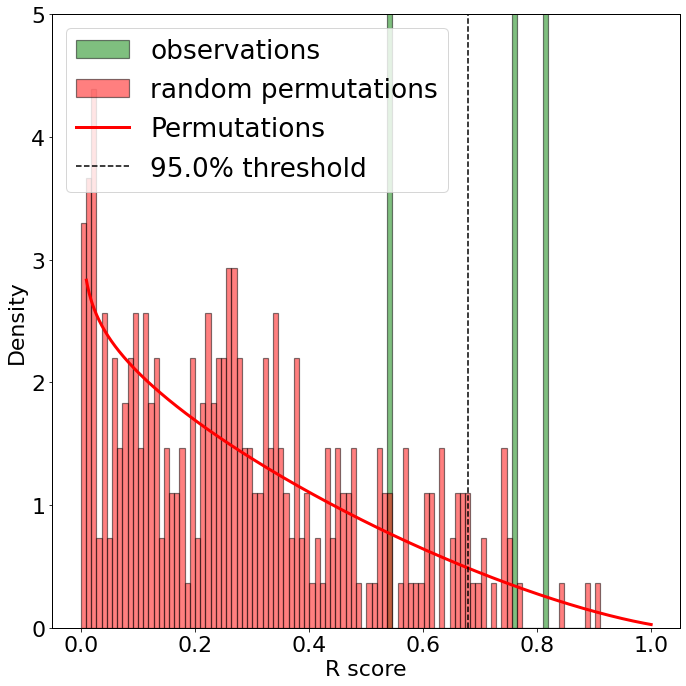

In [120]:
models_pvalue_mf = pa_mf.plot_gof(poly_obs_scores_mf, sig_obs_scores_mf, poly_perm_scores_mf, sig_perm_scores_mf, dist_perm=True)

In [121]:
models_pvalue_mf

{'sigmoidal': [529.0, 0.000143922364164702, 0.8162056026299567],
 1: [880.0, 7.798628094971606e-05, 0.539685665677024],
 2: [848.0, 0.0010332093031969363, 0.6782939398023872]}

## Cluster genes

In [122]:
genes_clusters_mf=pa_mf.cluster_genes(scores_mf)

In [123]:
scores_mf

1         2  sigmoidal
MSI   0.749549  0.762621   0.810191
CIN   0.535181  0.541250   0.854301
CIMP  0.805995  0.817937   0.916489

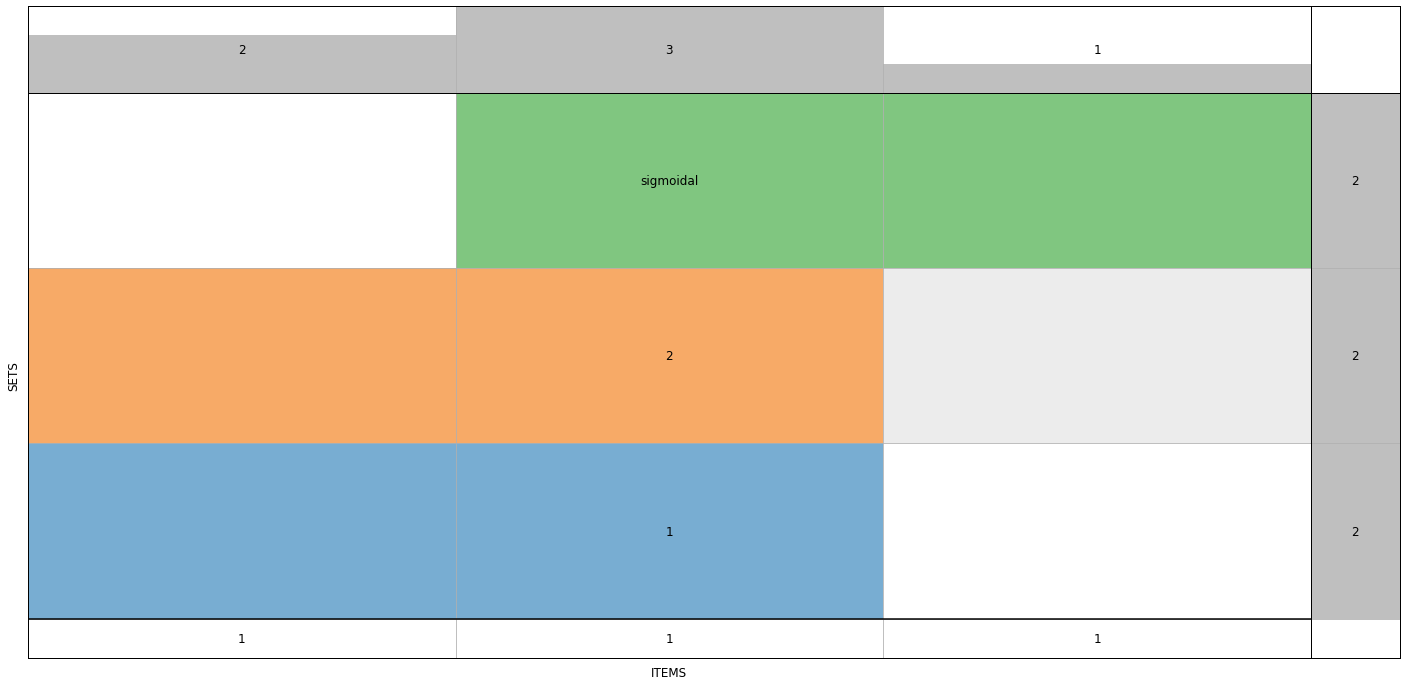

In [124]:
pa_mf.plot_clusters(genes_clusters_mf)

In [125]:
summary_mf=pa_mf.get_summary_table(genes_clusters_mf, scores_mf)

In [126]:
summary_mf

1   1_score      2   2_score  sigmoidal  sigmoidal_score
CIN   False  0.000000  False  0.000000       True         0.854301
CIMP   True  0.805995   True  0.817937       True         0.916489
MSI    True  0.749549   True  0.762621      False         0.000000

In [127]:
continuum_mf, sigmoid_mf, discarded_mf = pa_mf.classify_genes(summary_mf)

# SIGNATURES PROFILING

In [128]:
# Create workflow class, specifying the path to the SETTINGS.ini file
pa_sig = ProfileAnalysis('../../../docker/analysis/signatures')

Project has been created!


/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:153: UserWarning: Folder input_data already exist...skipping
  warnings.warn("Folder input_data already exist...skipping",
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:159: UserWarning: Folder data_raw already exist...skipping
  warnings.warn("Folder data_raw already exist...skipping",
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:165: UserWarning: Folder data_clinical already exist...skipping
  warnings.warn("Folder data_clinical already exist...skipping",
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:171: UserWarning: Folder sample_by_section already exist...skipping
  warnings.warn("Folder sample_by_section already exist...skipping",
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_anal

## Assign each sample in clinical data file to a colon section

In [129]:
pa_sig.create_samples_to_sections_table()

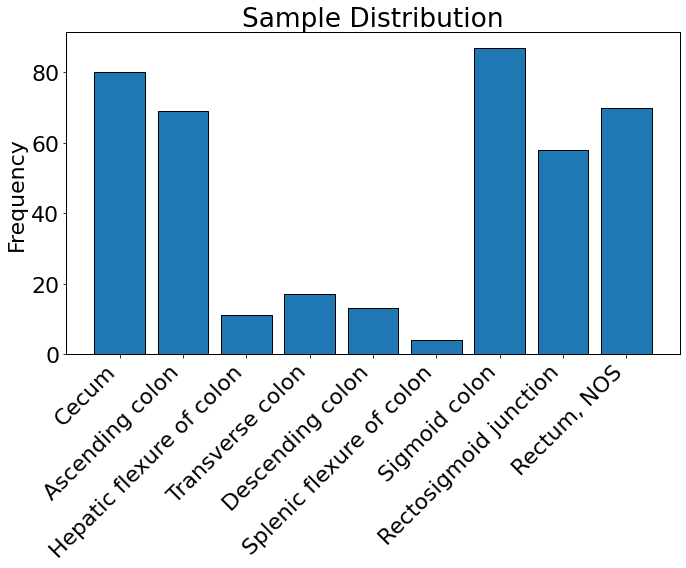

In [130]:
pa_sig.plot_sample_distribution()

## Calculate median value for each colon section

In [131]:
medians_sig, mad_sig = pa_sig.median_by_section()

This step has already been executed...loading results...
This step has already been executed...loading results...


In [132]:
medians_sig = medians_sig[(medians_sig==0).sum(axis=1) < 5]

In [133]:
medians_sig

Cecum  Ascending colon  Hepatic flexure of colon  \
signatures                                                     
SBS1         75.0             76.0                      92.0   
SBS5         66.0             64.0                      53.0   

            Transverse colon  Descending colon  Sigmoid colon  \
signatures                                                      
SBS1                    78.0              50.0           51.0   
SBS5                    40.0              73.0           36.0   

            Rectosigmoid junction  Rectum, NOS  
signatures                                      
SBS1                         48.0         52.5  
SBS5                         27.5         31.5

In [134]:
medians_sig.head()

Cecum  Ascending colon  Hepatic flexure of colon  \
signatures                                                     
SBS1         75.0             76.0                      92.0   
SBS5         66.0             64.0                      53.0   

            Transverse colon  Descending colon  Sigmoid colon  \
signatures                                                      
SBS1                    78.0              50.0           51.0   
SBS5                    40.0              73.0           36.0   

            Rectosigmoid junction  Rectum, NOS  
signatures                                      
SBS1                         48.0         52.5  
SBS5                         27.5         31.5

In [135]:
mad_sig.head()

Unnamed: 0  Cecum  Ascending colon  Hepatic flexure of colon  \
0       SBS1   22.0             26.0                      25.0   
1       SBS2    0.0              0.0                       0.0   
2       SBS3    0.0              0.0                       0.0   
3       SBS4    0.0              0.0                       0.0   
4       SBS5   52.5             58.0                      40.0   

   Transverse colon  Descending colon  Sigmoid colon  Rectosigmoid junction  \
0              37.0              14.0           16.0                   16.5   
1               0.0               0.0            0.0                    0.0   
2               0.0               0.0            0.0                    0.0   
3               0.0               0.0            0.0                    0.0   
4              36.0              37.0           33.0                   21.5   

   Rectum, NOS  
0         14.5  
1          0.0  
2          0.0  
3          0.0  
4         31.5

## Fit Observables

In [136]:
scores_sig, poly_obs_scores_sig, sig_obs_scores_sig, poly_models_sig, sig_models_sig = pa_sig.fit_data(medians_sig, guess_bounds = True)

This step has already been executed...loading results...
This step has already been executed...loading results...
This step has already been executed...loading results...
This step has already been executed...loading results...


In [137]:
scores_sig.head()

1         2 sigmoidal
SBS1  0.603353  0.611620  0.902902
SBS5  0.547399  0.556825  0.682354

## Fit Random permutated data

In [138]:
poly_perm_scores_sig, sig_perm_scores_sig, sig_perm_models_sig=pa_sig.fit_random_data(medians_sig, guess_bounds = True)

This step has already been executed...loading results...
This step has already been executed...loading results...
This step has already been executed...loading results...


## Compare obrservable vs permutated data

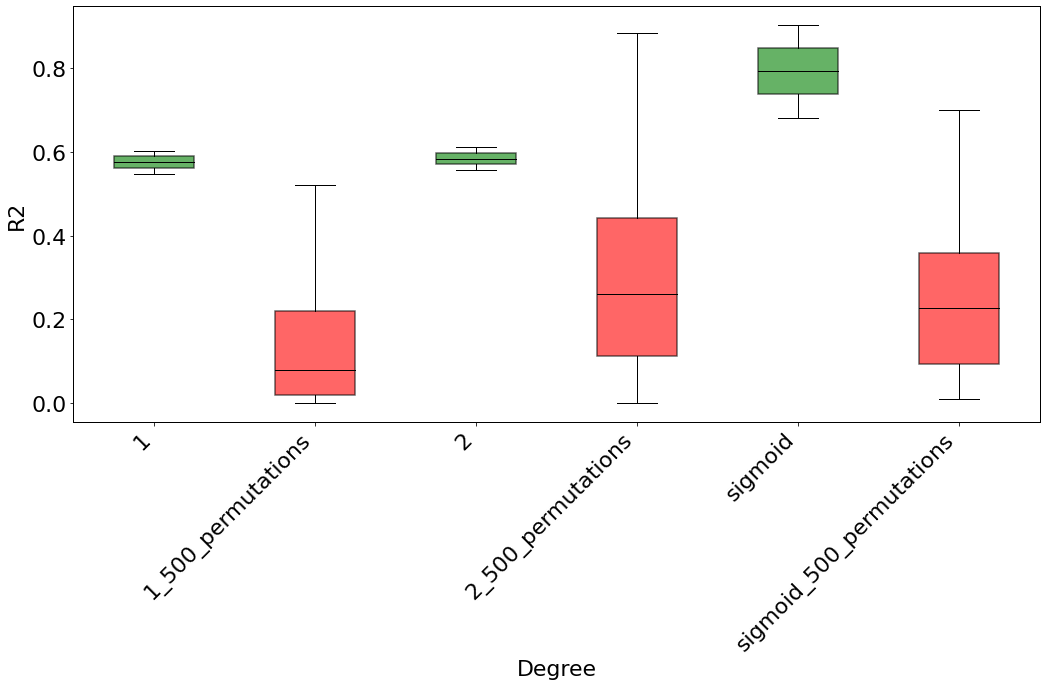

/home/ieo5417/.local/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:639: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/ieo5417/.local/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


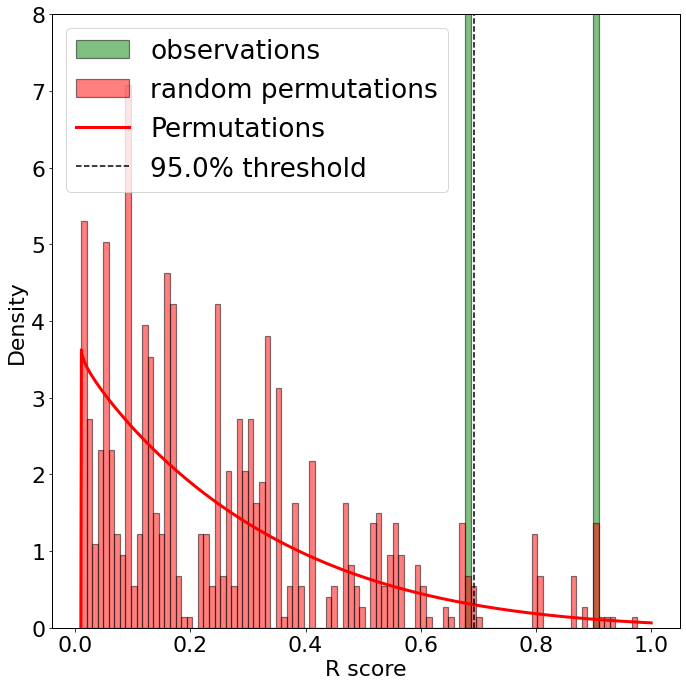

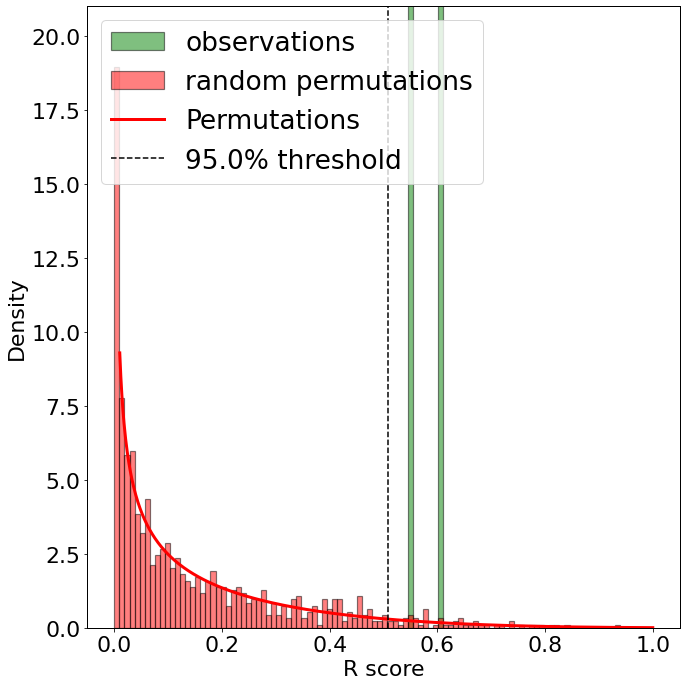

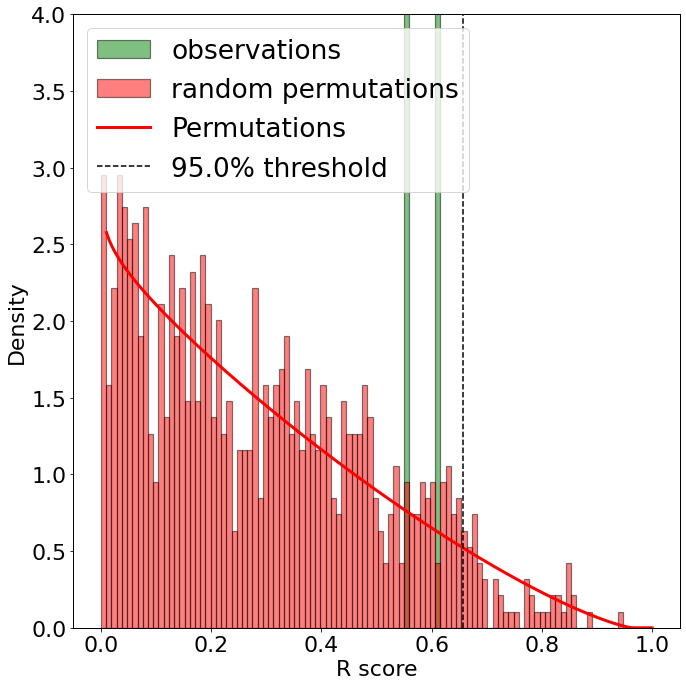

In [139]:
models_pvalue_sig=pa_sig.plot_gof(poly_obs_scores_sig, sig_obs_scores_sig, poly_perm_scores_sig, sig_perm_scores_sig, dist_perm=True)

In [140]:
models_pvalue_sig

{'sigmoidal': [1474.0, 0.01104332874517946, 0.6917132421943437],
 1: [1931.0, 0.011427775723200103, 0.5080328413430788],
 2: [1778.0, 0.028609901406077297, 0.6564597430616849]}

## Cluster genes

In [141]:
genes_clusters_sig=pa_sig.cluster_genes(scores_sig)

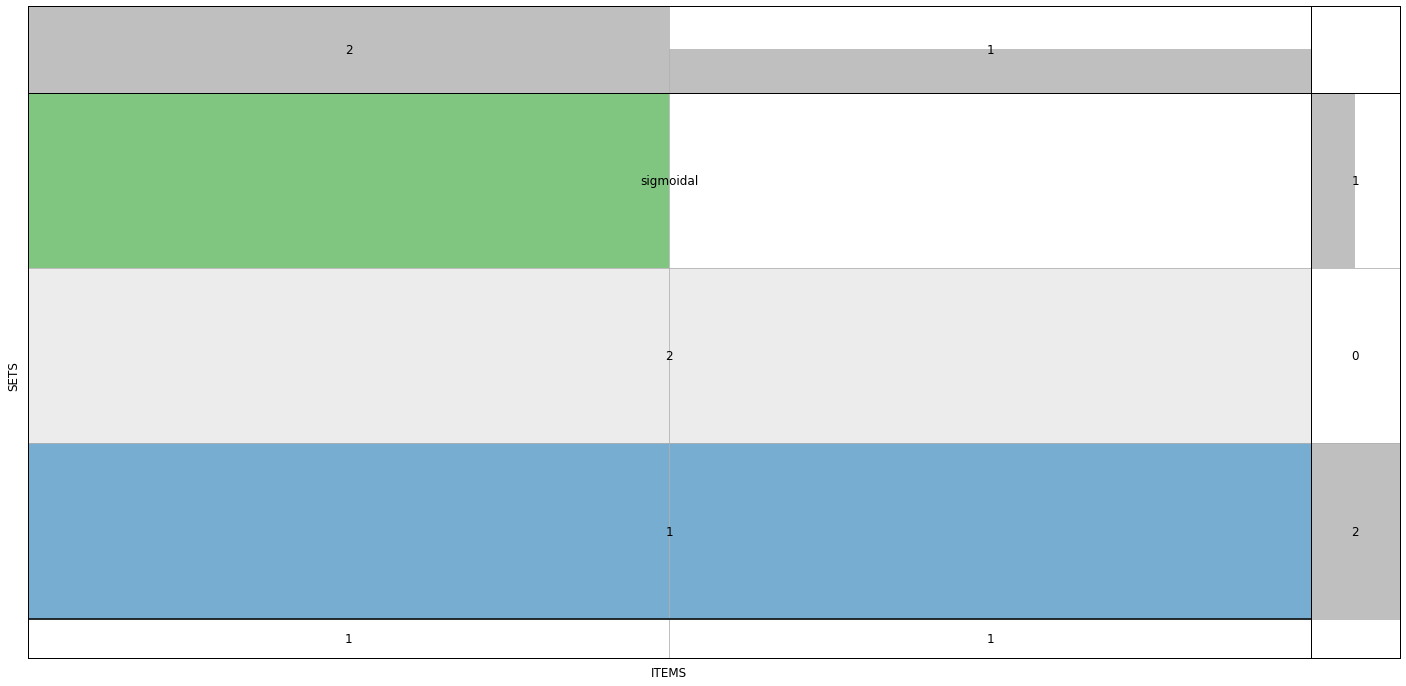

In [142]:
pa_sig.plot_clusters(genes_clusters_sig)

In [143]:
summary_sig=pa_sig.get_summary_table(genes_clusters_sig, scores_sig)

In [144]:
summary_sig

1   1_score      2  2_score  sigmoidal  sigmoidal_score
SBS1  True  0.603353  False      0.0       True         0.902902
SBS5  True  0.547399  False      0.0      False         0.000000

In [145]:
medians_sig

Cecum  Ascending colon  Hepatic flexure of colon  \
signatures                                                     
SBS1         75.0             76.0                      92.0   
SBS5         66.0             64.0                      53.0   

            Transverse colon  Descending colon  Sigmoid colon  \
signatures                                                      
SBS1                    78.0              50.0           51.0   
SBS5                    40.0              73.0           36.0   

            Rectosigmoid junction  Rectum, NOS  
signatures                                      
SBS1                         48.0         52.5  
SBS5                         27.5         31.5

In [146]:
continuum_sig, sigmoid_sig, discarded_sig = pa_sig.classify_genes(summary_sig)

# MICROBIOME PROFILING

In [147]:
# Create workflow class, specifying the path to the SETTINGS.ini file
pa_mic = ProfileAnalysis('../../../docker/analysis/microbiome')

Project has been created!


/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:153: UserWarning: Folder input_data already exist...skipping
  warnings.warn("Folder input_data already exist...skipping",
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:159: UserWarning: Folder data_raw already exist...skipping
  warnings.warn("Folder data_raw already exist...skipping",
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:165: UserWarning: Folder data_clinical already exist...skipping
  warnings.warn("Folder data_clinical already exist...skipping",
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:171: UserWarning: Folder sample_by_section already exist...skipping
  warnings.warn("Folder sample_by_section already exist...skipping",
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_anal

## Assign each sample in clinical data file to a colon section

In [148]:
pa_mic.create_samples_to_sections_table()

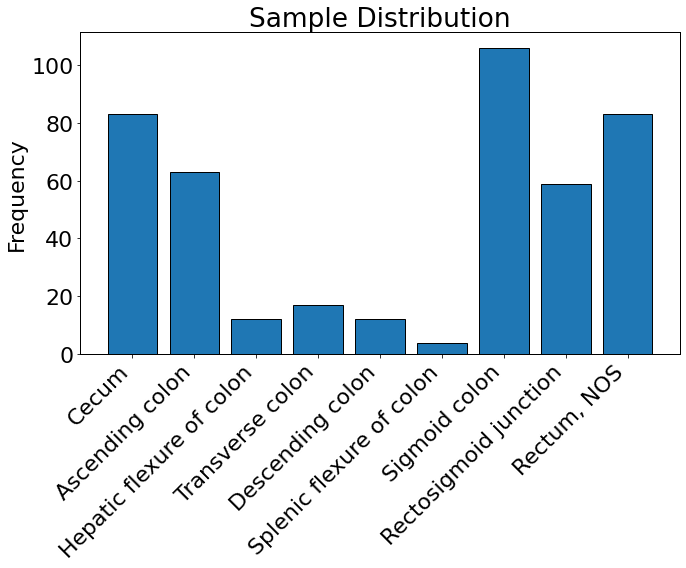

In [149]:
pa_mic.plot_sample_distribution()

## Calculate median value for each colon section

In [150]:
medians_mic, mad_mic = pa_mic.median_by_section()

This step has already been executed...loading results...
This step has already been executed...loading results...


In [151]:
medians_mic.head()

Cecum  Ascending colon  Hepatic flexure of colon  \
bacteria                                                        
1179670  -2.684319        -2.674210                 -2.834176   
1179672  -2.799040        -2.821632                 -2.935330   
11       -2.806582        -2.797666                 -2.971810   
999424   -2.796527        -2.797618                 -2.854728   
1196034  -2.663707        -2.661837                 -2.786505   

          Transverse colon  Descending colon  Sigmoid colon  \
bacteria                                                      
1179670          -2.681754         -2.684200      -2.683828   
1179672          -2.846768         -2.915675      -2.771784   
11               -2.805648         -2.927508      -2.762279   
999424           -2.806414         -2.954579      -2.769482   
1196034          -2.714282         -2.865930      -2.643100   

          Rectosigmoid junction  Rectum, NOS  
bacteria                                      
1179670               -2.688717    -2.669890  
1179672               -2.755150    -2.747330  
11                    -2.721537    -2.747888  
999424                -2.765886    -2.744082  
1196034               -2.637583    -2.568012

In [152]:
mad_mic.head()

Unnamed: 0     Cecum  Ascending colon  Hepatic flexure of colon  \
0     1179670  0.172113         0.143573                  0.149050   
1     1179672  0.107795         0.105530                  0.104331   
2          11  0.112692         0.116866                  0.154552   
3      999424  0.127391         0.126153                  0.118108   
4     1196034  0.163456         0.201114                  0.165972   

   Transverse colon  Descending colon  Sigmoid colon  Rectosigmoid junction  \
0          0.267996          0.206813       0.147661               0.116094   
1          0.102995          0.160669       0.113964               0.092409   
2          0.177329          0.231782       0.112339               0.072253   
3          0.141482          0.139682       0.118700               0.109229   
4          0.236352          0.100852       0.165327               0.143193   

   Rectum, NOS  
0     0.149615  
1     0.064890  
2     0.104313  
3     0.091241  
4     0.181201

## Fit Observables

In [153]:
scores_mic, poly_obs_scores_mic, sig_obs_scores_mic, poly_models_mic, sig_models_mic = pa_mic.fit_data(medians_mic, guess_bounds = True)

This step has already been executed...loading results...
This step has already been executed...loading results...
This step has already been executed...loading results...
This step has already been executed...loading results...


In [154]:
scores_mic.head()

1         2         3  sigmoidal
1179670  0.065154  0.149064  0.287449   0.218500
1179672  0.210107  0.606068  0.694666   0.600454
11       0.186923  0.425783  0.506726   0.495398
999424   0.076593  0.414265  0.414649   0.410472
1196034  0.109659  0.602789  0.602789   0.468371

## Fit Random permutated data

In [155]:
poly_perm_scores_mic, sig_perm_scores_mic, sig_perm_models_mic=pa_mic.fit_random_data(medians_mic, guess_bounds = True)

This step has already been executed...loading results...
This step has already been executed...loading results...


## Compare obrservable vs permutated data

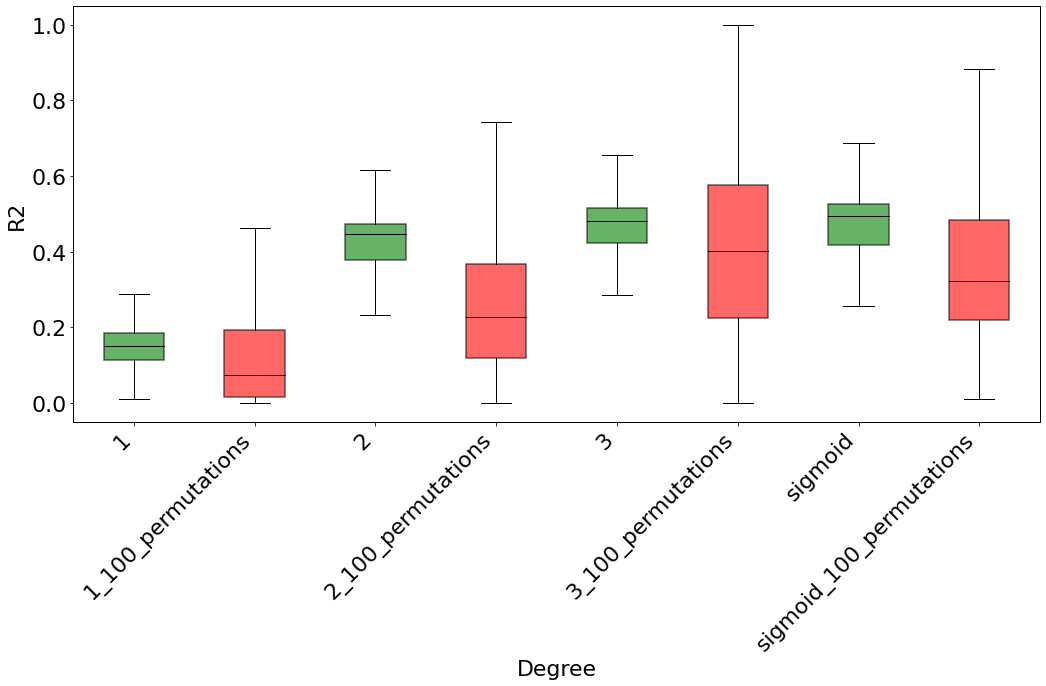

/home/ieo5417/.local/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:639: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/ieo5417/.local/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


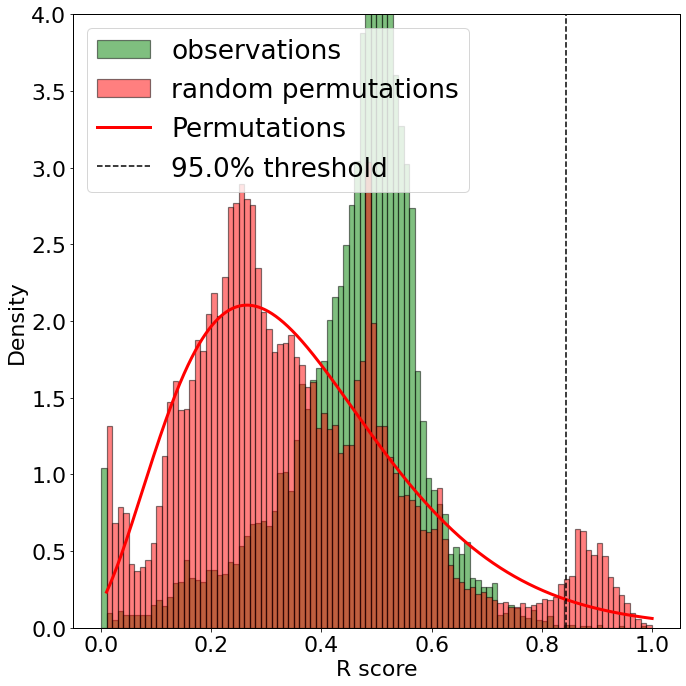

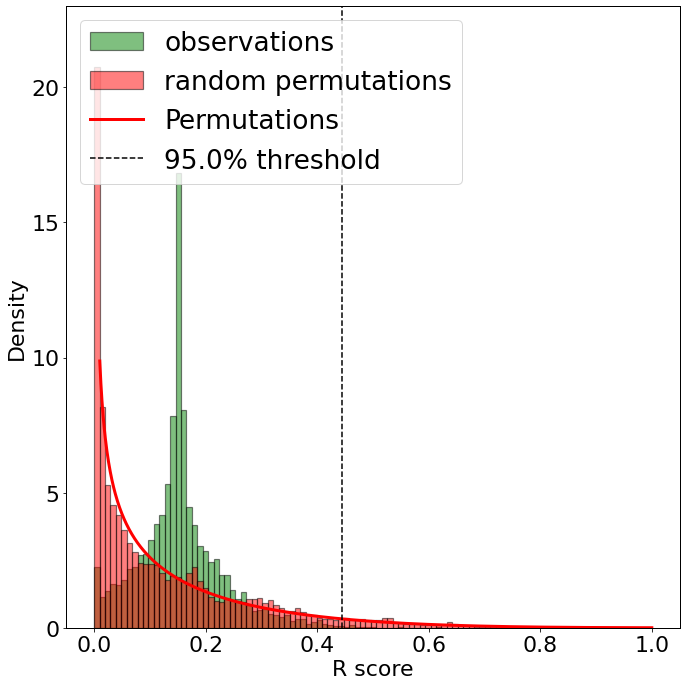

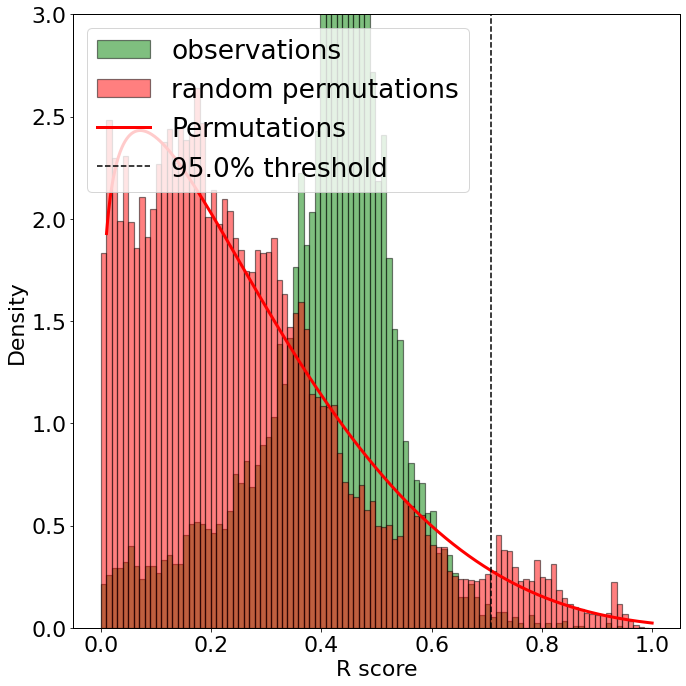

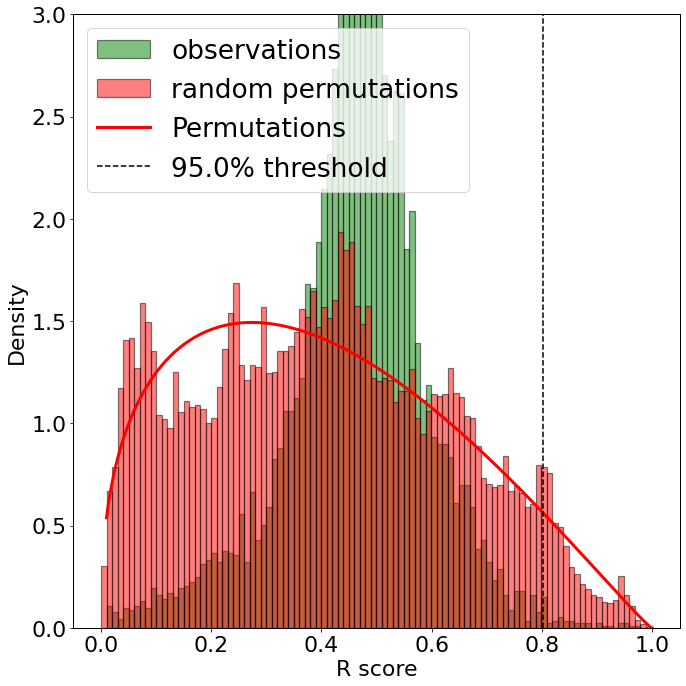

In [156]:
models_pvalue_mic=pa_mic.plot_gof(poly_obs_scores_mic, sig_obs_scores_mic, poly_perm_scores_mic, sig_perm_scores_mic, dist_perm=True)

In [157]:
models_pvalue_mic

{'sigmoidal': [5528367276.0, 0.0, 0.8431664352532973],
 1: [5649896447.0, 0.0, 0.44517487075302],
 2: [6712102348.0, 0.0, 0.7076423464661534],
 3: [5253910820.0, 1.2188459598801981e-251, 0.8012715335460863]}

## Cluster genes

In [158]:
genes_clusters_mic=pa_mic.cluster_genes(scores_mic)

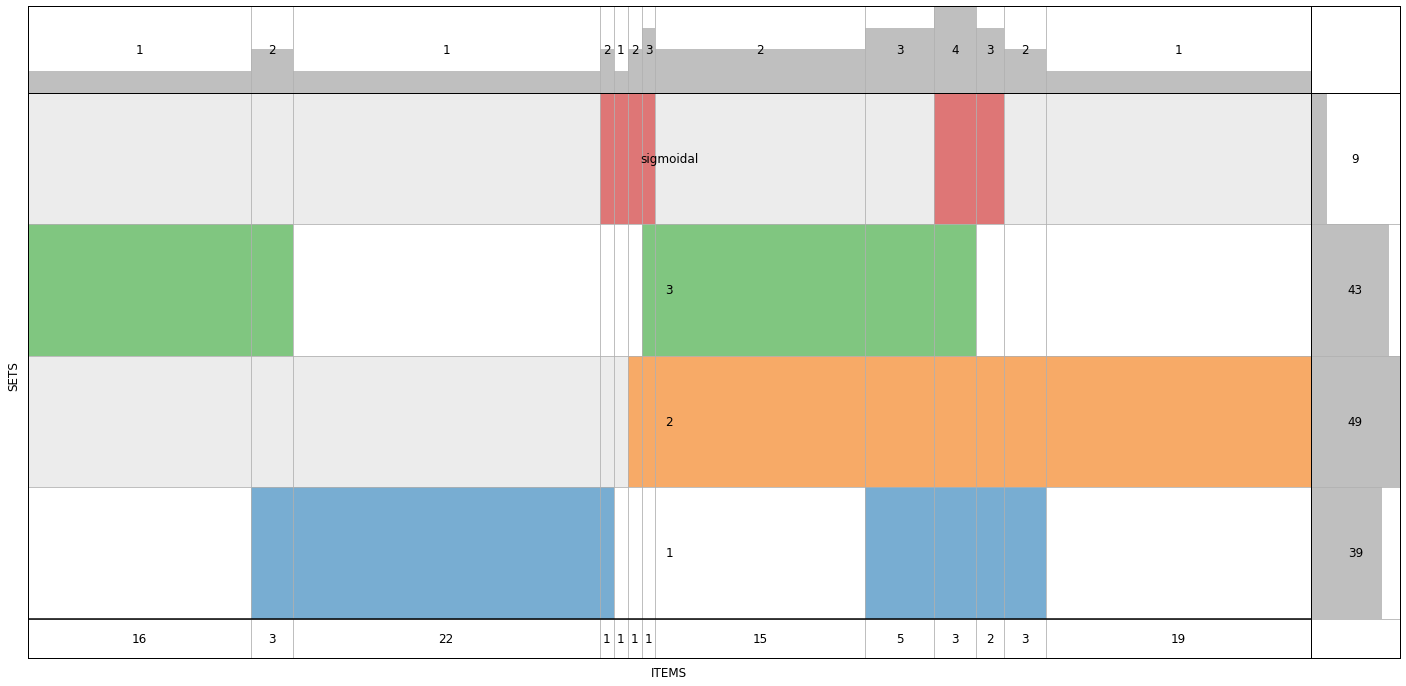

In [159]:
pa_mic.plot_clusters(genes_clusters_mic)

In [160]:
summary_mic=pa_mic.get_summary_table(genes_clusters_mic, scores_mic)

In [161]:
continuum_mic, sigmoid_mic, discarded_mic = pa_mic.classify_genes(summary_mic)

In [231]:
id_conversion_table=pd.read_csv('../../../docker/analysis/microbiome/misc/all_species.txt', sep='\t')
id_conversion_table.set_index('tax_id', inplace=True)

# IMMUNE CELLS PROFILING

In [165]:
# Create workflow class, specifying the path to the SETTINGS.ini file
pa_imm = ProfileAnalysis('../../../docker/analysis/immune_cells')

Project has been created!


/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:153: UserWarning: Folder input_data already exist...skipping
  warnings.warn("Folder input_data already exist...skipping",
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:159: UserWarning: Folder data_raw already exist...skipping
  warnings.warn("Folder data_raw already exist...skipping",
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:165: UserWarning: Folder data_clinical already exist...skipping
  warnings.warn("Folder data_clinical already exist...skipping",
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:171: UserWarning: Folder sample_by_section already exist...skipping
  warnings.warn("Folder sample_by_section already exist...skipping",
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_anal

## Assign each sample in clinical data file to a colon section

In [166]:
pa_imm.create_samples_to_sections_table()

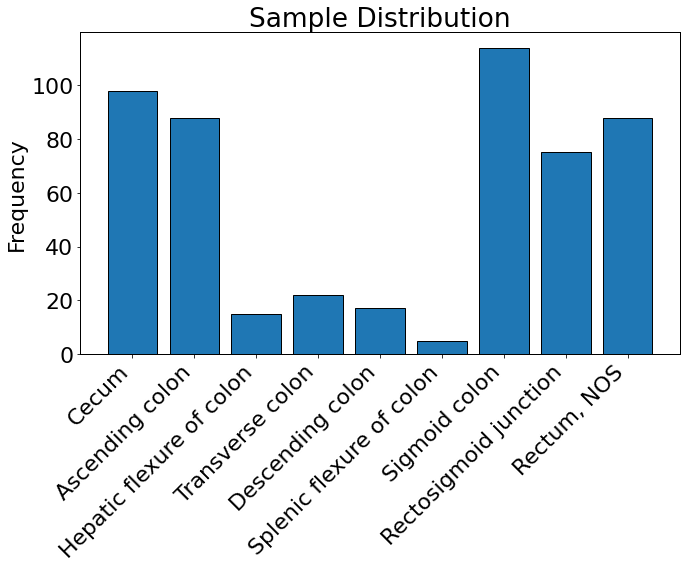

In [167]:
pa_imm.plot_sample_distribution()

## Calculate median value for each colon section

In [168]:
medians_imm, mad_imm = pa_imm.median_by_section()

This step has already been executed...loading results...
This step has already been executed...loading results...


In [169]:
medians_imm.head()

Cecum  Ascending colon  \
immune                                                    
B cells naive                 0.042101         0.042465   
Plasma cells                  0.009834         0.011512   
T cells CD8                   0.097960         0.094022   
T cells CD4 memory resting    0.176815         0.174943   
T cells CD4 memory activated  0.049830         0.049708   

                              Hepatic flexure of colon  Transverse colon  \
immune                                                                     
B cells naive                                 0.044331          0.061623   
Plasma cells                                  0.010044          0.013169   
T cells CD8                                   0.081564          0.108457   
T cells CD4 memory resting                    0.205695          0.190071   
T cells CD4 memory activated                  0.074932          0.066294   

                              Descending colon  Sigmoid colon  \
immune                                                          
B cells naive                         0.039786       0.039895   
Plasma cells                          0.014253       0.010713   
T cells CD8                           0.073589       0.071604   
T cells CD4 memory resting            0.210496       0.185001   
T cells CD4 memory activated          0.045497       0.057238   

                              Rectosigmoid junction  Rectum, NOS  
immune                                                            
B cells naive                              0.041598     0.043787  
Plasma cells                               0.009453     0.008726  
T cells CD8                                0.073204     0.072837  
T cells CD4 memory resting                 0.206281     0.203732  
T cells CD4 memory activated               0.055646     0.060286

In [170]:
mad_imm.head()

Unnamed: 0     Cecum  Ascending colon  \
0                 B cells naive  0.018843         0.021334   
1                  Plasma cells  0.006918         0.009179   
2                   T cells CD8  0.040623         0.041564   
3    T cells CD4 memory resting  0.055731         0.045962   
4  T cells CD4 memory activated  0.026848         0.027117   

   Hepatic flexure of colon  Transverse colon  Descending colon  \
0                  0.018715          0.040869          0.015204   
1                  0.008759          0.011005          0.009915   
2                  0.036412          0.033653          0.018934   
3                  0.054014          0.044186          0.077821   
4                  0.030170          0.011103          0.018838   

   Sigmoid colon  Rectosigmoid junction  Rectum, NOS  
0       0.016428               0.014565     0.020271  
1       0.008425               0.008675     0.007429  
2       0.023178               0.027397     0.026556  
3       0.045446               0.041033     0.046807  
4       0.028296               0.024011     0.024042

## Fit Observables

In [171]:
scores_imm, poly_obs_scores_imm, sig_obs_scores_imm, poly_models_imm, sig_models_imm = pa_imm.fit_data(medians_imm, guess_bounds = True)

This step has already been executed...loading results...
This step has already been executed...loading results...
This step has already been executed...loading results...
This step has already been executed...loading results...


In [172]:
scores_imm.head()

1         2  sigmoidal
B cells naive                 0.012830  0.105632   0.012830
Plasma cells                  0.052330  0.602110   0.052330
T cells CD8                   0.504303  0.504507   0.734942
T cells CD4 memory resting    0.388940  0.460182   0.630272
T cells CD4 memory activated  0.007632  0.064691   0.007632

## Fit Random permutated data

In [173]:
poly_perm_scores_imm, sig_perm_scores_imm, sig_perm_models_imm=pa_imm.fit_random_data(medians_imm, guess_bounds = True)

This step has already been executed...loading results...
This step has already been executed...loading results...


## Compare obrservable vs permutated data

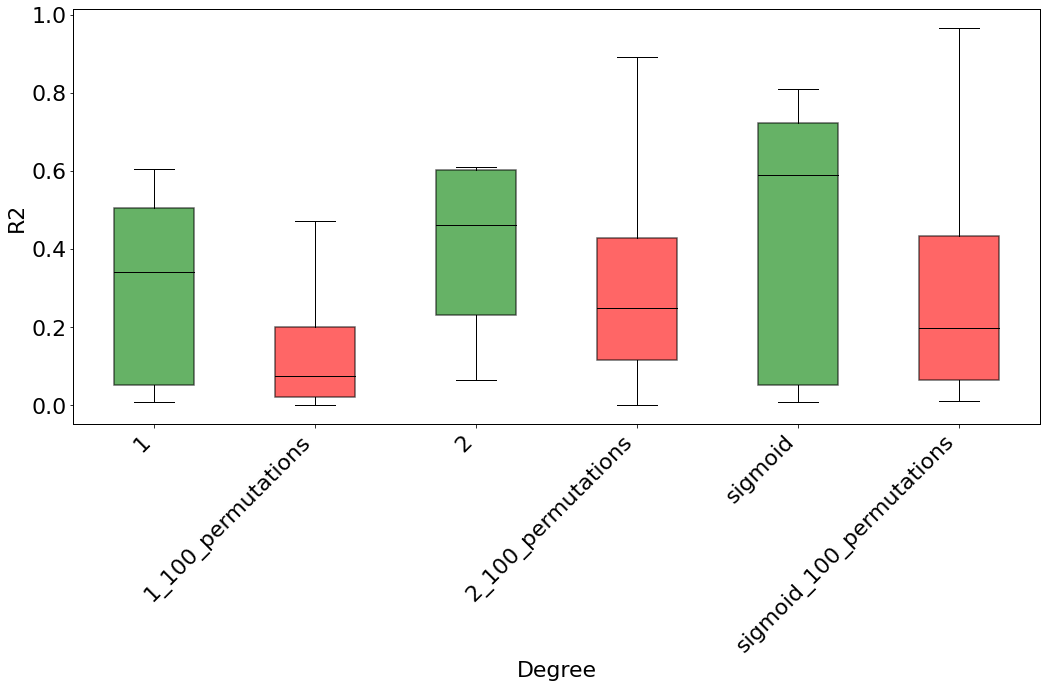

/home/ieo5417/.local/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:639: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


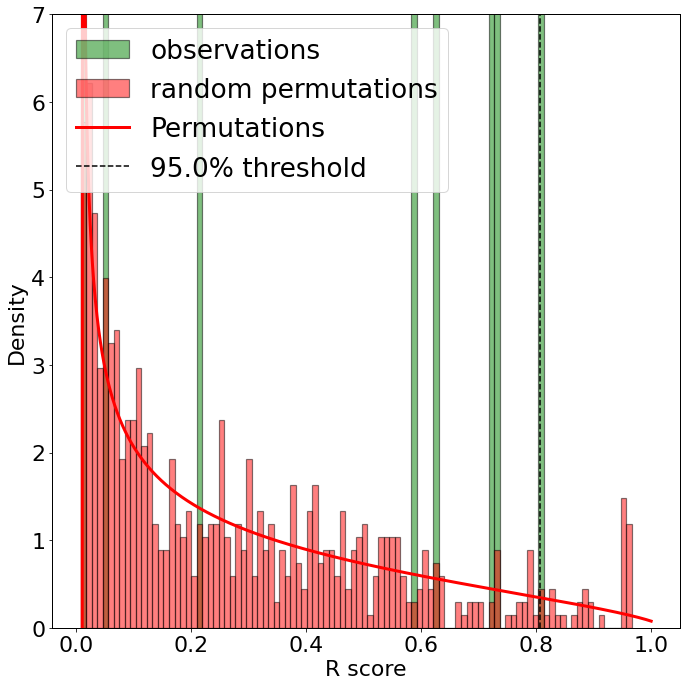

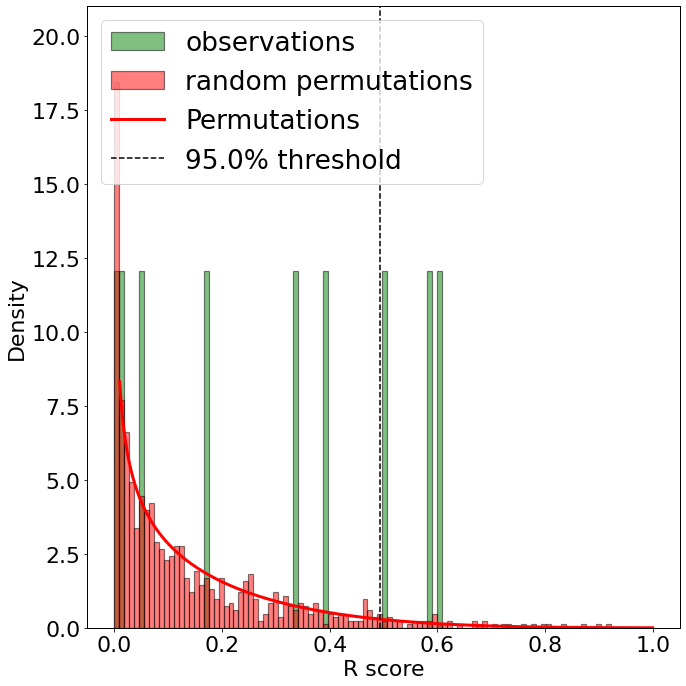

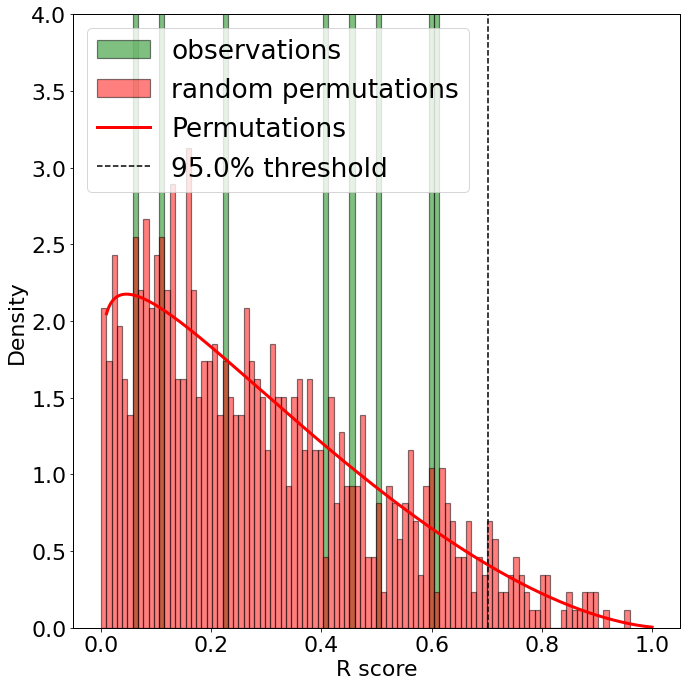

In [174]:
models_pvalue_imm=pa_imm.plot_gof(poly_obs_scores_imm, sig_obs_scores_imm, poly_perm_scores_imm, sig_perm_scores_imm, dist_perm=True)

In [175]:
models_pvalue_imm

{'sigmoidal': [3760.0, 0.1698686249436016, 0.8074046509021652],
 1: [5540.0, 0.028683752848333424, 0.4930886981230882],
 2: [5253.0, 0.062476969704019975, 0.7030799177700063]}

## Cluster genes

In [176]:
genes_clusters_imm=pa_imm.cluster_genes(scores_imm)

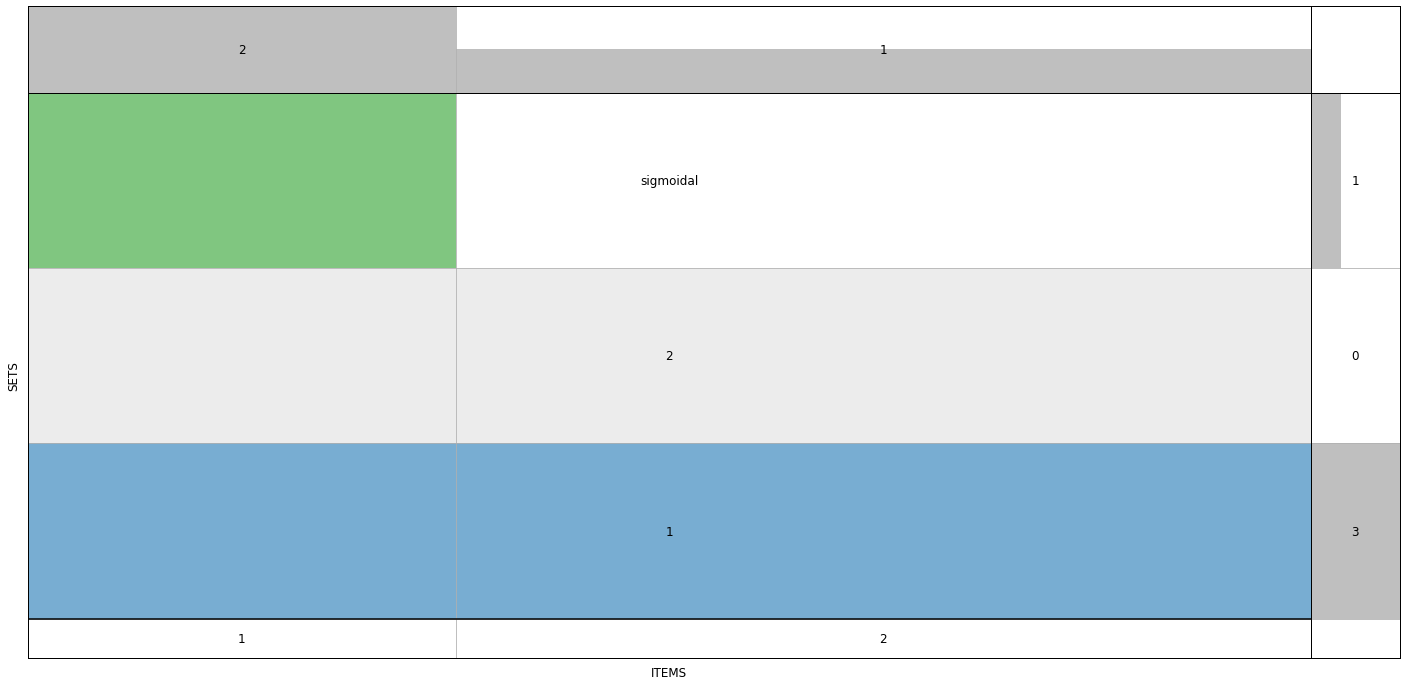

In [177]:
pa_imm.plot_clusters(genes_clusters_imm)

In [178]:
summary_imm=pa_imm.get_summary_table(genes_clusters_imm, scores_imm)

In [179]:
continuum_imm, sigmoid_imm, discarded_imm = pa_imm.classify_genes(summary_imm)

In [180]:
continuum_imm

model     score
Macrophages M0                1  0.589139
T cells follicular helper     1  0.604117
T cells CD8                   1  0.504303

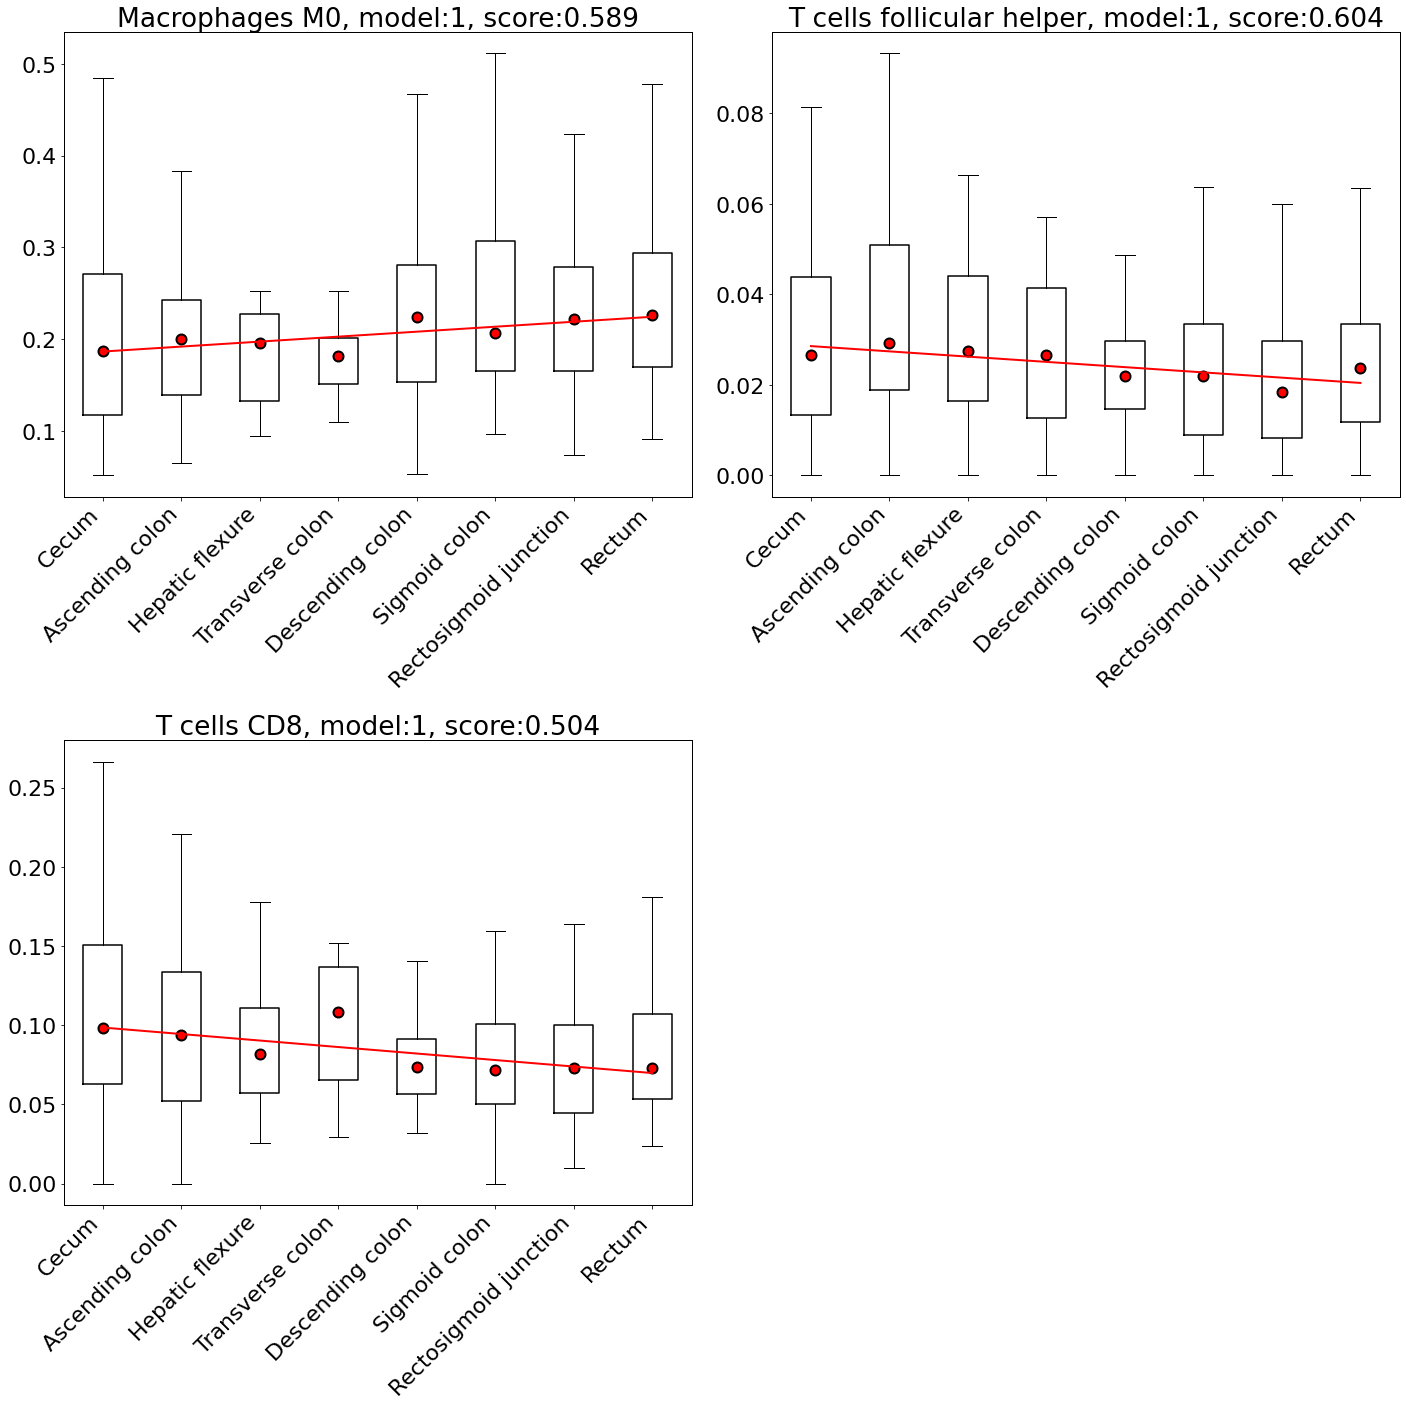

In [181]:
pa_imm.plot_fitting(continuum_imm, continuum_imm.index, medians_imm, poly_models_imm, sig_models_imm, 'continuum')

# METABOLITES PROFILING

In [182]:
pa_met=ProfileAnalysis('../../../docker/analysis/metabolites')

Project has been created!


/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:153: UserWarning: Folder input_data already exist...skipping
  warnings.warn("Folder input_data already exist...skipping",
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:159: UserWarning: Folder data_raw already exist...skipping
  warnings.warn("Folder data_raw already exist...skipping",
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:165: UserWarning: Folder data_clinical already exist...skipping
  warnings.warn("Folder data_clinical already exist...skipping",
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:171: UserWarning: Folder sample_by_section already exist...skipping
  warnings.warn("Folder sample_by_section already exist...skipping",
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_anal

## Assign each sample in clinical data file to a colon section

In [183]:
pa_met.create_samples_to_sections_table()

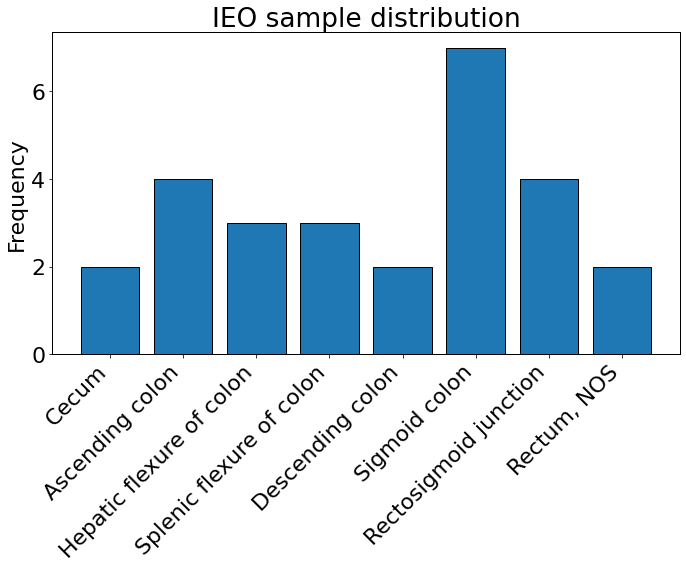

In [184]:
pa_met.plot_sample_distribution(title='IEO sample distribution')

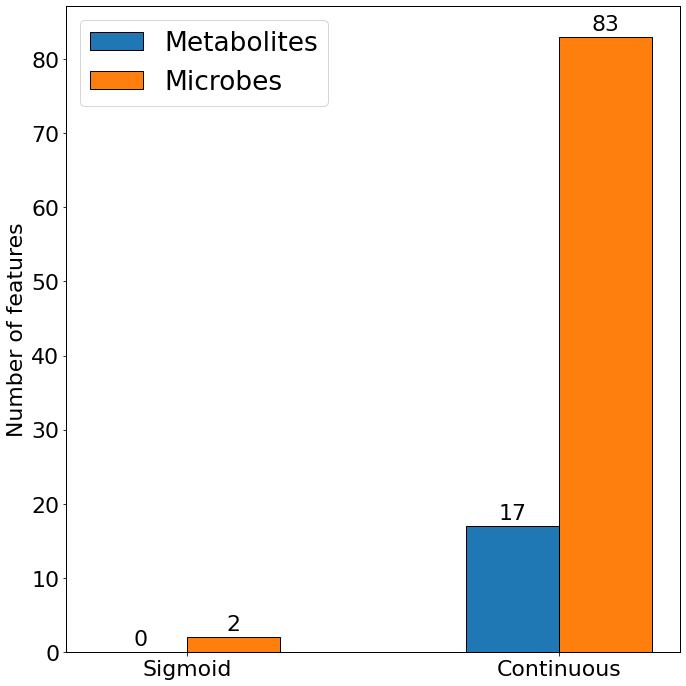

In [185]:
import numpy as np
labels = ['Sigmoid', 'Continuous']
metabolites = [0, 17]
microbiome = [2, 83]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(10,10))
rects1 = ax.bar(x - width/2, metabolites, width, label='Metabolites', edgecolor='k')
rects2 = ax.bar(x + width/2, microbiome, width, label='Microbes', edgecolor='k')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of features')
ax.set_xticks(x, labels)
ax.legend(loc='upper left')

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()
plt.savefig('/'.join([pa_met.figures, 'metabolites_microbes.svg']), format='svg')
plt.show()

## Calculate median value for each colon section

In [186]:
medians_met, mad_met=pa_met.median_by_section(remove_outliers=False, scale=False)

This step has already been executed...loading results...
This step has already been executed...loading results...


In [187]:
medians_met = medians_met[medians_met.isna().sum(axis=1)<2]

([<matplotlib.axis.XTick at 0x7fd7c24fdf10>,
 [Text(1, 0, 'Cecum'),
  Text(2, 0, 'Ascending colon'),
  Text(3, 0, 'Hepatic flexure'),
  Text(4, 0, 'Splenic flexure of colon'),
  Text(5, 0, 'Descending colon'),
  Text(6, 0, 'Sigmoid colon'),
  Text(7, 0, 'Rectosigmoid junction'),
  Text(8, 0, 'Rectum')])

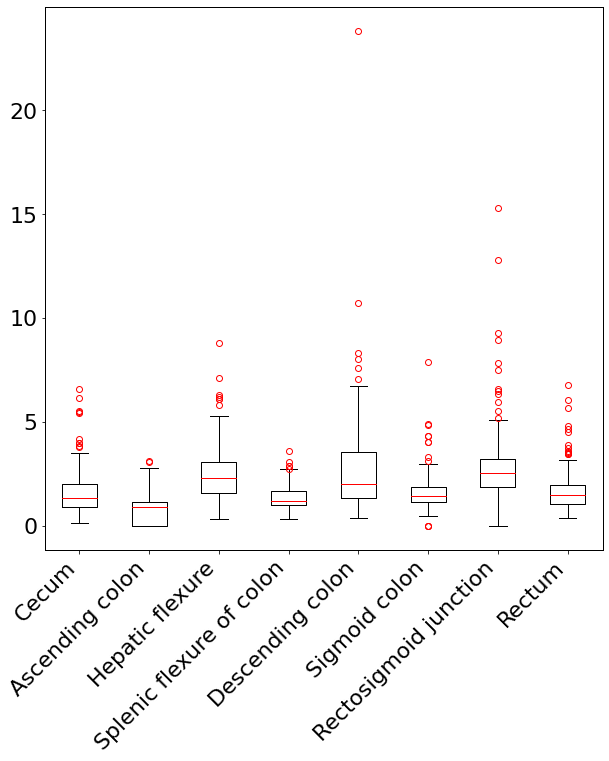

In [188]:
plt.figure(figsize=(10,10))
plt.boxplot(medians_met.fillna(0))
plt.xticks([1,2,3,4,5,6,7,8], pa_met.sections4plots, rotation=45, ha='right')

In [189]:
medians_met.head()

Cecum  Ascending colon  Hepatic flexure of colon  \
metabolites                                                        
49           0.916616         1.137239                  2.802380   
50           1.272790         1.911105                  2.946900   
55           2.655592         2.484064                  7.122336   
93           1.142999         0.749726                  1.930918   
112          1.324899         1.132940                  2.102044   

             Splenic flexure of colon  Descending colon  Sigmoid colon  \
metabolites                                                              
49                           0.648456          1.269340            NaN   
50                           1.279519          5.783875       2.953145   
55                           3.048335         10.699613       4.873210   
93                           0.817009          2.082914       1.826542   
112                          1.212122          2.663467       1.078540   

             Rectosigmoid junction  Rectum, NOS  
metabolites                                      
49                        2.798767     4.794570  
50                        3.947325     3.587472  
55                        6.457502     5.667234  
93                        2.084325     1.009596  
112                       3.402928     1.740025

## Fit Observables

In [190]:
models_scores_met, poly_obs_fit_scores_met, sig_obs_fit_scores_met, poly_models_met, sig_models_met=pa_met.fit_data(medians_met, guess_bounds = True)

This step has already been executed...loading results...
This step has already been executed...loading results...
This step has already been executed...loading results...
This step has already been executed...loading results...


## Fit Random permutated data

In [191]:
poly_perm_fit_scores_met, sig_perm_fit_scores_met, sig_perm_models_met=pa_met.fit_random_data(medians_met, guess_bounds = True)

This step has already been executed...loading results...
This step has already been executed...loading results...


## Compare obrservable vs permutated data

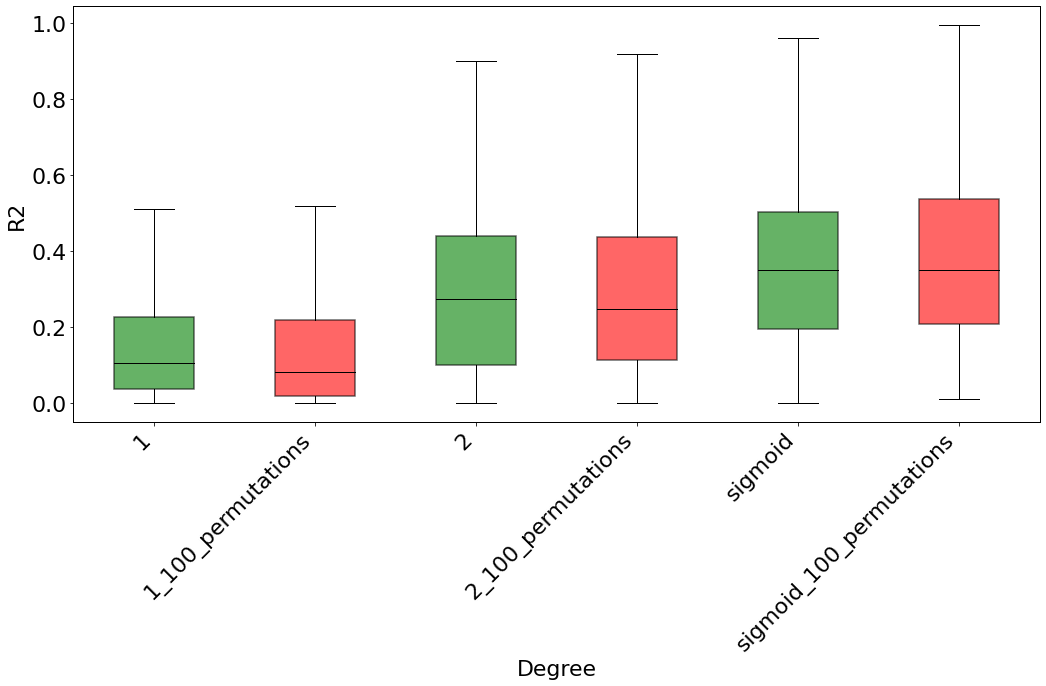

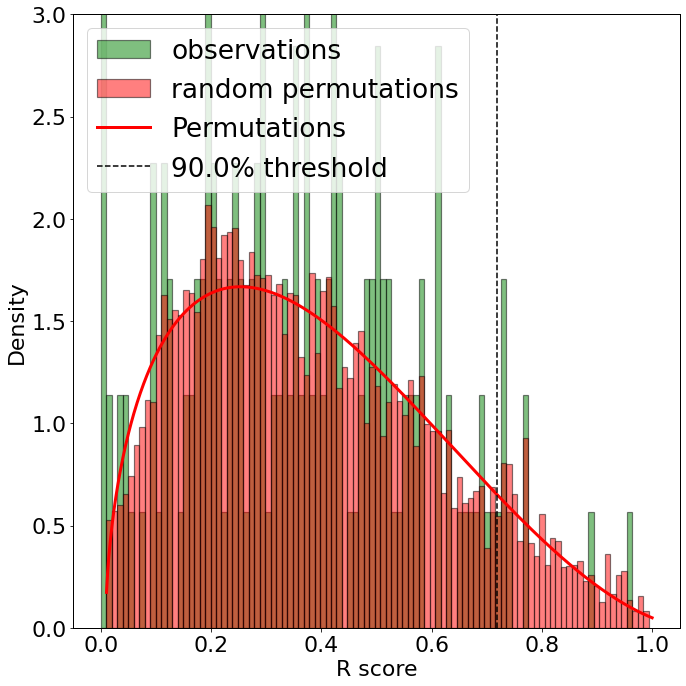

/home/ieo5417/.local/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:639: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


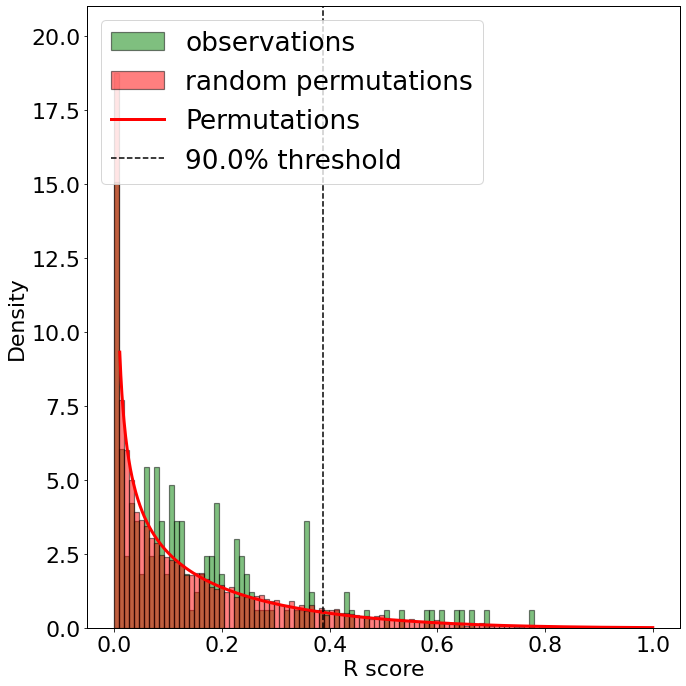

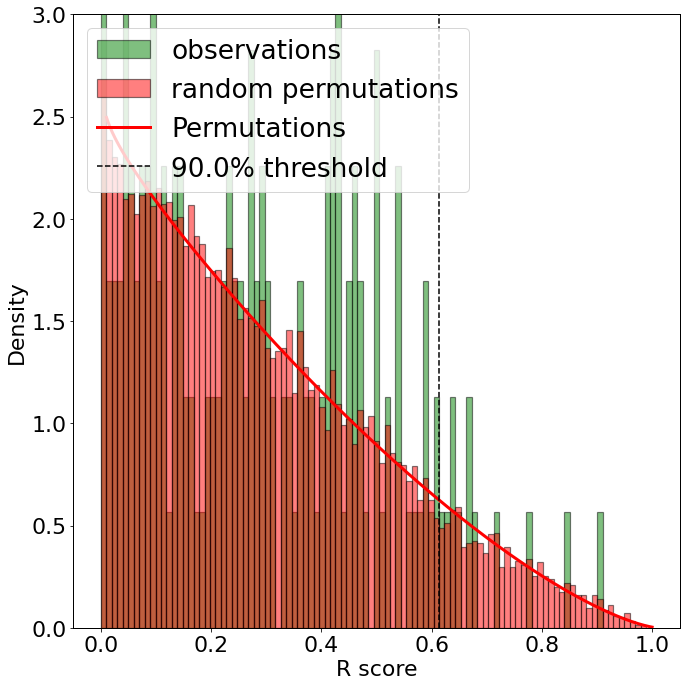

In [192]:
models_pvalue_table_met=pa_met.plot_gof(poly_obs_fit_scores_met, sig_obs_fit_scores_met, poly_perm_fit_scores_met, sig_perm_fit_scores_met)

In [193]:
genes_clusters_met=pa_met.cluster_genes(models_scores_met)

In [194]:
models_pvalue_table_met

{'sigmoidal': [1432031.0, 0.9224550439717141, 0.7193340774335014],
 1: [1717366.0, 0.048488766777172995, 0.38713120446981636],
 2: [1614043.0, 0.43148178333463855, 0.6125438297305912]}

## Cluster genes

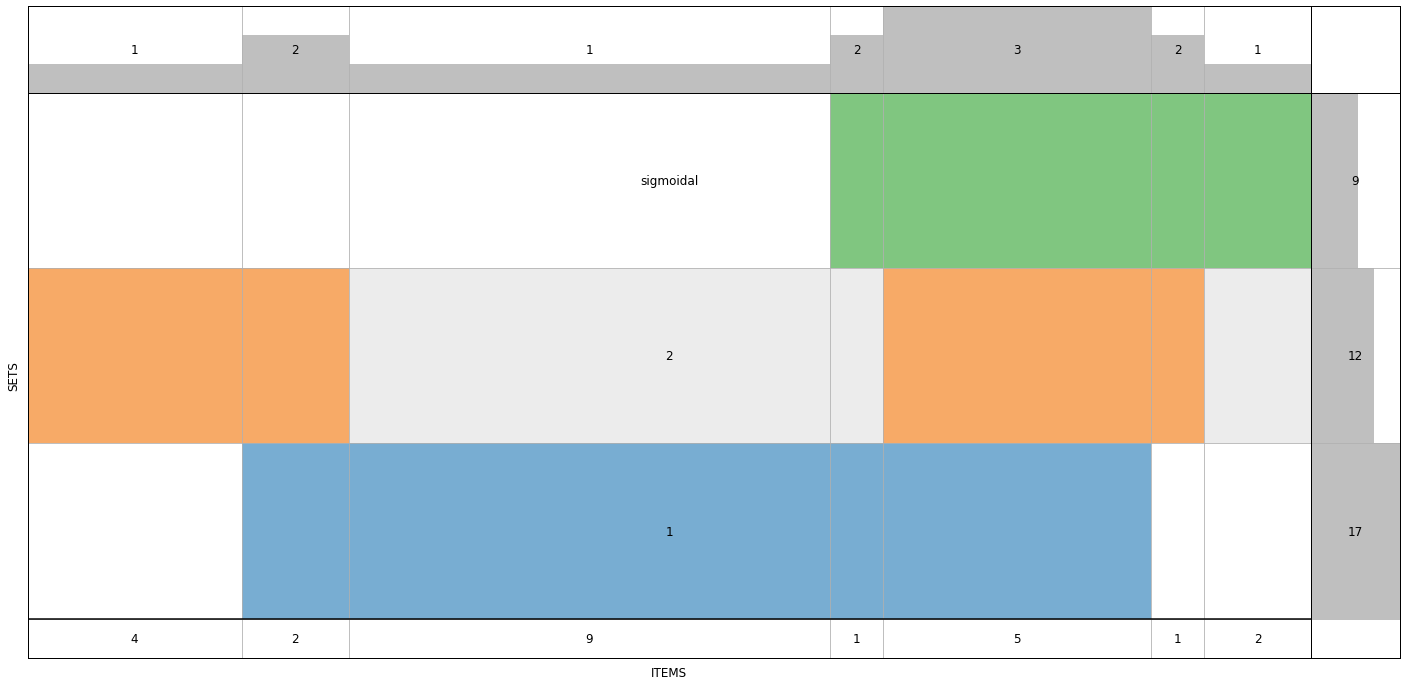

In [195]:
pa_met.plot_clusters(genes_clusters_met)

In [196]:
summary_met=pa_met.get_summary_table(genes_clusters_met, models_scores_met)

In [197]:
continuum_met, sigmoid_met, discarded_met = pa_met.classify_genes(summary_met)

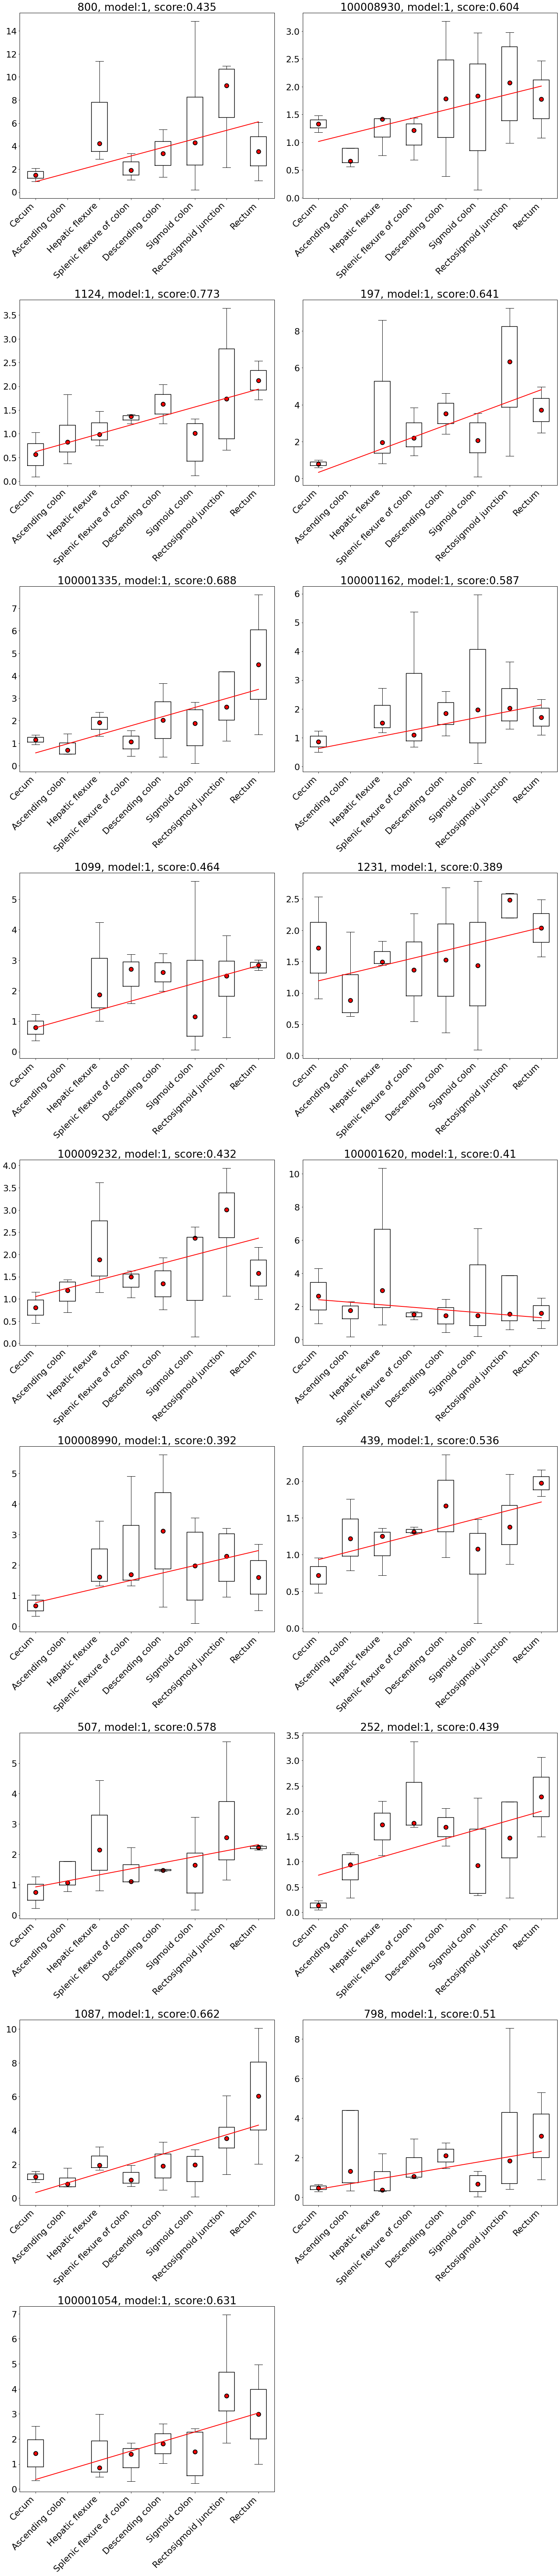

In [200]:
pa_met.plot_fitting(continuum_met, list(continuum_met.index), medians_met, poly_models_met, sig_models_met, 'continuum')

In [203]:
name_conversion = pd.read_csv('../../../docker/analysis/metabolites/metabolites_id_to_names.csv')
name_dict={}
for index in continuum_met.index:
    name_dict[index]=name_conversion[name_conversion['CHEM_ID']==index]['CHEMICAL_NAME'].item()
metabolites_name_df=pd.DataFrame(name_dict, index=['metabolite name']).T

In [204]:
metabolites_name_df

metabolite name
800                                           cysteine
100008930                      oleate/vaccenate (18:1)
1124                                           citrate
197                       S-adenosylhomocysteine (SAH)
100001335                           eicosenoate (20:1)
100001162                      propionylcarnitine (C3)
1099                                         guanosine
1231                         dihomo-linoleate (20:2n6)
100009232                                  thioproline
100001620                   glycerophosphoethanolamine
100008990  1-palmitoyl-2-arachidonoyl-GPE (16:0/20:4)*
439                                    stearate (18:0)
507                                           spermine
252                                          succinate
1087                                  erucate (22:1n9)
798                                          adenosine
100001054                        butyrylcarnitine (C4)

In [205]:
import math

def summary_profile_plot(medians, mad, indexes, metabolite_names, scores_table, poly_models):
    data=medians.loc[indexes]
    data_err=mad.loc[indexes]
    data.fillna(0, inplace=True)
    
    x = np.linspace(pa_met.x[0], pa_met.x[-1], 1000)
    degree = int(scores_table.loc[data.index[0],'model'])
    y = np.polynomial.polynomial.polyval(x, poly_models[degree][data.index[0]])
    
    n = 0    
    fig = plt.figure(figsize=(15, 15))
    axes=[]
    ax_base = plt.subplot2grid((9,2), (0,0))
    axes.append(ax_base)
    ax_base.errorbar(pa_met.x, data.loc[data.index[0]], yerr=data_err.loc[data.index[0]],
                     label=metabolite_names.loc[data.index[0]].item(),
                    marker='o', markeredgecolor='k', markerfacecolor='red', color='k')
    ax_base.plot(x, y, color='red', ls='-', linewidth=2, alpha=0.7)
    max_lim = math.ceil(data_err.loc[data.index[0]].max()+data.loc[data.index[0]].max())
    ax_base.axis(ymin=0, ymax=max_lim)
    ax_base.set_yticks([0, max_lim]) 
    ax_base.set_yticklabels([str(0), str(max_lim)], fontsize=15)
    ax_base.set_title(metabolite_names.loc[data.index[0]].item(), y=1.0, x=0.01, pad=-17, loc='left', fontsize=12)

    
    l=1
    h=0
    for index in data.index[1:len(data.index)]:
        degree = int(scores_table.loc[index,'model'])
        y = np.polynomial.polynomial.polyval(x, poly_models[degree][index])
        ax = plt.subplot2grid((9,2), (h,l), sharex=ax_base)
        axes.append(ax)
        markers, caps, bars = ax.errorbar(pa_met.x, data.loc[index], yerr=data_err.loc[index], label=metabolite_names.loc[index],
                    marker='o', markeredgecolor='k', markerfacecolor='red', color='k')
        ax.plot(x, y, color='red', ls='-', linewidth=2, alpha=0.7)
        ax.set_xticks(pa_met.x)
        ax.set_xticklabels(pa_met.sections4plots, rotation=45, ha='right', fontsize=15)
        max_lim = math.ceil(data_err.loc[index].max()+data.loc[index].max())
        ax.axis(ymin=0, ymax=max_lim)
        ax.set_yticks([0, max_lim])
        ax.set_yticklabels([str(0), str(max_lim)], fontsize=15)
        ax.set_title(metabolite_names.loc[index].item(), y=1.0, x=0.01, pad=-17, loc='left', fontsize=12)
        l = l+1
        if l == 2:
            h = h+1
            l = 0
    fig.subplots_adjust(hspace=0.25)   
    for ax in axes[0:-2]:
        plt.setp(ax.get_xticklabels(), visible=False)    
    plt.savefig('/'.join([pa_met.figures, 'continuous_metabolites.svg']), format='svg')

In [214]:
mad_met.set_index('Unnamed: 0', inplace=True)

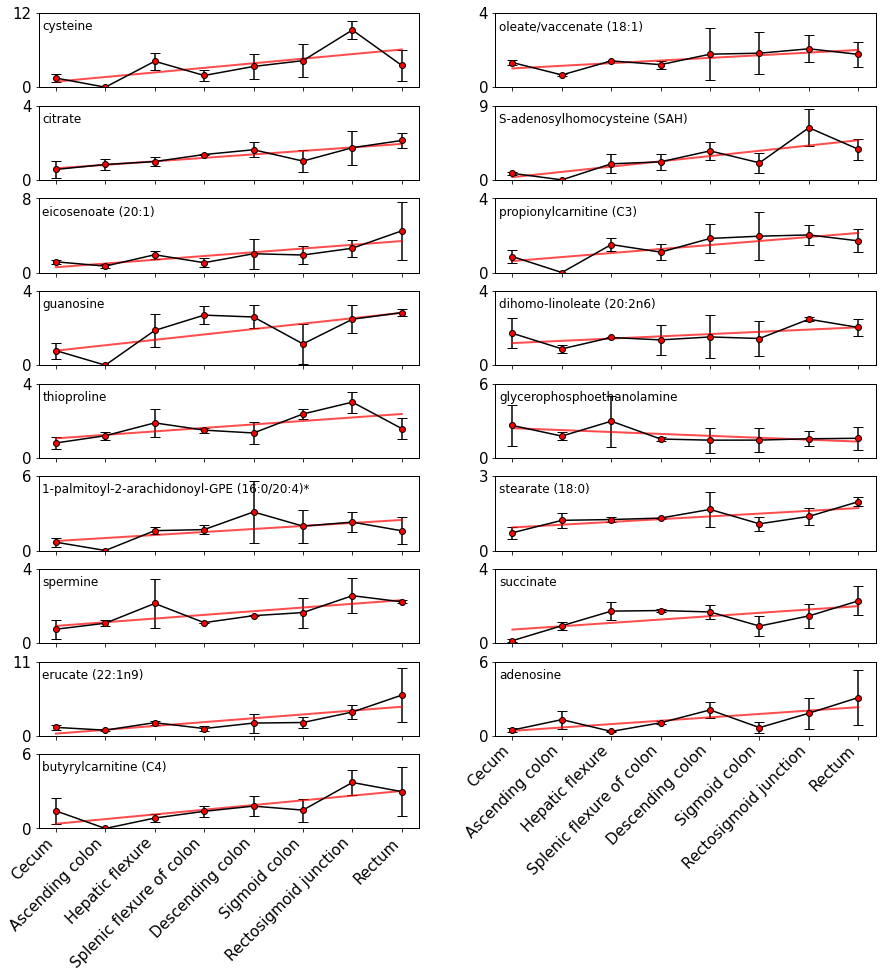

In [215]:
summary_profile_plot(medians_met, mad_met, continuum_met.index, metabolites_name_df, continuum_met, poly_models_met)

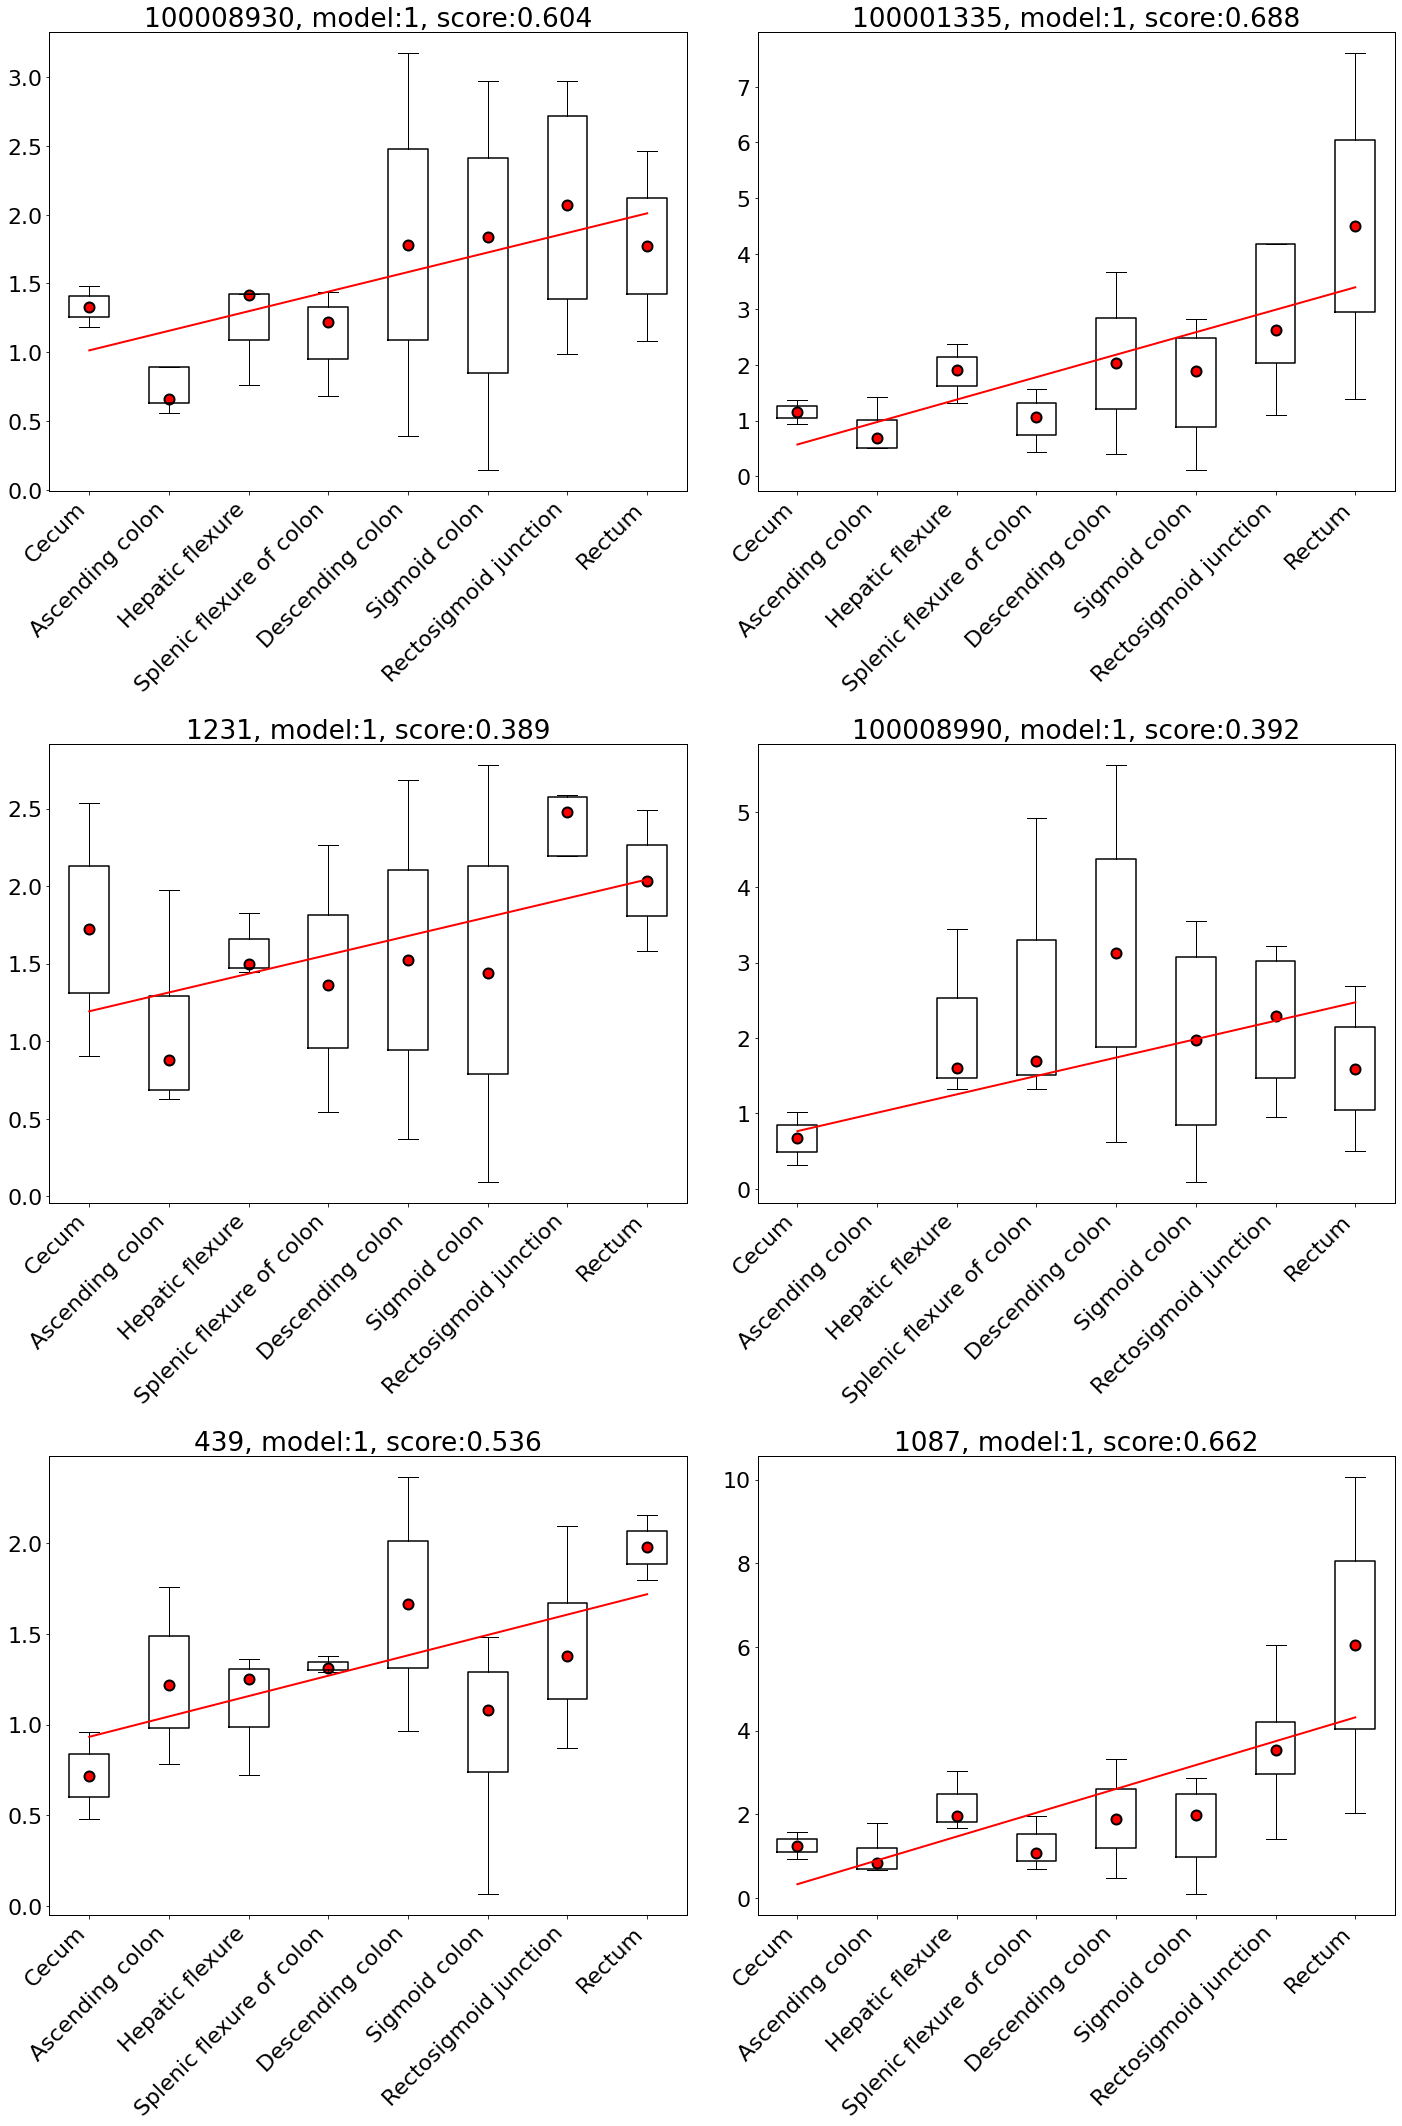

In [217]:
pa_met.plot_fitting(continuum_met, [100008930,100001335,1231,100008990,439,1087], medians_met, poly_models_met, sig_models_met, 'continuum', save_as='all.svg', title='SAH')

In [218]:
left=pa_met.samples2sections['Cecum']+pa_met.samples2sections['Ascending colon']+pa_met.samples2sections['Hepatic flexure of colon']+pa_met.samples2sections['Splenic flexure of colon']
right=pa_met.samples2sections['Descending colon']+pa_met.samples2sections['Sigmoid colon']+pa_met.samples2sections['Rectosigmoid junction']+pa_met.samples2sections['Rectum, NOS']

In [219]:
pa_met.data_table.loc[197,left].median()/pa_met.data_table.loc[197,right].median()

0.5043003502061272

In [220]:
profiling_results = {}
unclassified_tr=len(medians_tr)-len(continuum_tr)-len(sigmoid_tr)
profiling_results['RNA-seq'] = [len(continuum_tr),len(sigmoid_tr),unclassified_tr]

unclassified_meth=len(medians_meth)-len(continuum_meth)-len(sigmoid_meth)
profiling_results['Methylation'] = [len(continuum_meth),len(sigmoid_meth),unclassified_meth]

unclassified_mut=len(medians_mut)-len(continuum_mut)-len(sigmoid_mut)
profiling_results['SNV'] = [len(continuum_mut),len(sigmoid_mut),unclassified_mut]

unclassified_dup=len(medians_dup)-len(continuum_dup)-len(sigmoid_dup)
unclassified_del=len(medians_del)-len(continuum_del)-len(sigmoid_del)
profiling_results['Aneuploidy'] = [len(continuum_dup)+len(continuum_del),
                                   len(sigmoid_dup)+len(sigmoid_del),
                                   unclassified_dup+unclassified_del]

unclassified_cms=len(medians_cms)-len(continuum_cms)-len(sigmoid_cms)
profiling_results['CMS'] = [len(continuum_cms),len(sigmoid_cms),unclassified_cms]

unclassified_sig=len(medians_sig)-len(continuum_sig)-len(sigmoid_sig)
profiling_results['Signatures'] = [len(continuum_sig),len(sigmoid_sig),unclassified_sig]

unclassified_mf=len(medians_mf)-len(continuum_mf)-len(sigmoid_mf)
profiling_results['Molecular Subtypes'] = [len(continuum_mf),len(sigmoid_mf),unclassified_mf]

unclassified_imm=len(medians_imm)-len(continuum_imm)-len(sigmoid_imm)
profiling_results['Immune cells'] = [len(continuum_imm),len(sigmoid_imm),unclassified_imm]

unclassified_mic=len(medians_mic)-len(continuum_mic)-len(sigmoid_mic)
profiling_results['Microbiome'] = [len(continuum_mic),len(sigmoid_mic),unclassified_mic]

unclassified_met=len(medians_met)-len(continuum_met)-len(sigmoid_met)
profiling_results['Metabolites'] = [len(continuum_met),len(sigmoid_met),unclassified_met]

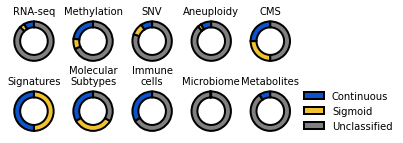

In [221]:
from textwrap import wrap

cm = 1/2.54  # centimeters in inches
l=0
h=0
wedgeprops = {'width':0.3, 'edgecolor':'black', 'linewidth':2}
colors = ['#0b55cc', '#f1c232','#808080']
fig = plt.figure(figsize=(13*cm, 6*cm))
names = ['Continuous', 'Sigmoid', 'Unclassified']

for key in profiling_results:
    ax = plt.subplot2grid((2,5), (h,l))
    cont = profiling_results[key][0]
    sig = profiling_results[key][1]
    unc = profiling_results[key][2]
    wedges, texts= ax.pie([cont, sig, unc], wedgeprops=wedgeprops, colors=colors,
                                  textprops=dict(color="k"),startangle=90)

    ax.set_title('\n'.join(wrap(key,11)), fontsize=10, loc='center', pad=1)
    l = l+1
    if l == 5:
        h = h+1
        l = 0
ax.legend(wedges, names,
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1), prop={'size': 10}, framealpha=0)
plt.savefig('/'.join([pa_met.figures, 'Feature_Summary.svg']), format='svg')